In [108]:
import pandas as pd
import numpy as np

files = ['matt1-17r.log','matt1-21l.log','benn1-23r.log', 'benn1-19l.log', 'abby1-15r.log', 'abby1-18l.log', 'matt1-standr.log', 'matt1-standl.log' ]
files = [
    'matt2-2r.log','matt2-21l.log','nick2-25r.log', 'nick2-25l.log', 'abby2-2r.log', 'abby2-22l.log', 
    'matt2-standr.log', 'matt2-sitr.log', 'matt2-sitl.log','abby1-stair-48r.log', 'abby1-stair-72l.log',
    'matt1-stair-60r.log', 'matt1-stair-66l.log'
    ]

master = {}
phrase = "Acc X"
phrase2 = "Time taken by the task: 25 milliseconds"
phrase3 = "Time taken by the task: 24 milliseconds"
cols = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']

sample_rate = 1/0.025 # Hz
num_channels = 9
ten_minutes =round(10*60*num_channels*sample_rate) #mins*seconds/min*num_channels*samples/second+ 1(python index start 0)
i = 0
for file in files:
    start = False
    print(file)
    data = []
    with open(file) as f:
        f = f.readlines()

    for line in f[1:]:
        # Want to start beginning with x-acceleration measurements so data is alligned properly
        if line[:-1] == phrase:
            start = True
        if phrase not in line and phrase2 not in line and phrase3 not in line and start:
            data.append(float(line[:-1]))
    
    data = data[:ten_minutes]
    data = np.array(data)
    data = data.reshape((-1,9))
    df = pd.DataFrame(data, columns=cols)
    if i <= 5:
        df['label'] = 2*np.ones((data.shape[0]))
    elif i == 6:
        df['label'] = np.ones((data.shape[0]))
    elif 6 < i and i < 9:
        df['label'] = np.zeros((data.shape[0]))
    elif i >= 9:
        df['label'] = 3*np.ones((data.shape[0]))
    master[file] = df
    i+=1

matt2-2r.log
matt2-21l.log
nick2-25r.log
nick2-25l.log
abby2-2r.log
abby2-22l.log
matt2-standr.log
matt2-sitr.log
matt2-sitl.log
abby1-stair-48r.log
abby1-stair-72l.log
matt1-stair-60r.log
matt1-stair-66l.log


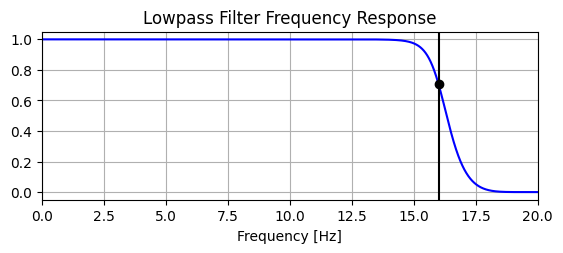

In [109]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

order = 6
fs = 40       # sample rate, Hz
cutoff = 16  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

matt2-2r.log


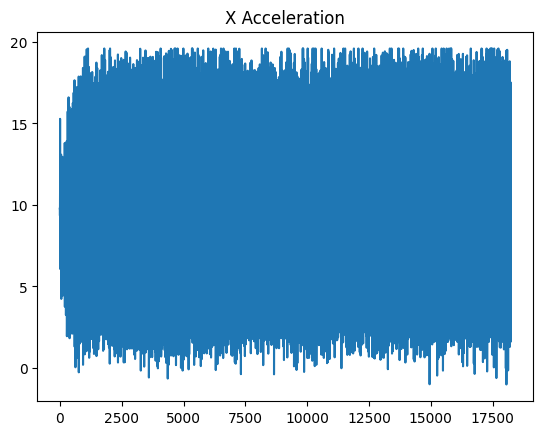

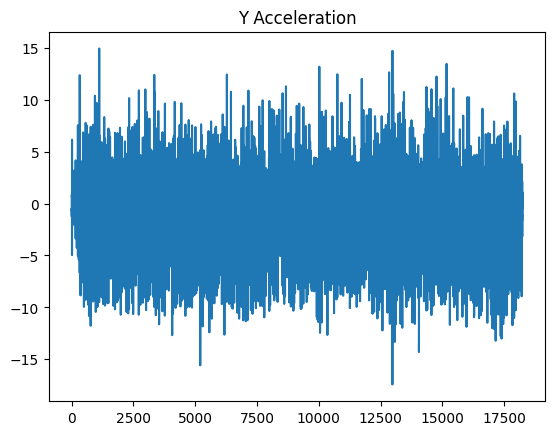

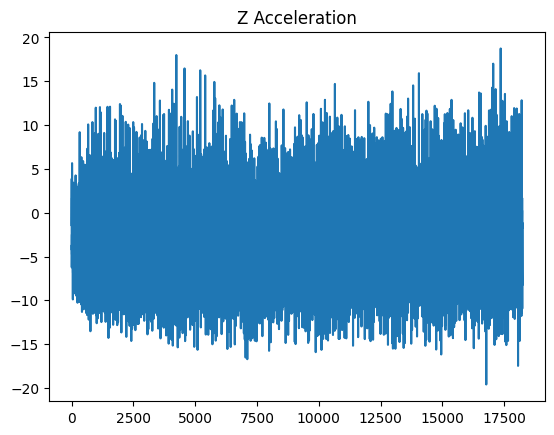

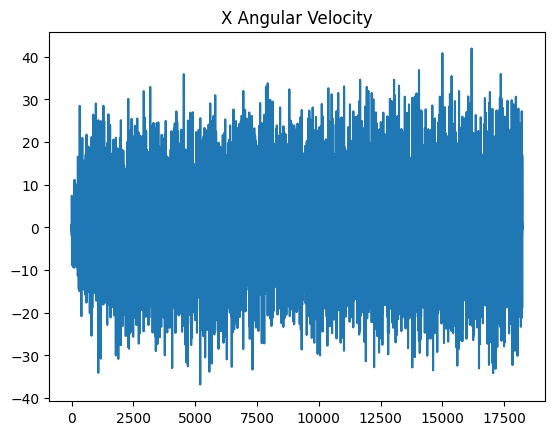

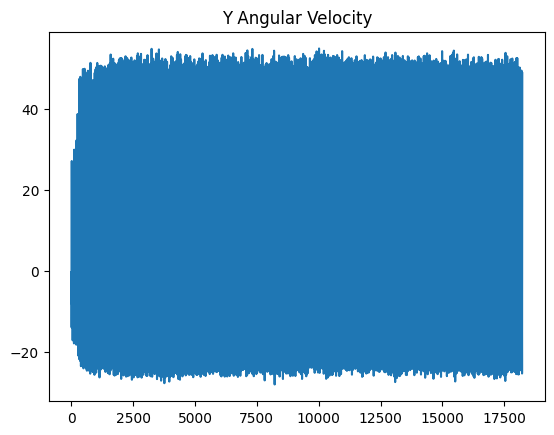

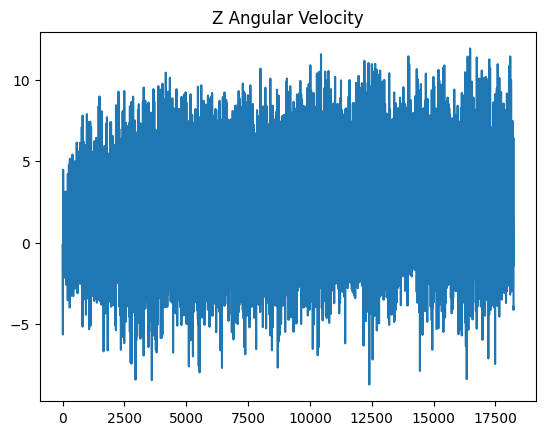

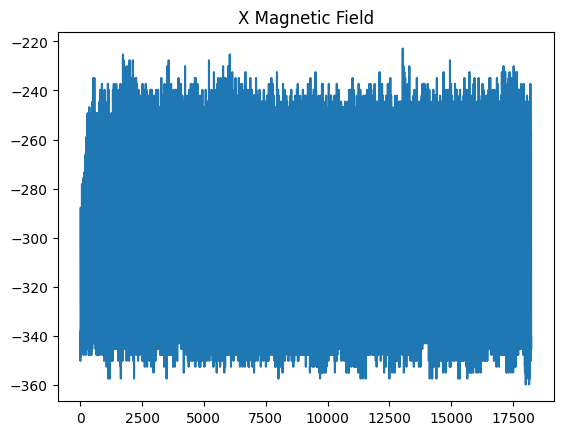

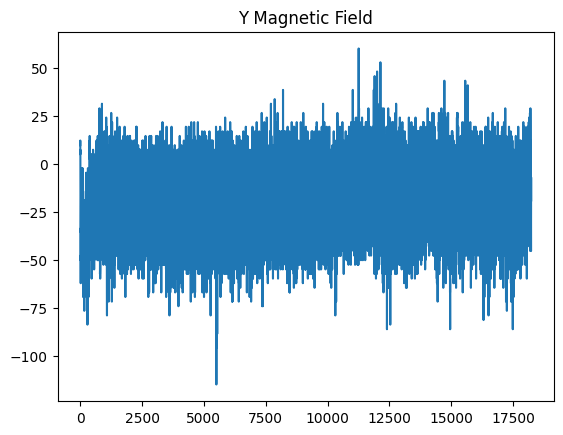

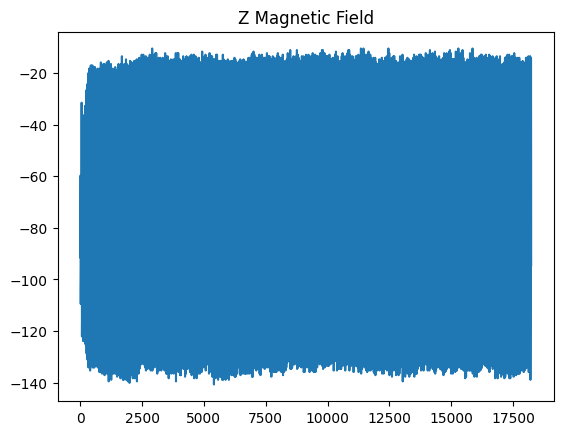

matt2-21l.log


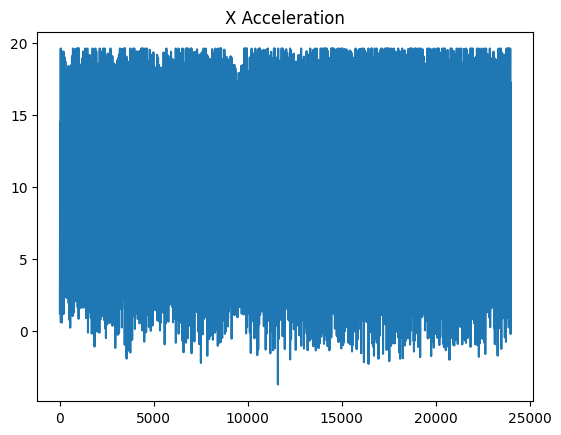

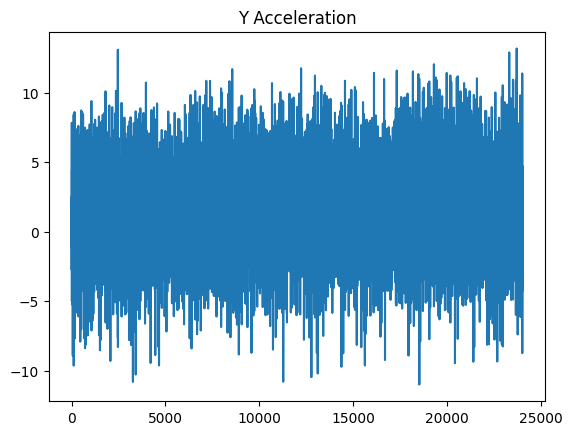

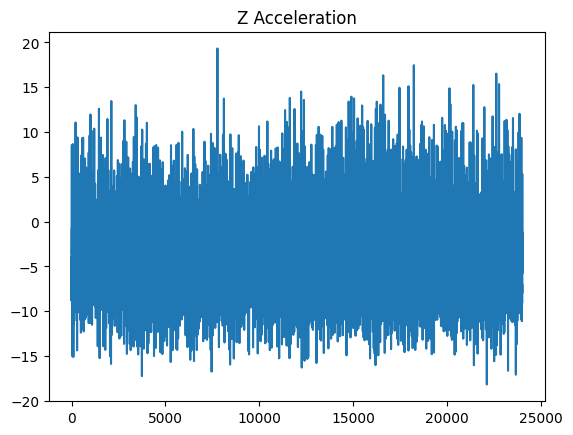

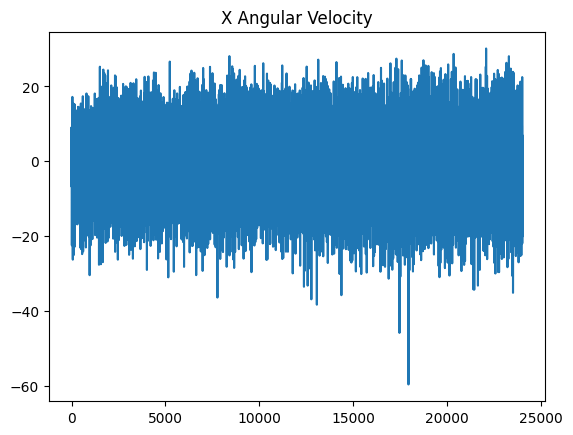

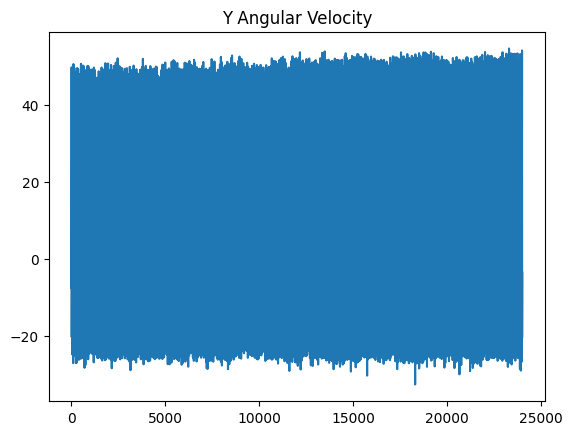

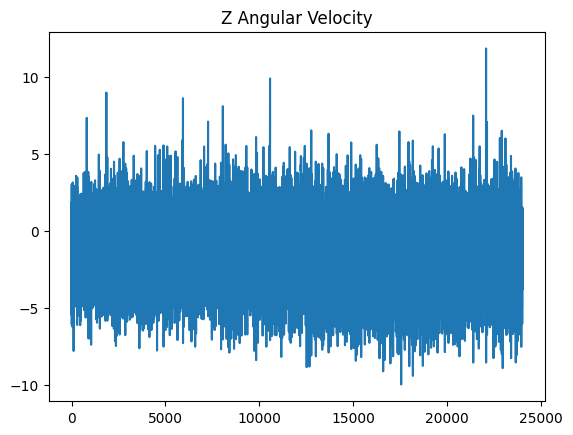

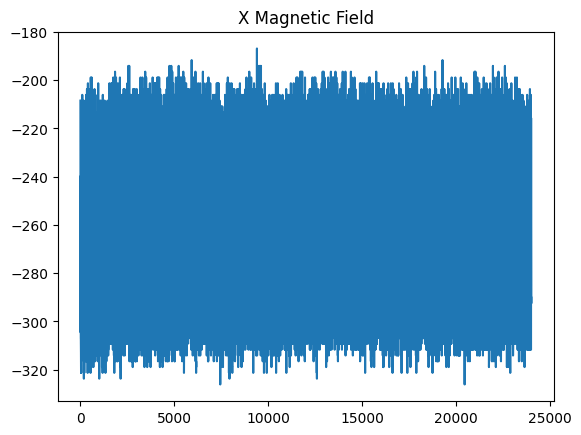

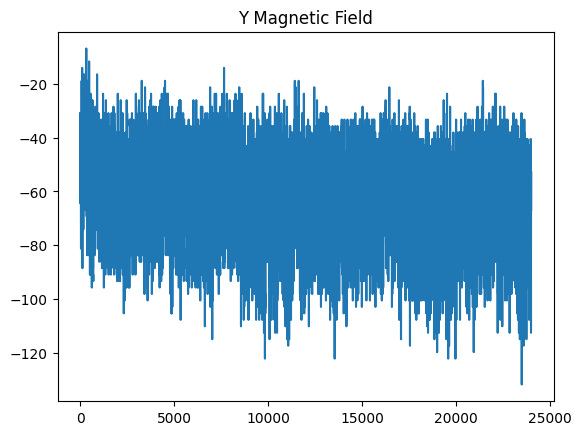

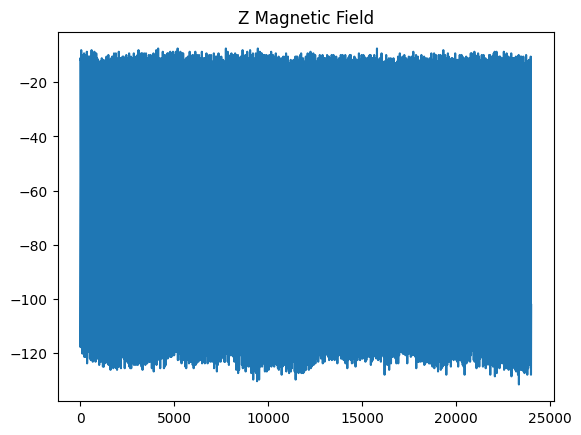

nick2-25r.log


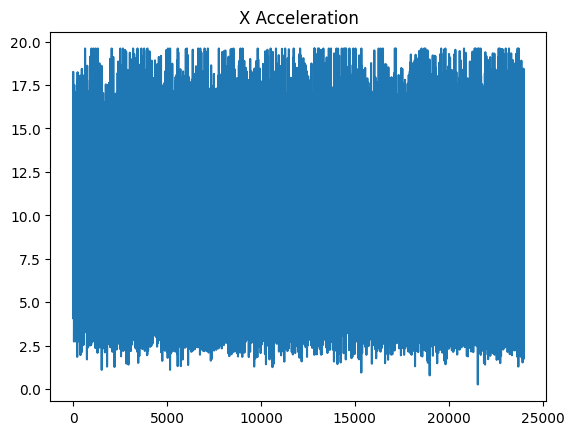

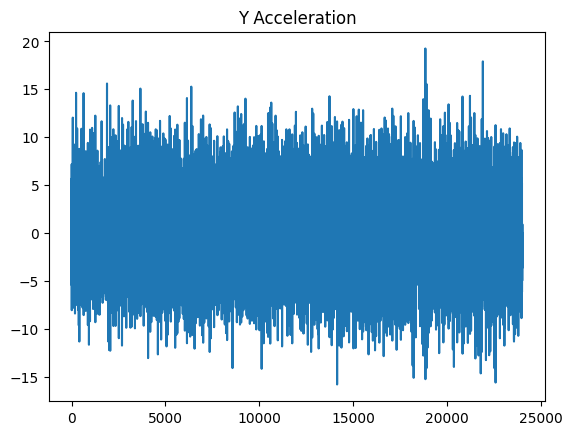

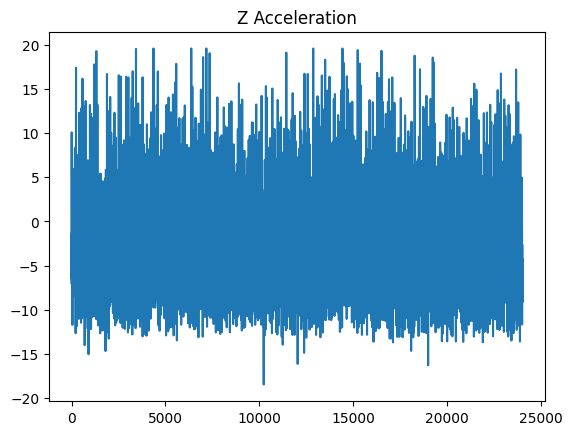

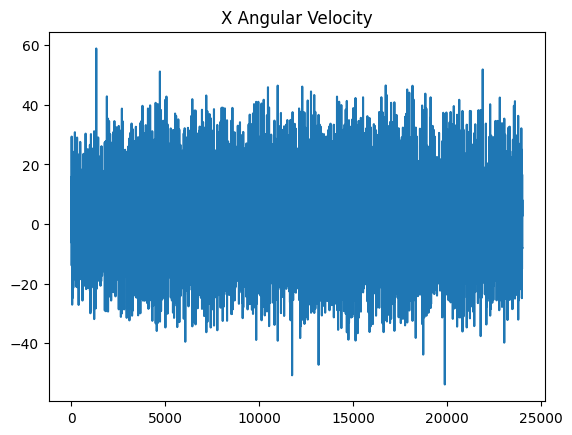

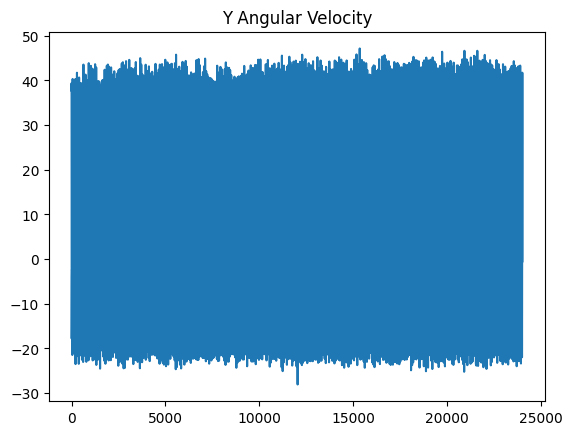

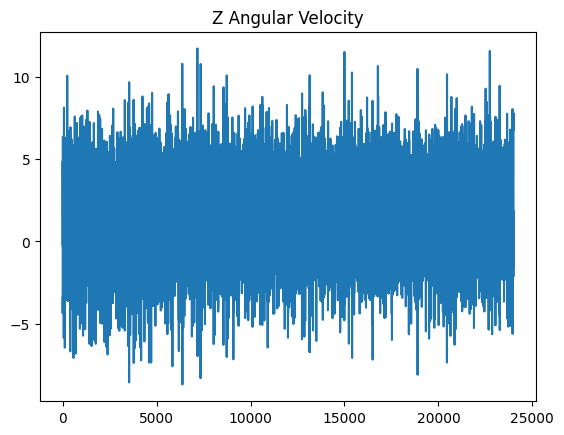

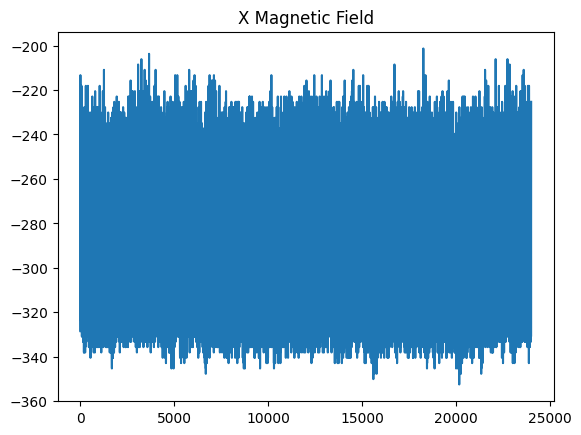

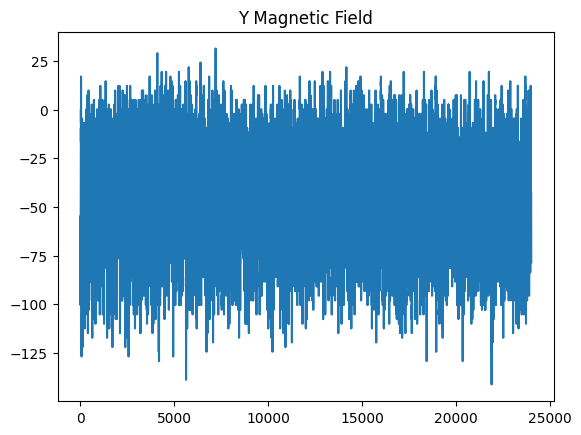

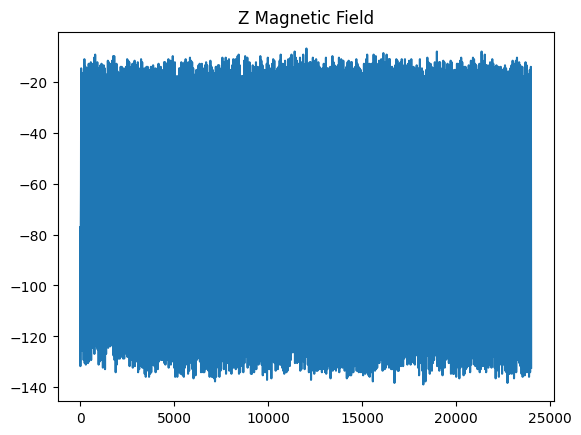

nick2-25l.log


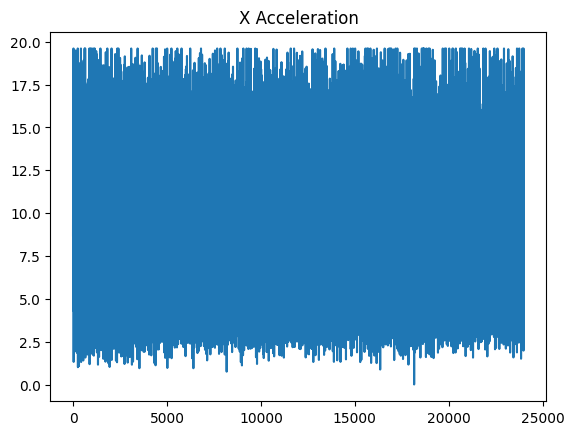

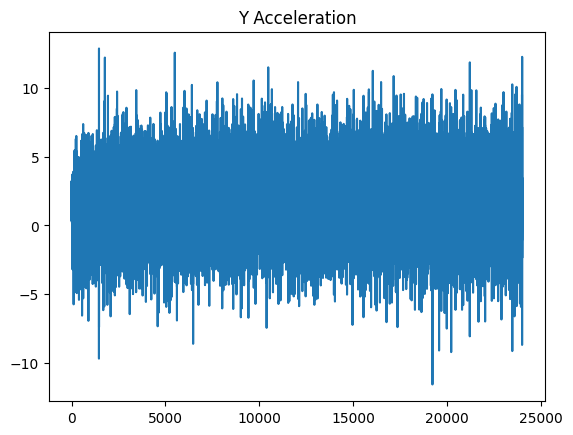

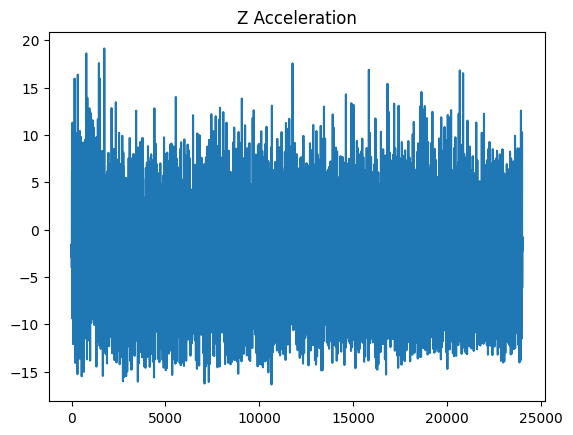

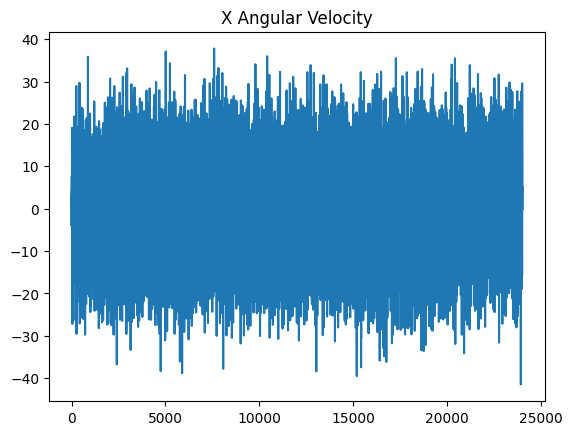

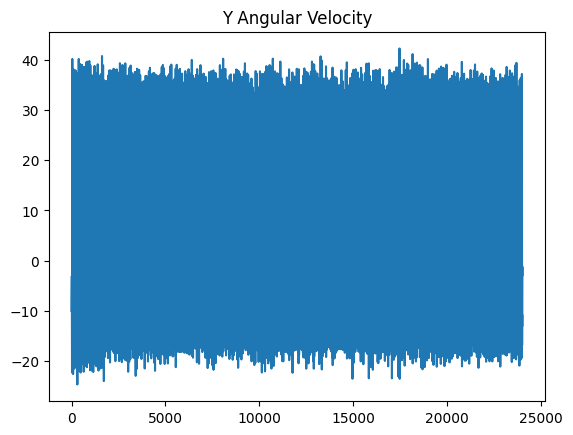

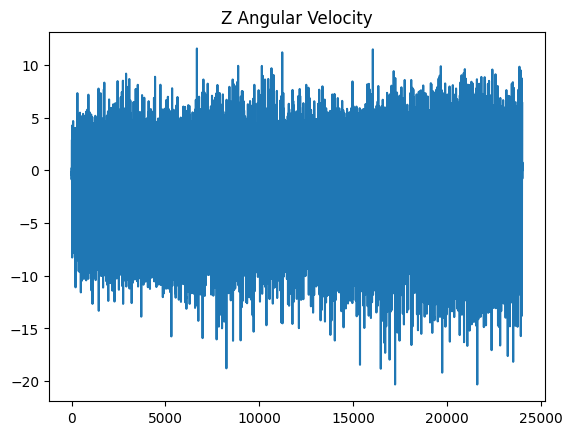

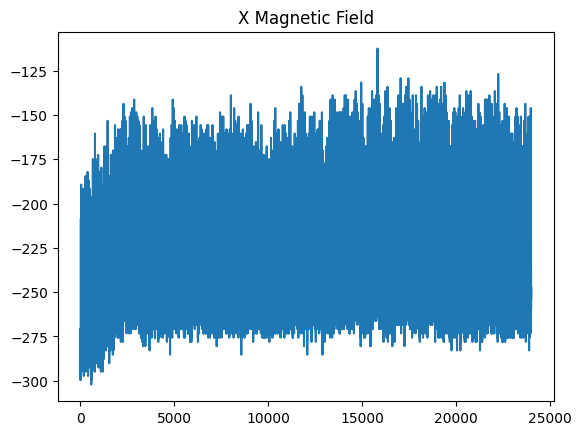

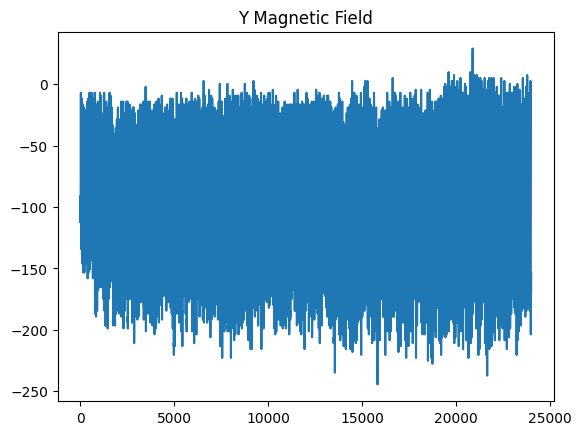

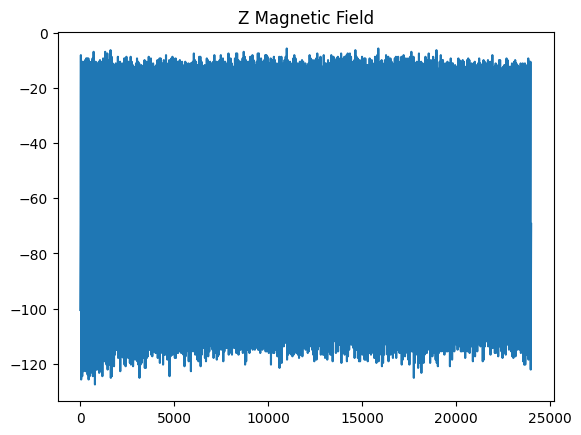

abby2-2r.log


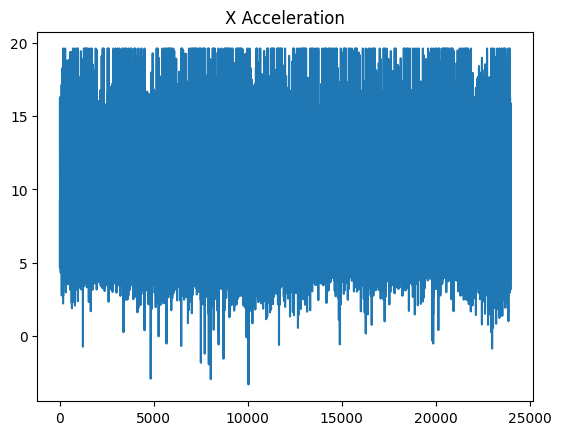

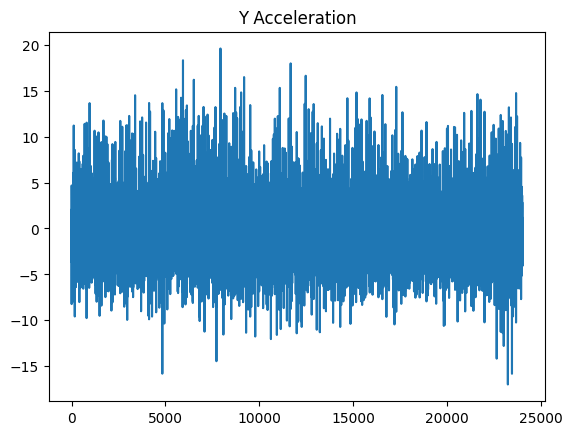

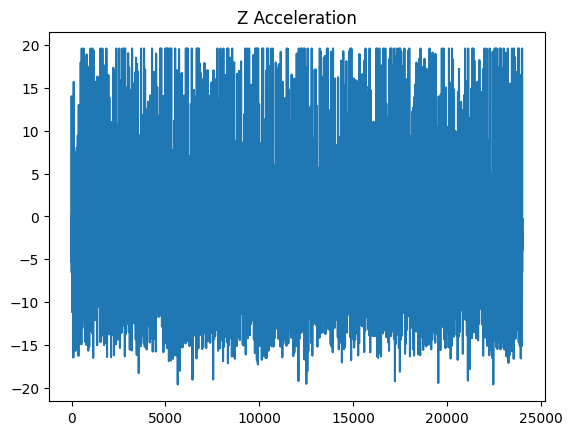

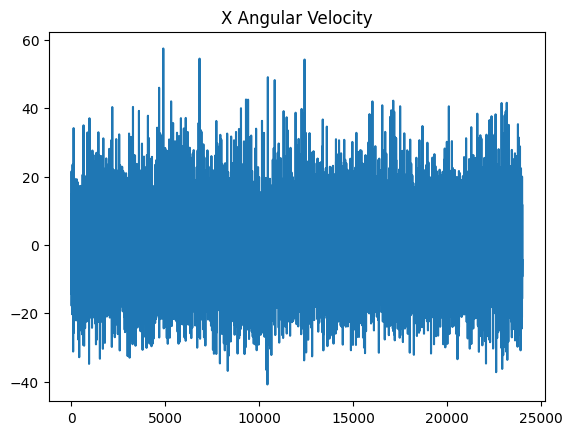

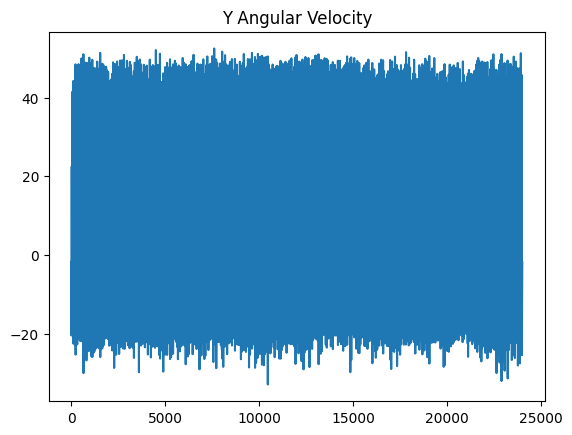

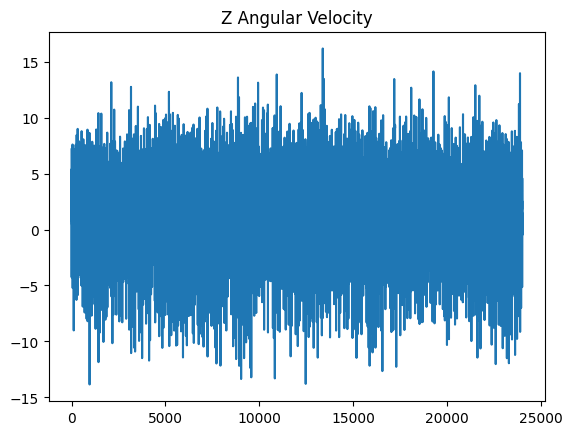

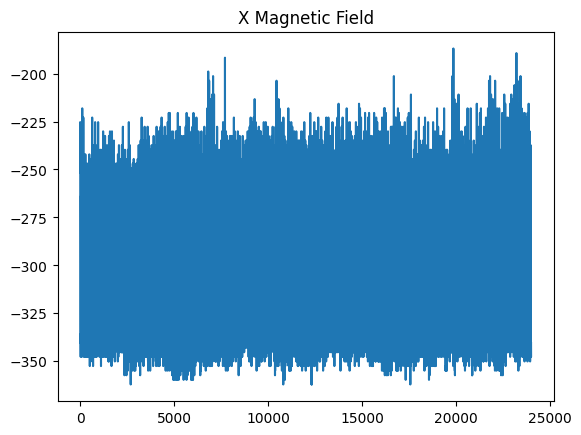

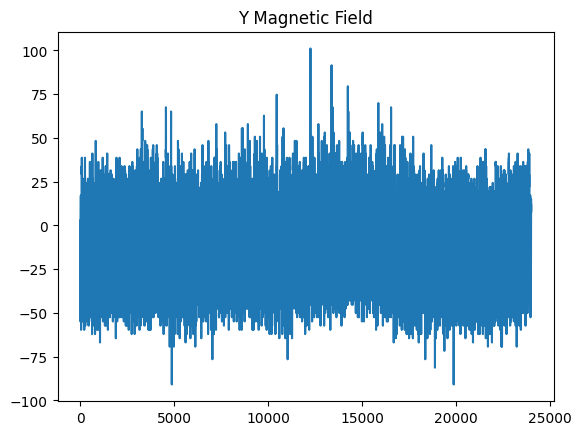

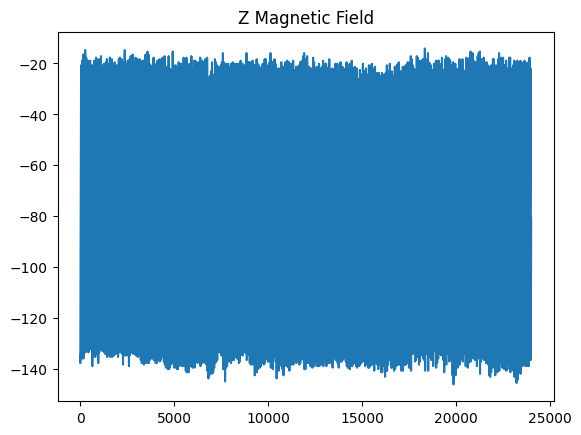

abby2-22l.log


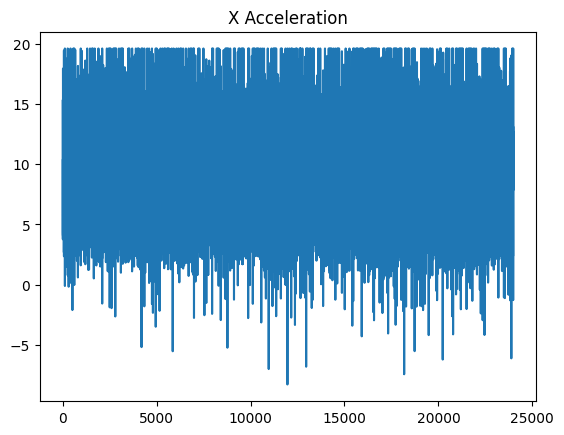

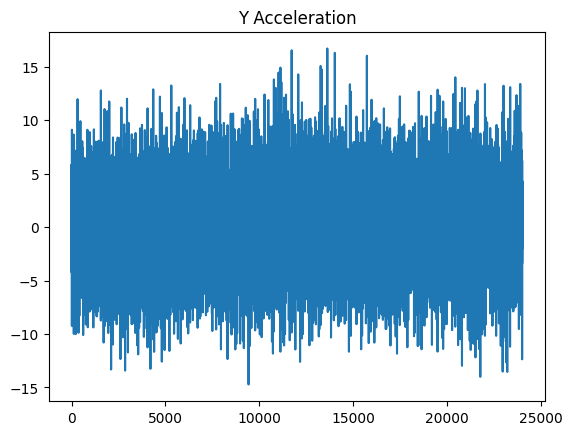

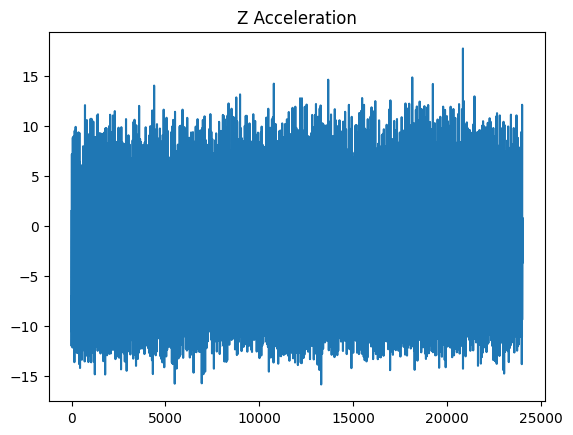

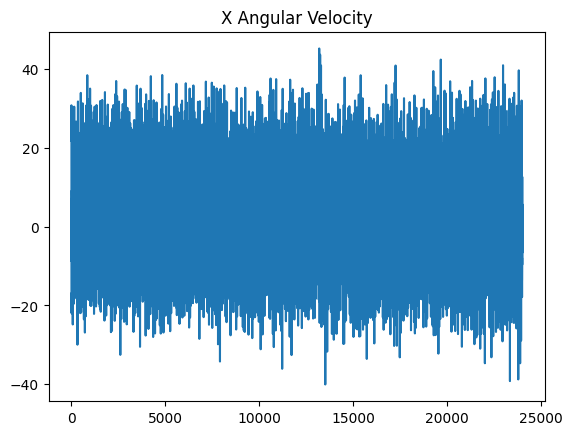

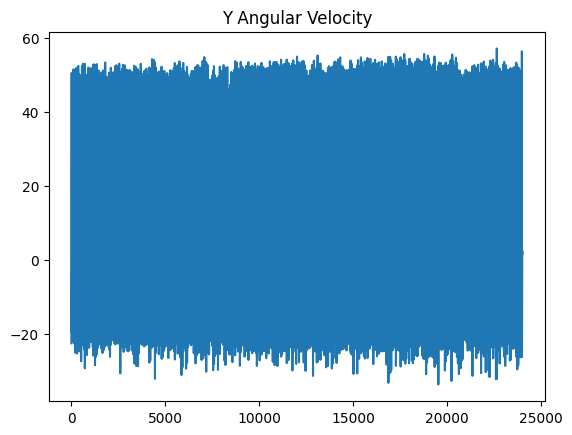

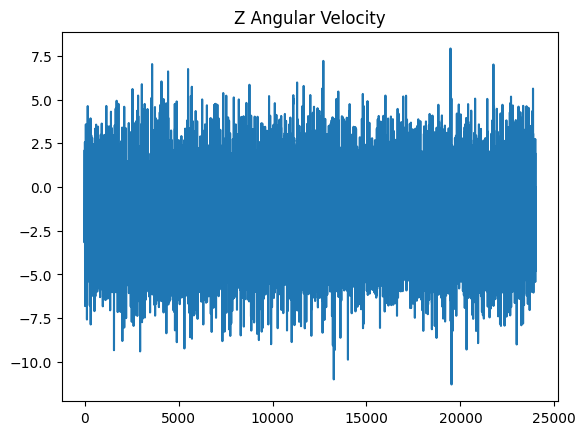

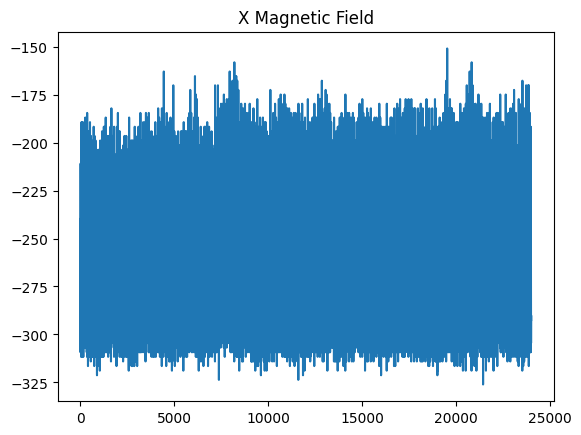

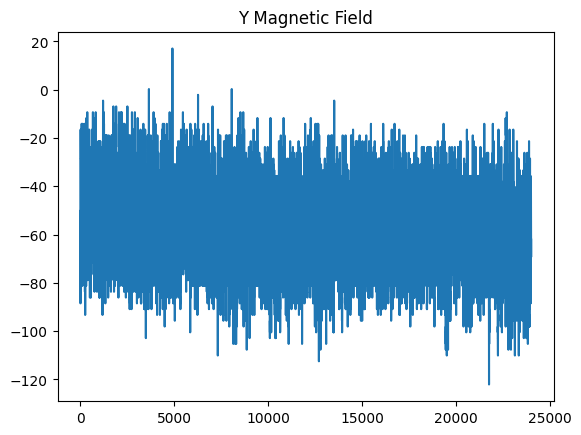

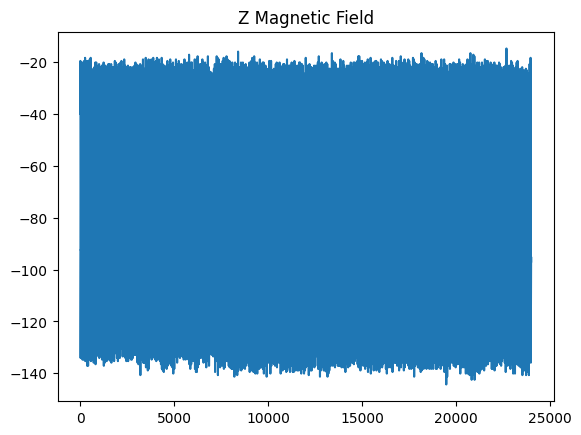

matt2-standr.log


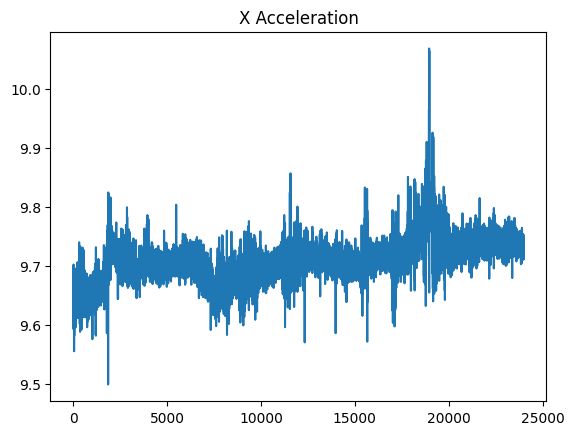

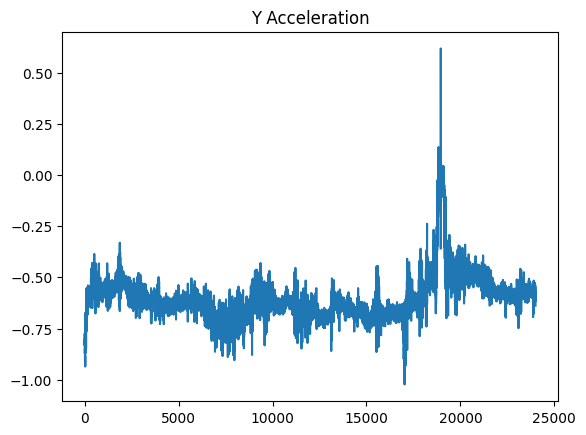

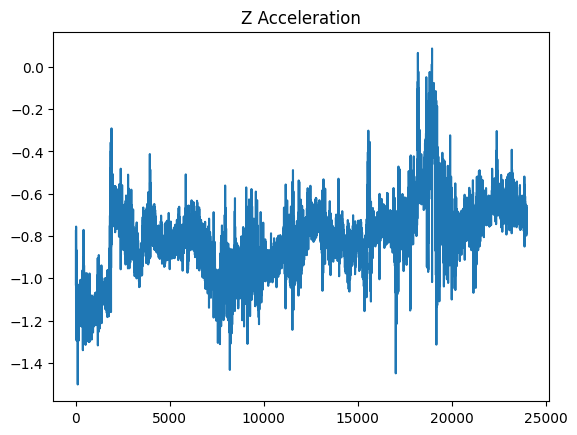

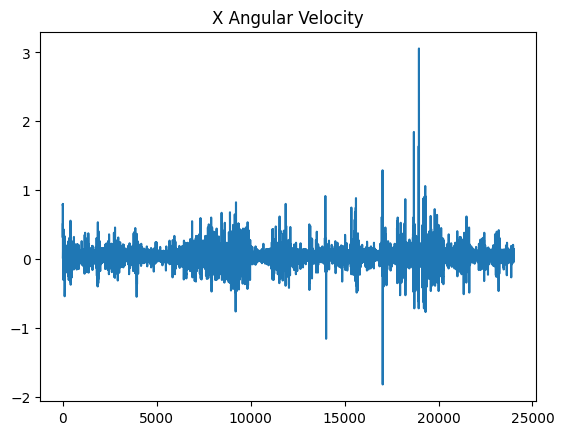

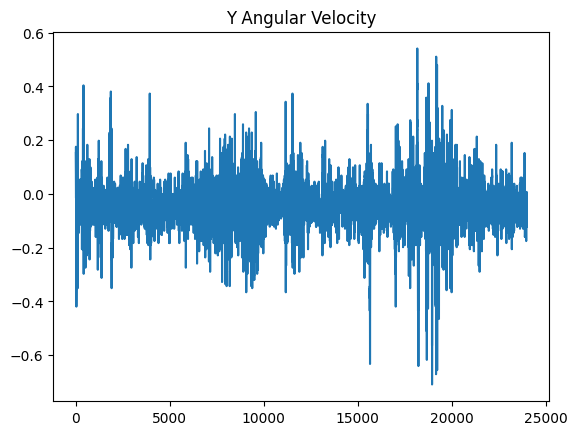

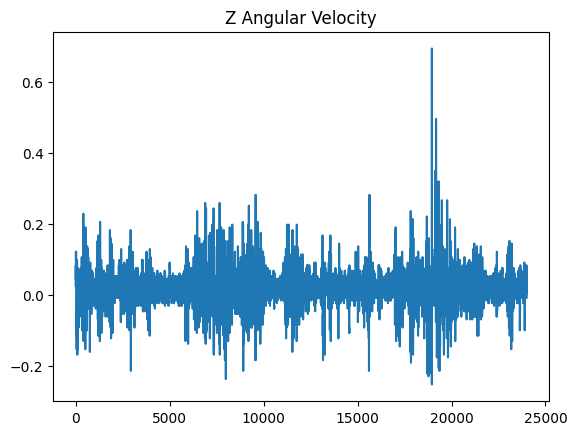

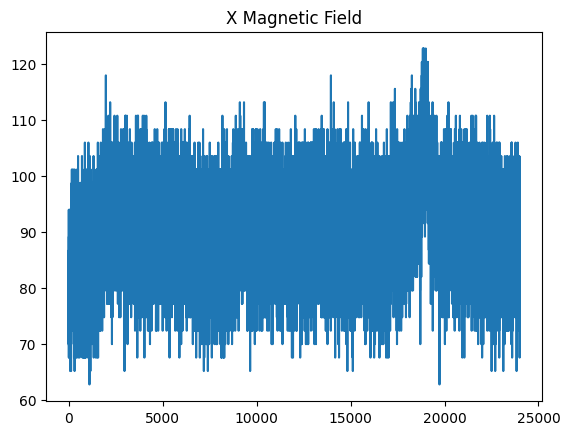

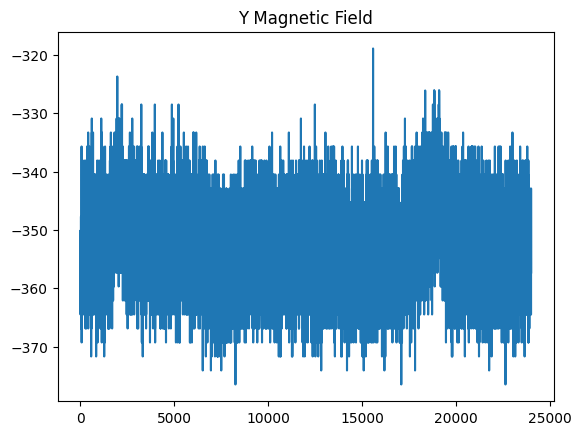

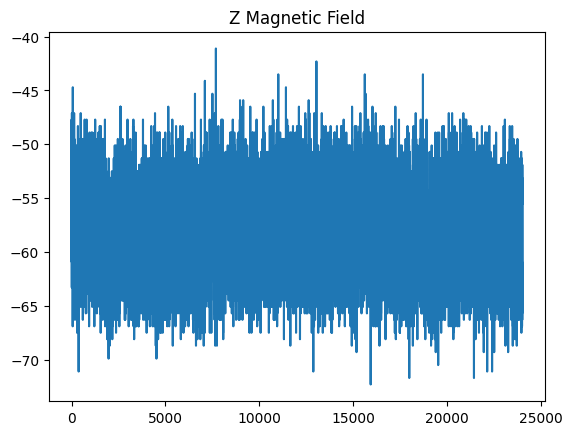

matt2-sitr.log


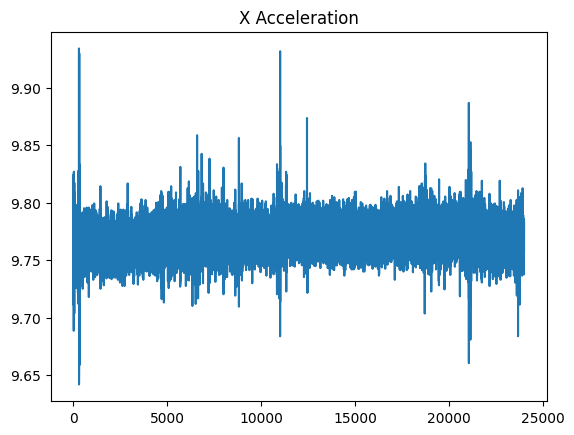

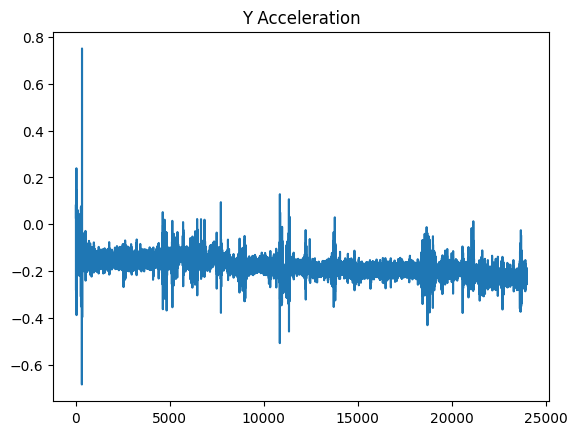

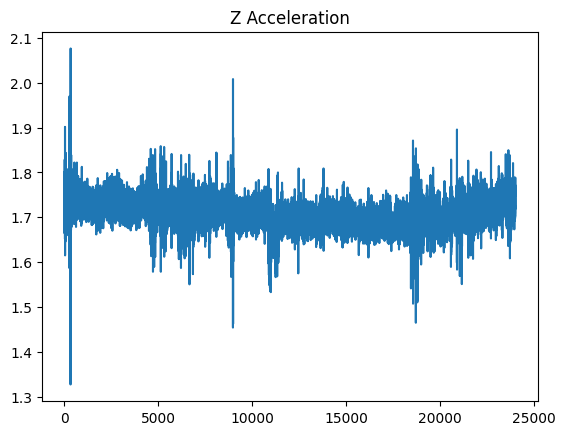

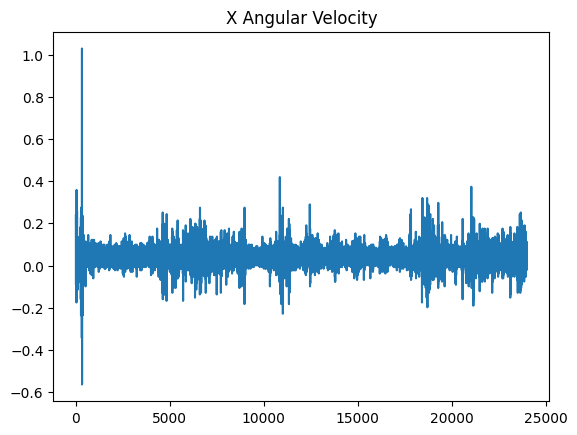

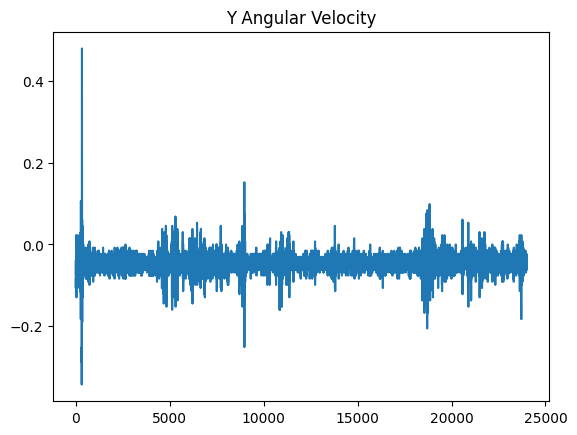

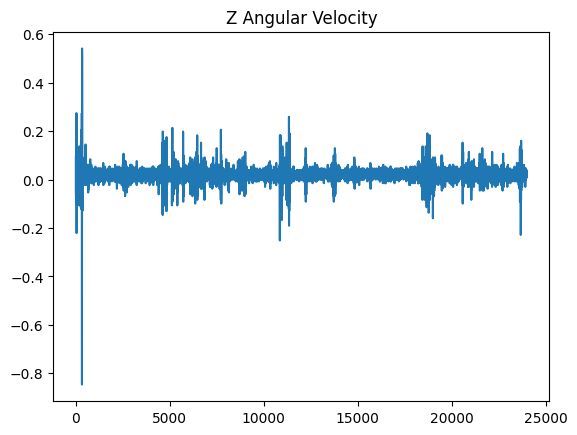

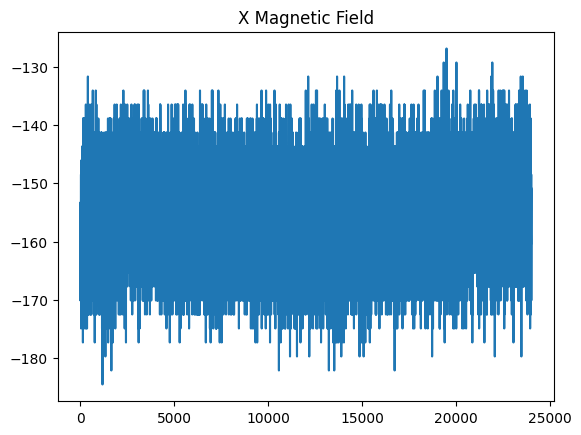

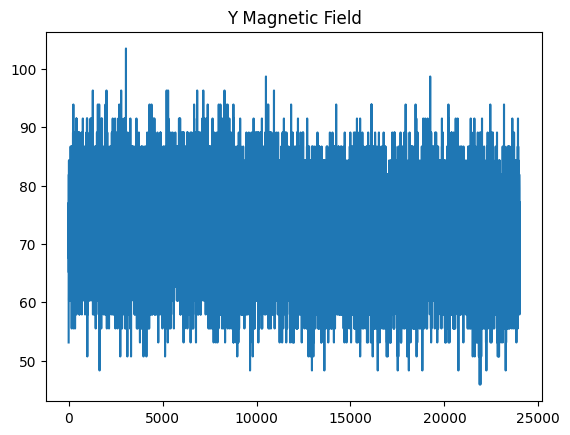

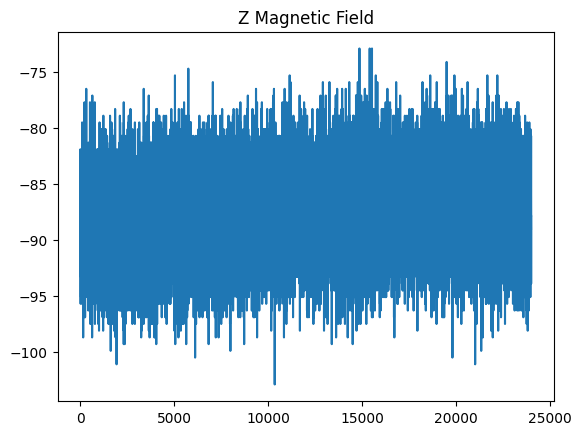

matt2-sitl.log


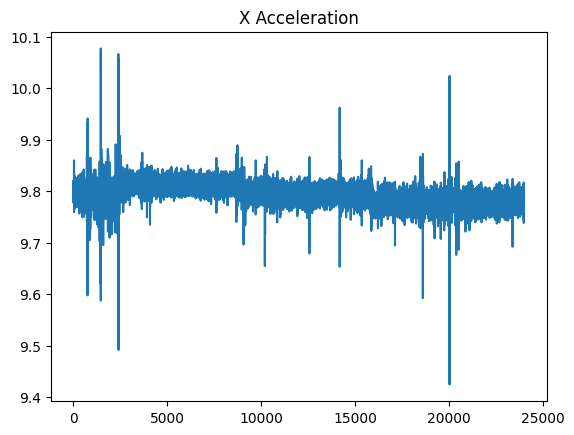

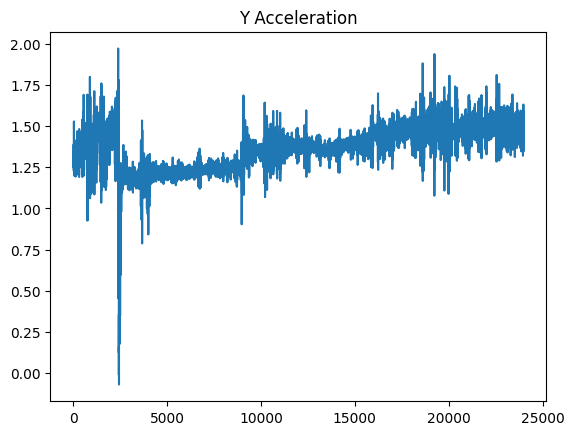

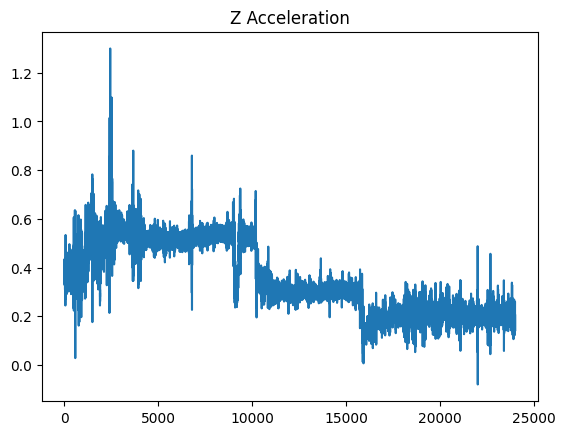

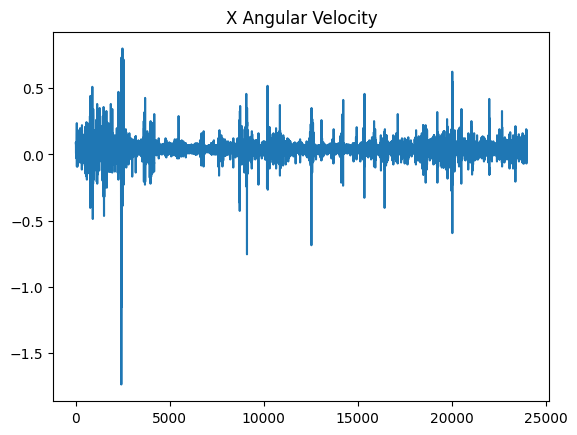

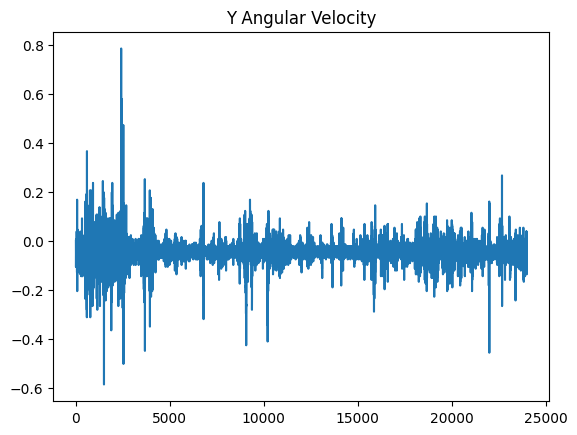

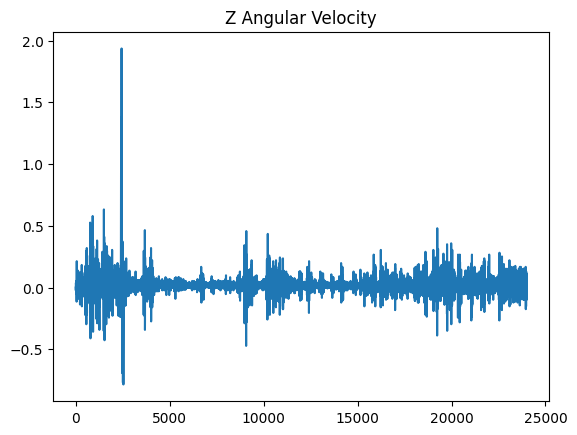

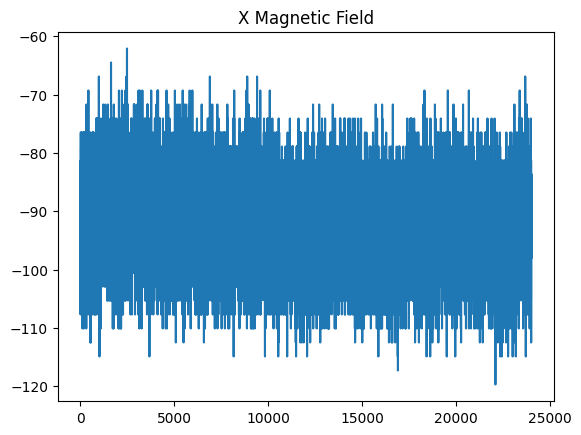

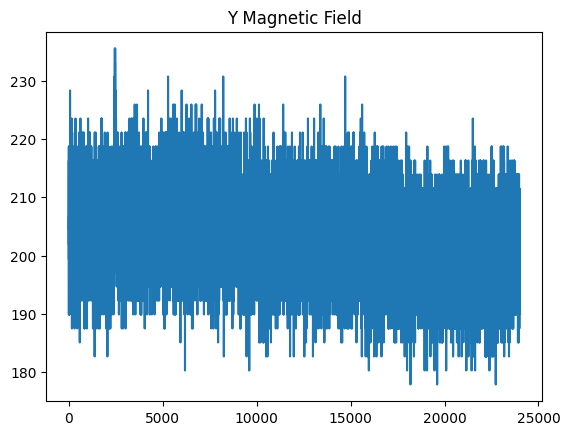

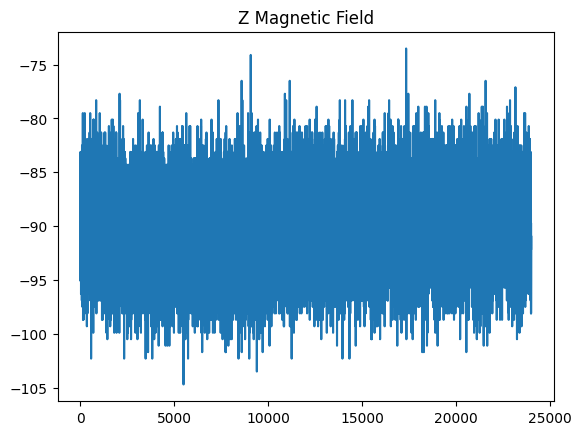

abby1-stair-48r.log


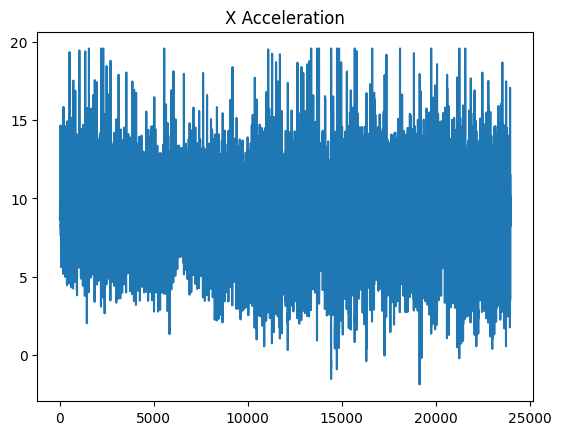

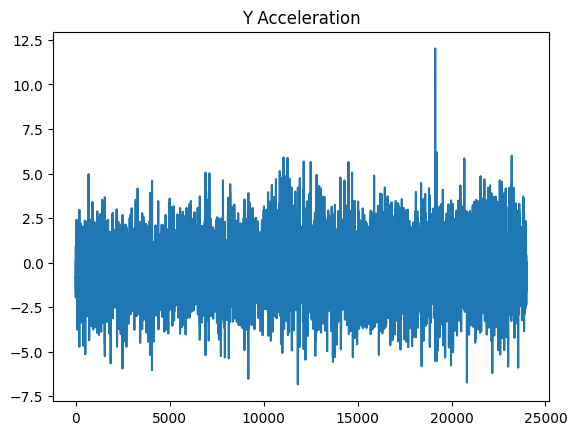

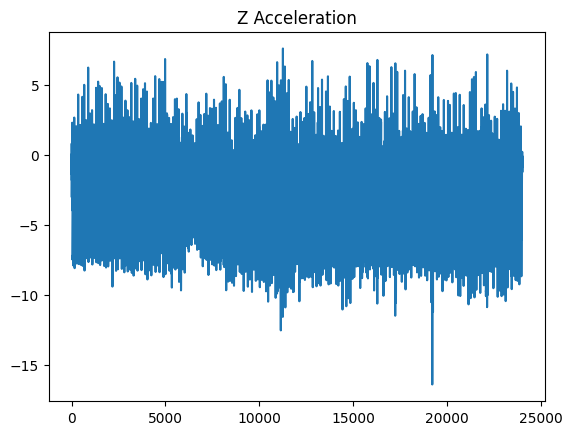

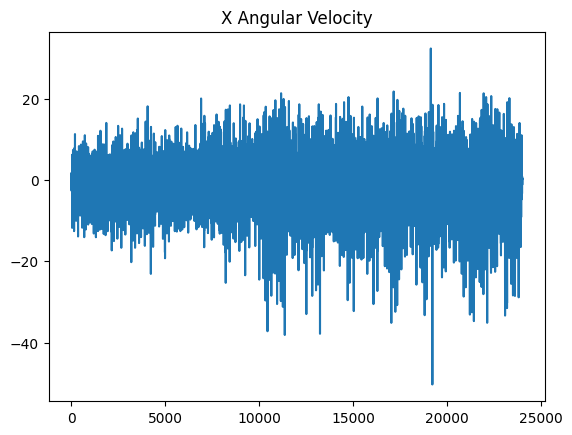

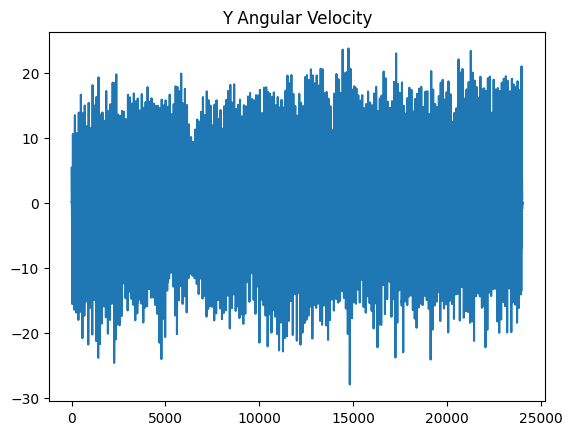

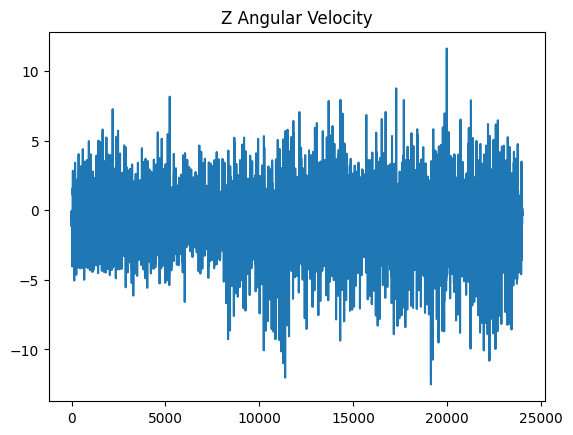

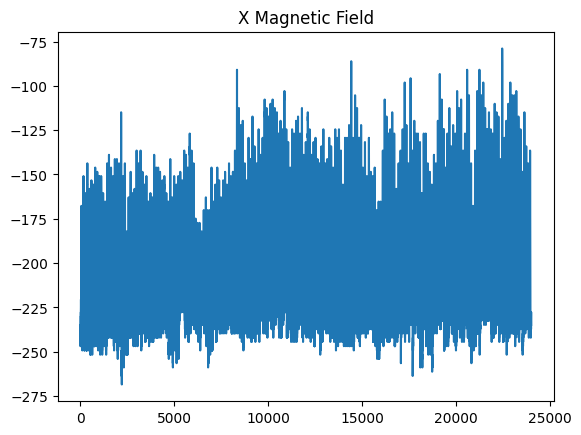

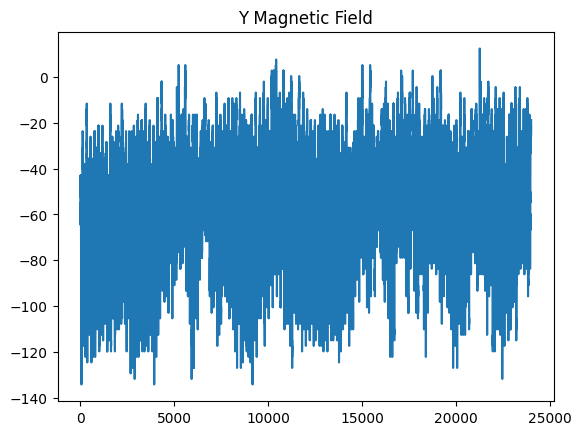

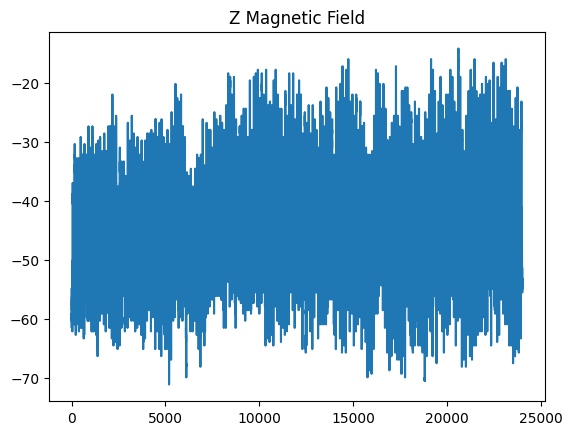

abby1-stair-72l.log


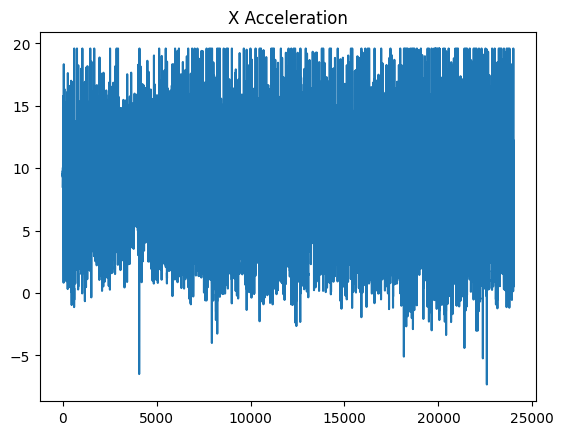

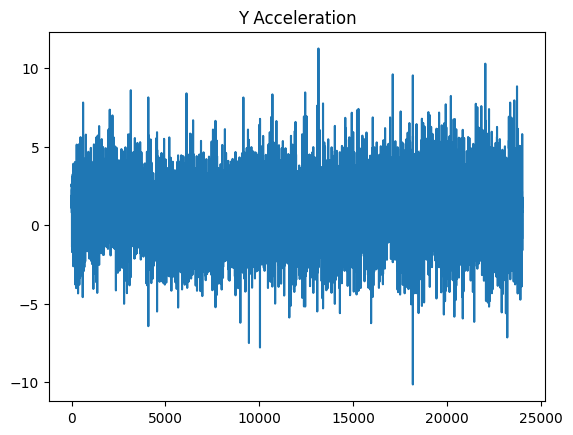

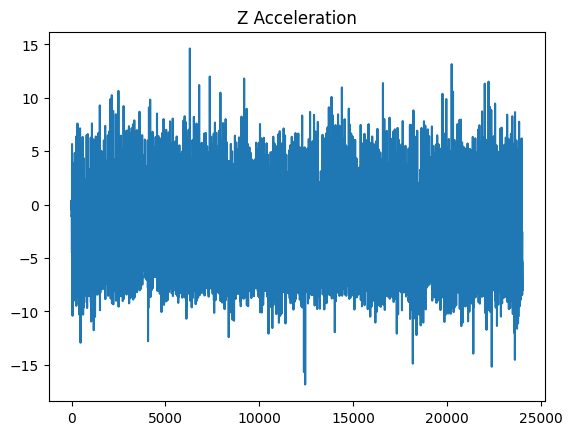

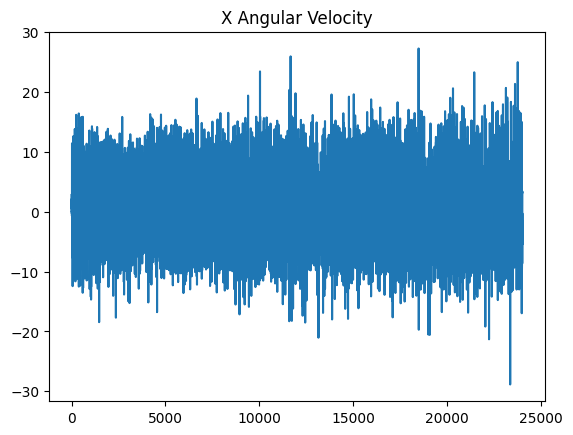

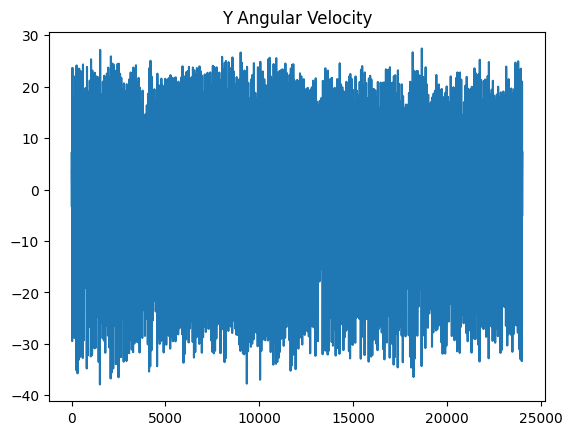

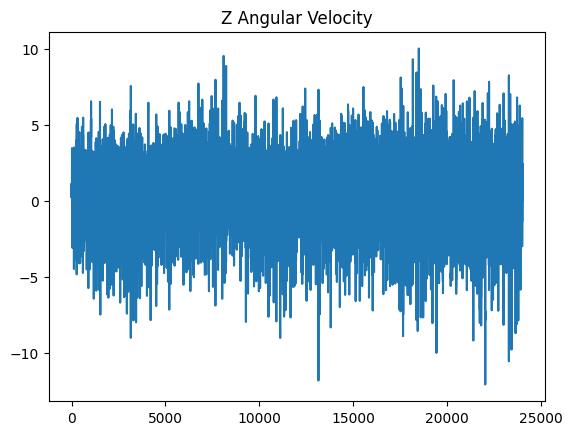

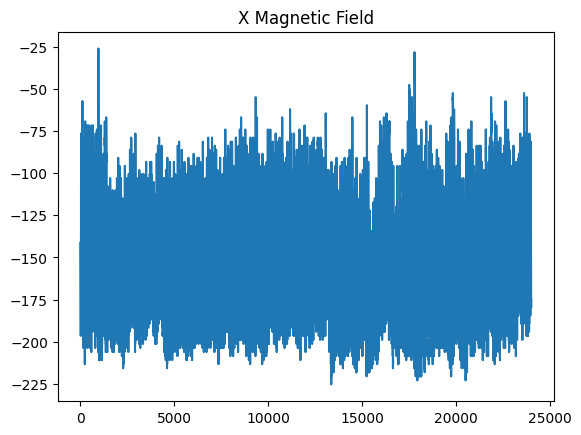

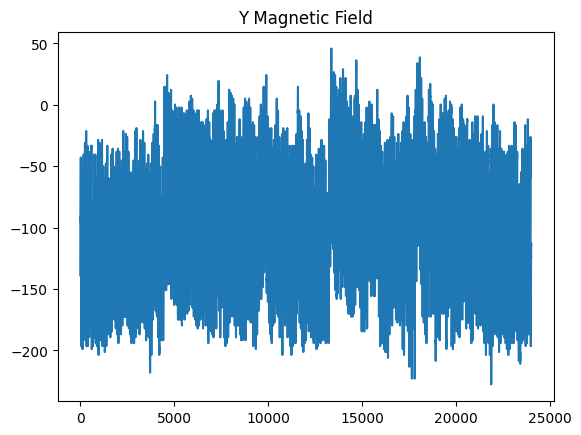

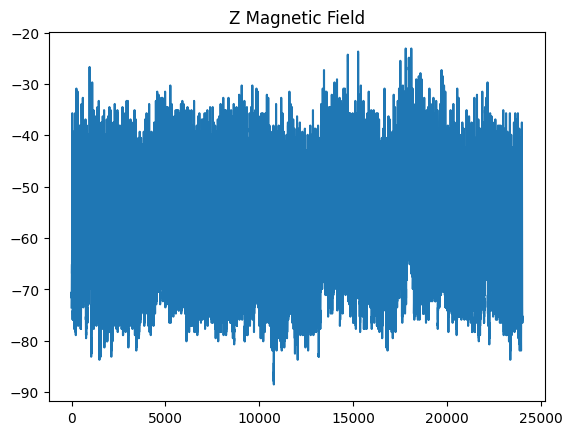

matt1-stair-60r.log


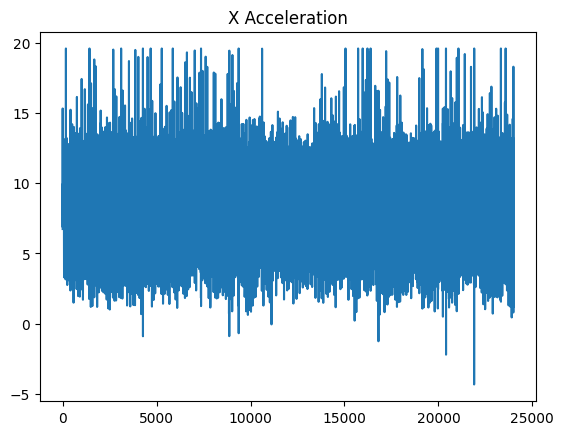

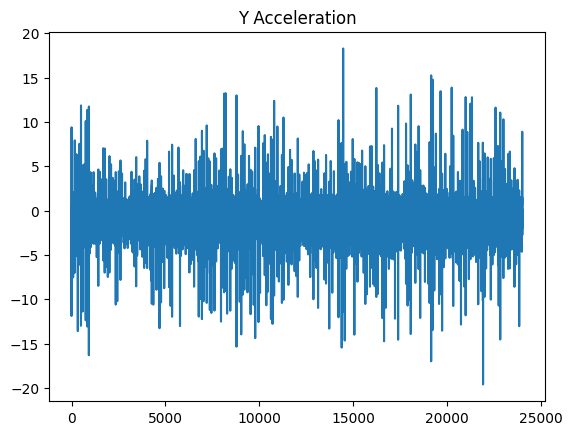

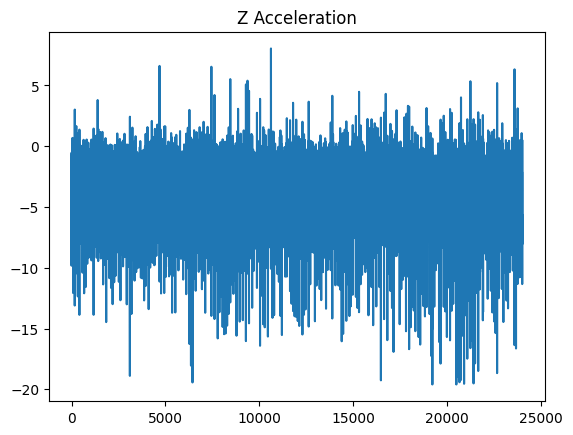

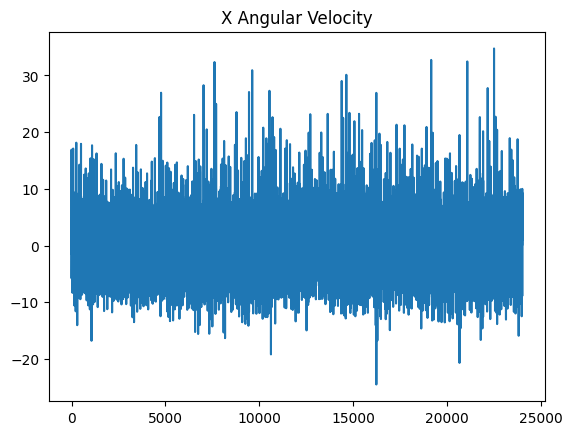

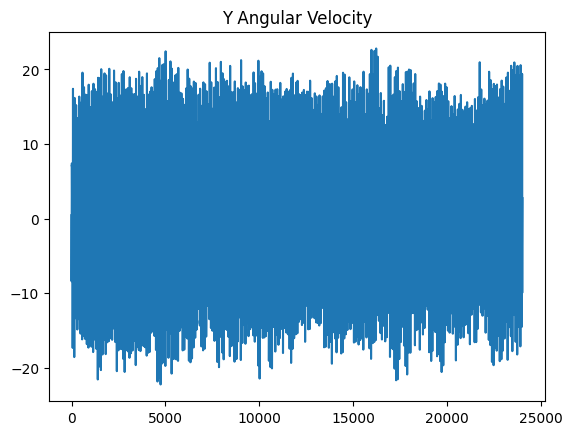

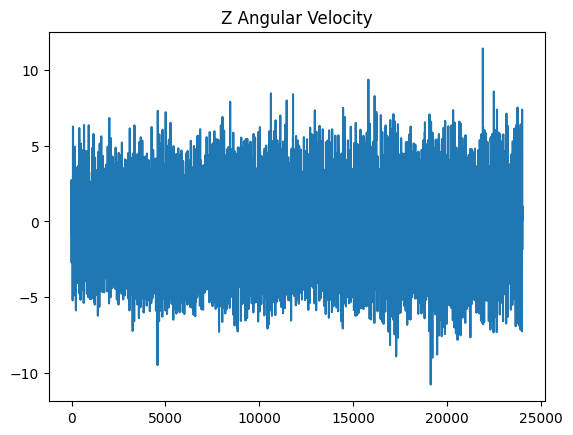

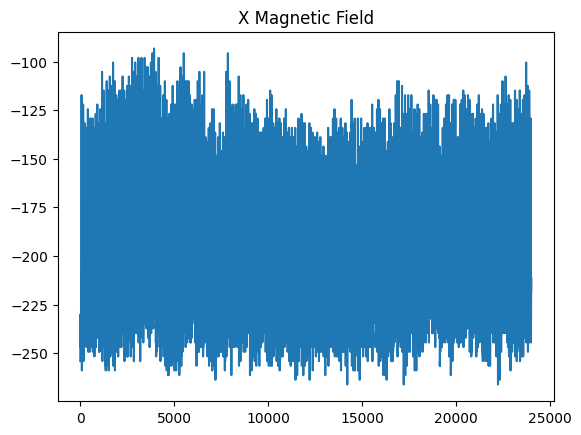

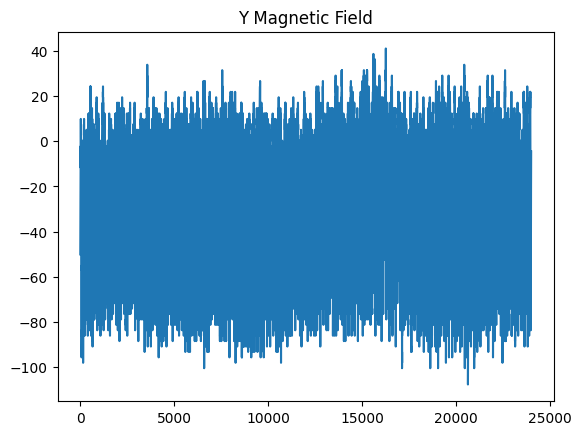

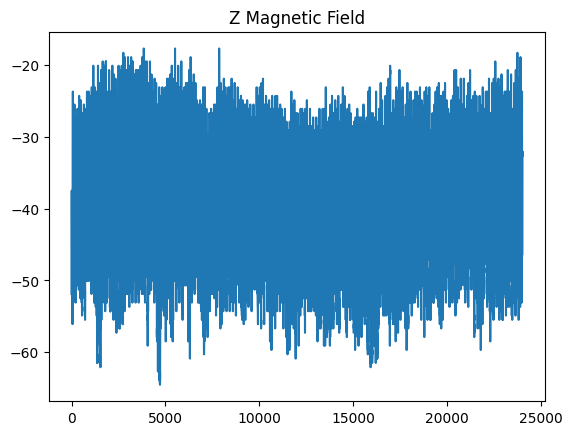

matt1-stair-66l.log


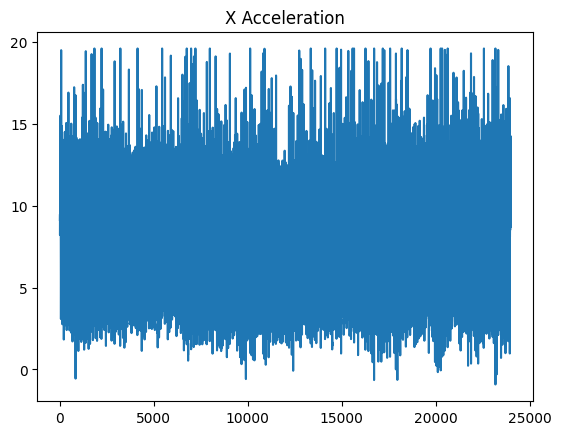

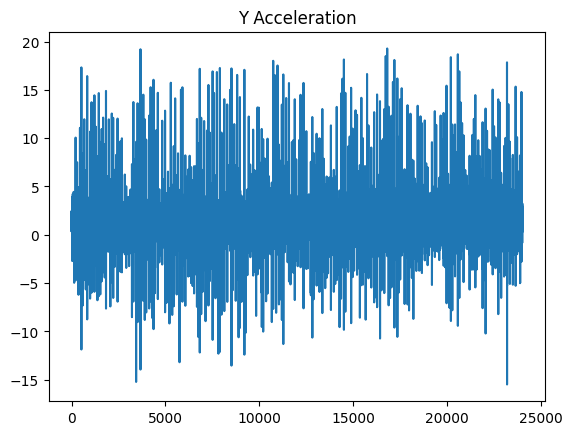

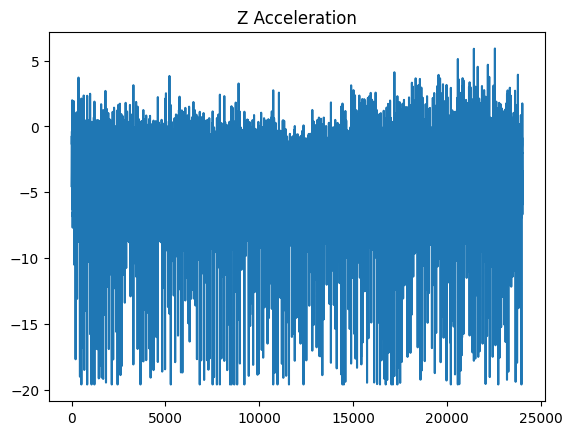

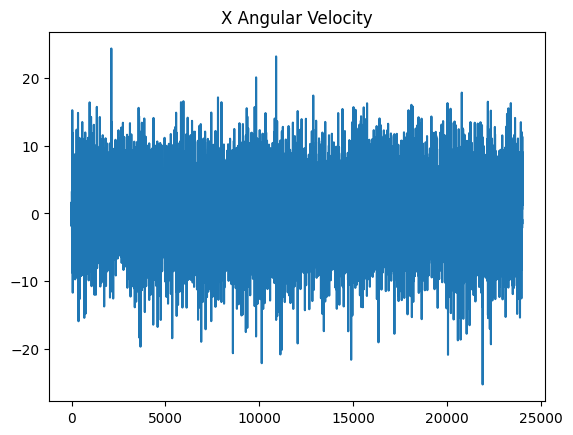

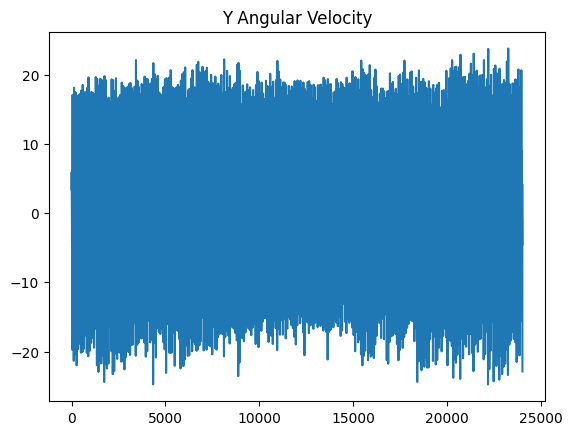

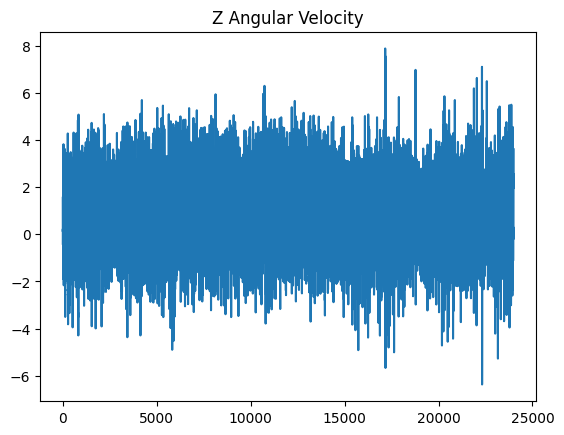

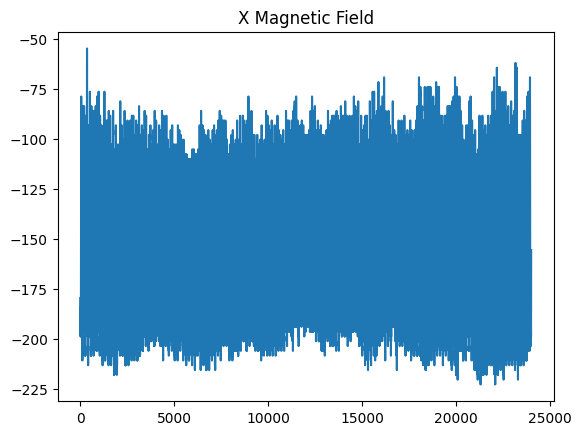

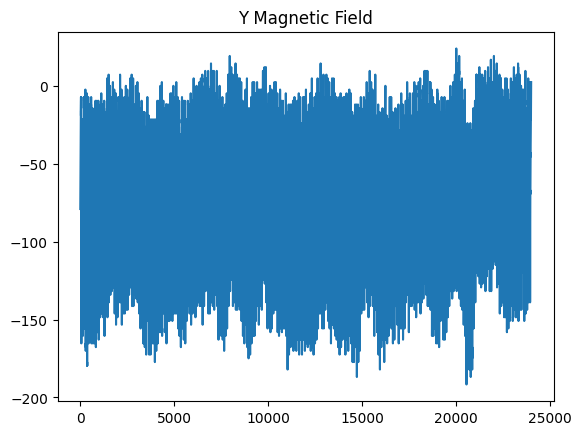

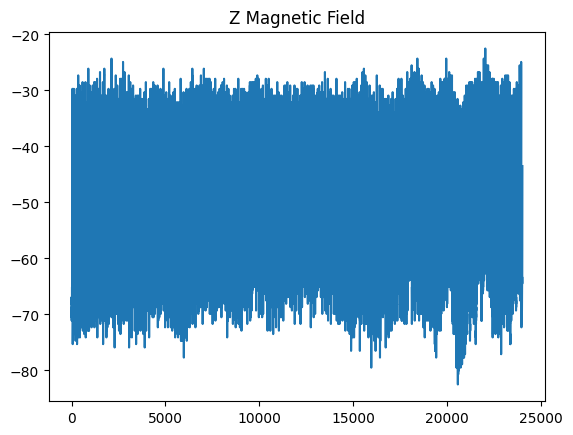

In [43]:
labels = ['X Acceleration','Y Acceleration', 'Z Acceleration', 'X Angular Velocity', 'Y Angular Velocity', 'Z Angular Velocity', 'X Magnetic Field', 'Y Magnetic Field', 'Z Magnetic Field']
import matplotlib.pyplot as plt

for file in files:
    print(file)
    for i in range(9):
        data = np.array(master[file])
        data = data[:,i]
        # Need to collect data at higher sampling rate so we can LPF and standardize signals
        # Current sampling rate = 1.4 Hz which means we can only use a cutoff frequency of 0.7 Hz
        # Need sampling rate = 40 Hz so we can use cutoff frequency of 20 Hz
        #data = (data-data.mean())/data.std()
        # bandpass filter with lower cutoff of 0.01 Hz
        # Have output of sedintary instead of standing vs sitting if model cannot differentiate between the two
        title = labels[i]
        plt.figure()
        plt.title(title)
        plt.plot(data)
        plt.show()

matt2-2r.log


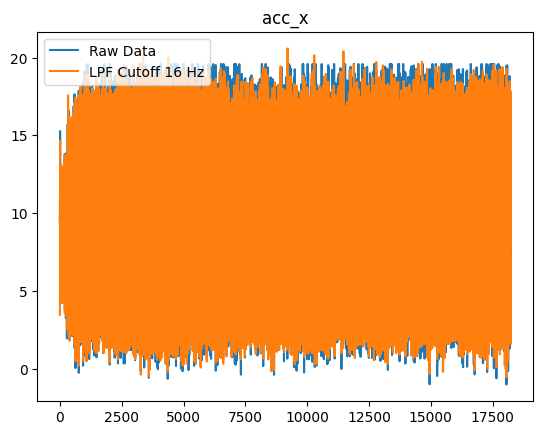

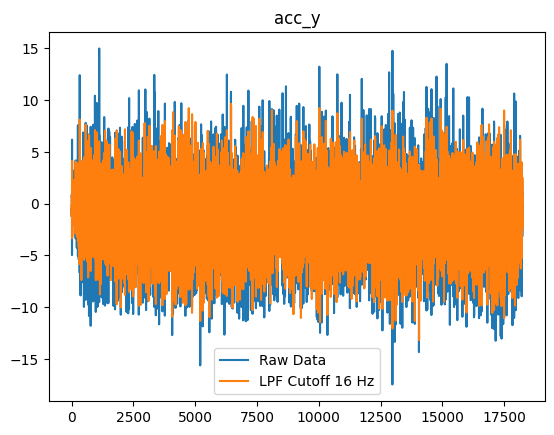

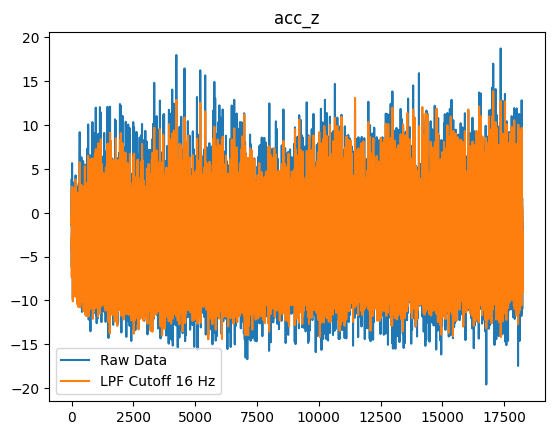

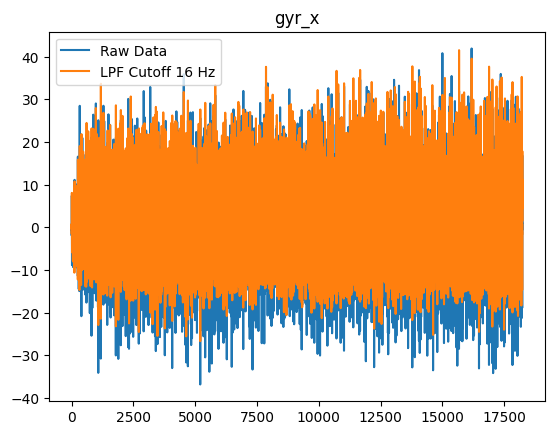

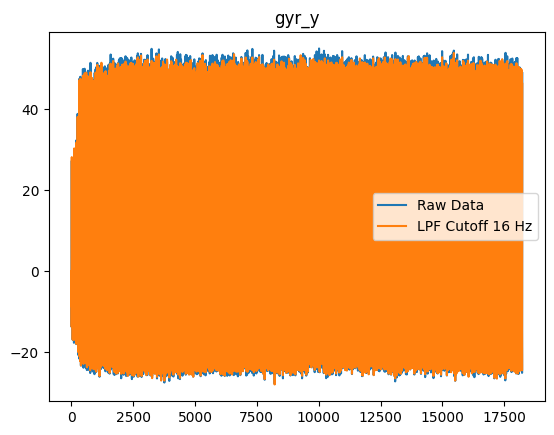

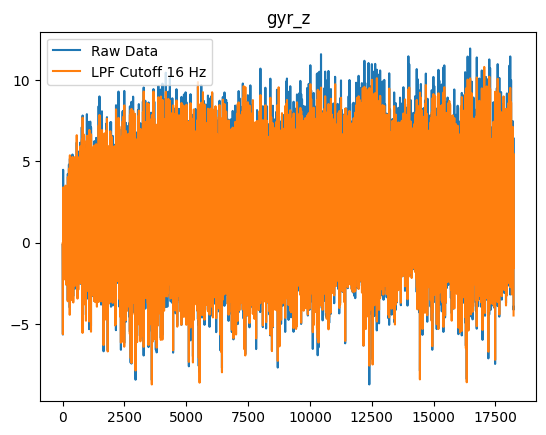

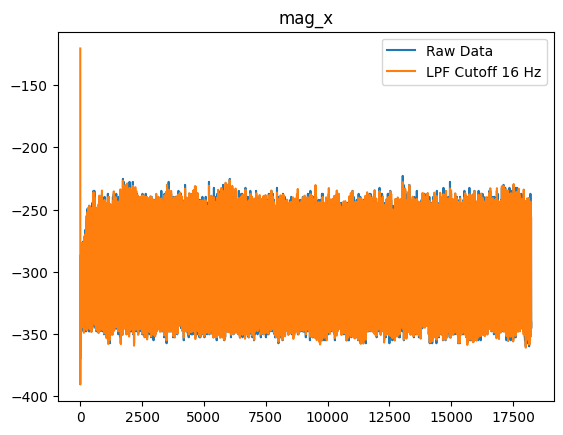

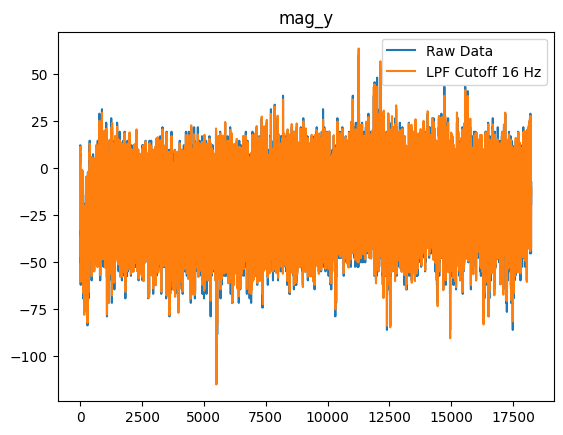

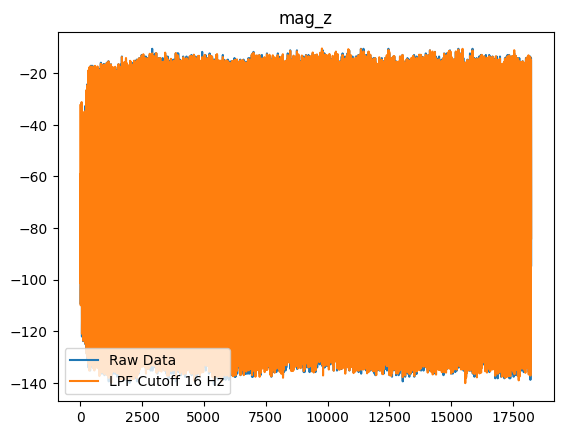

matt2-21l.log


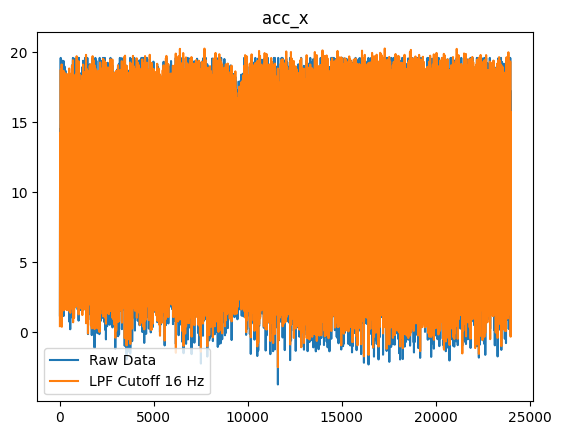

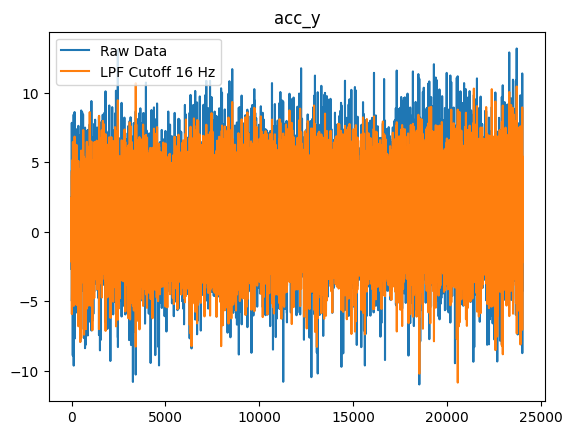

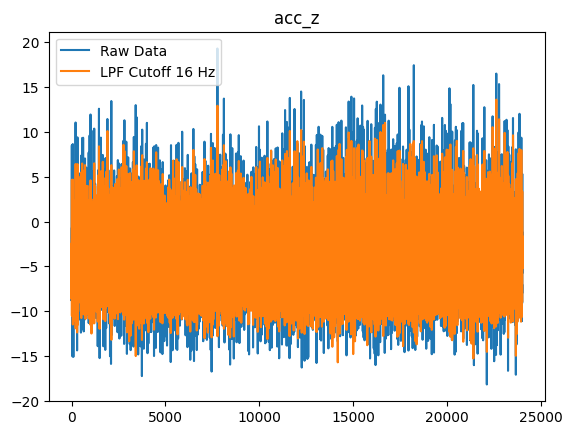

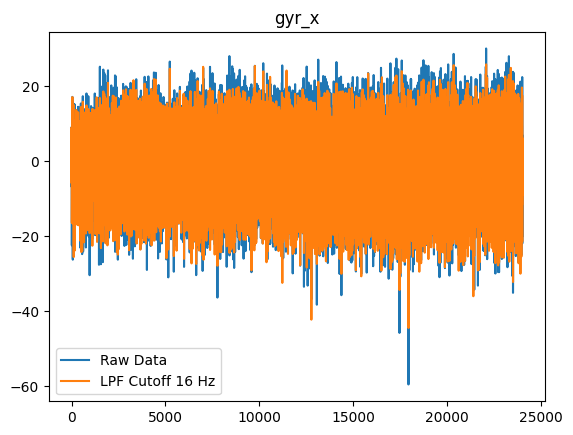

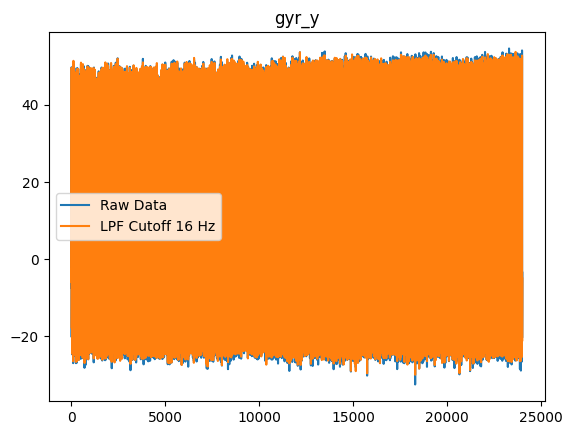

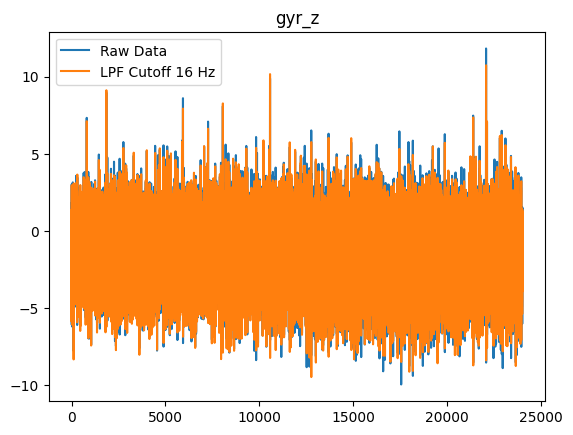

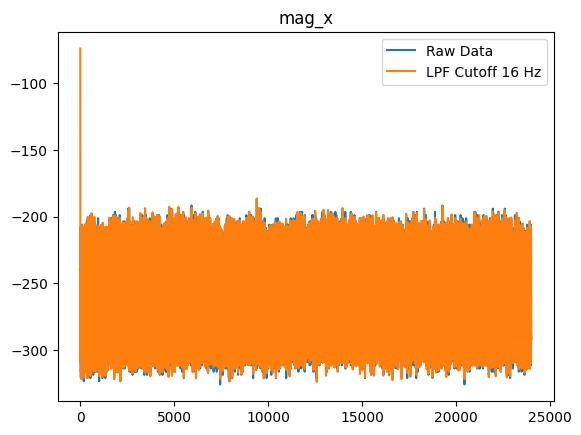

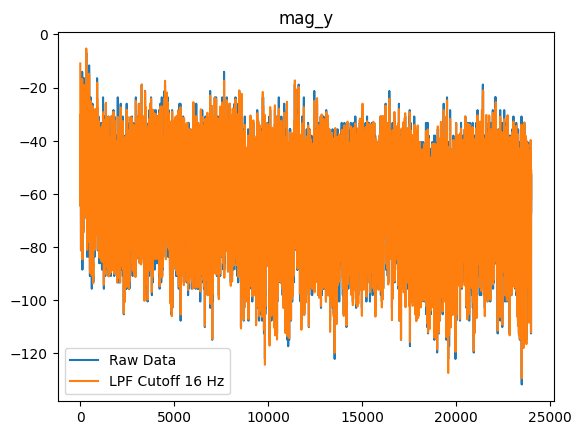

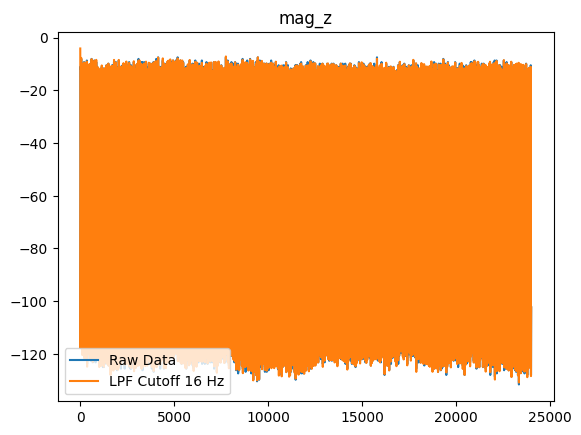

nick2-25r.log


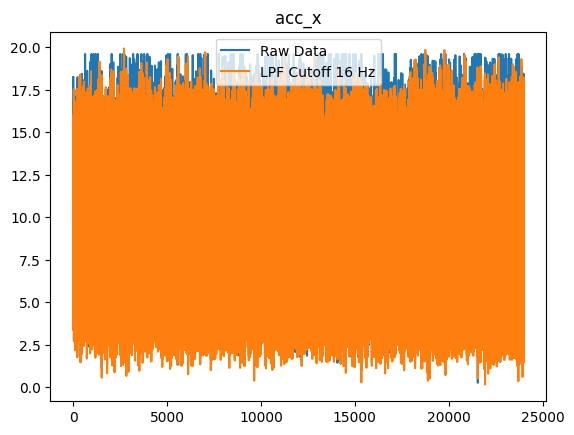

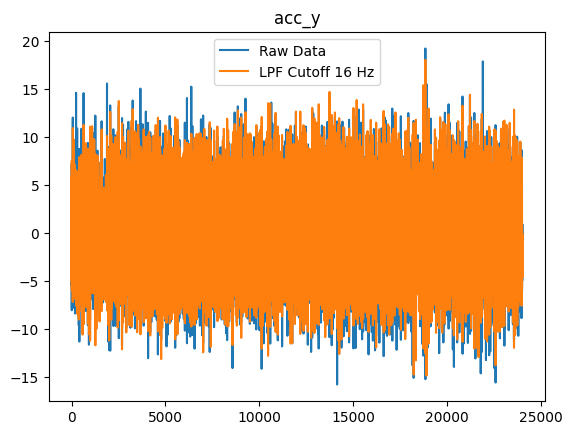

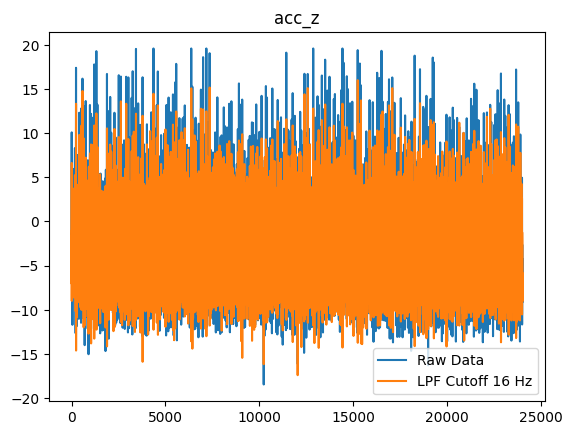

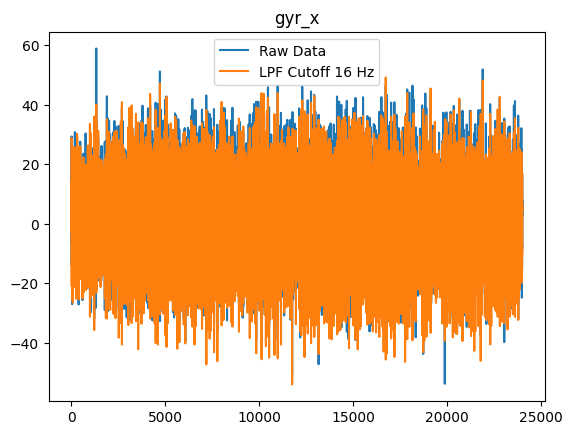

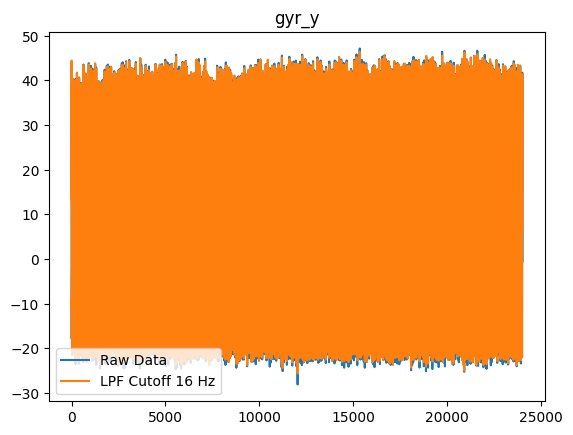

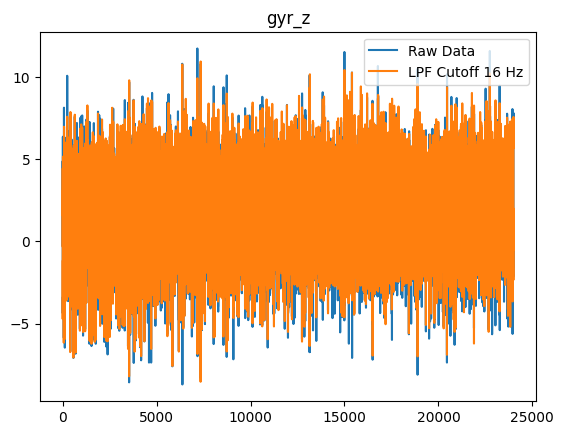

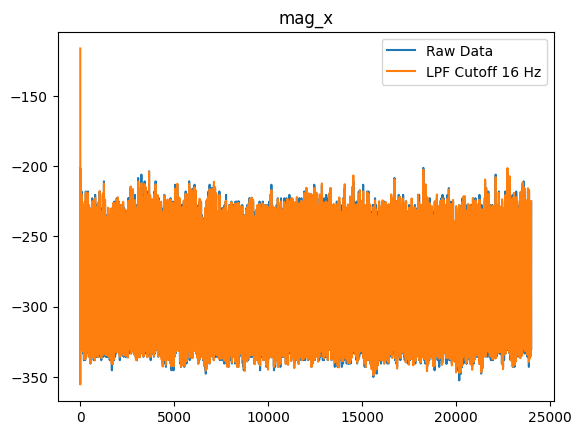

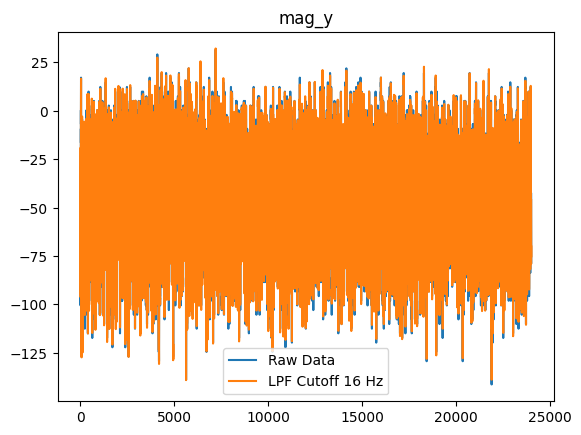

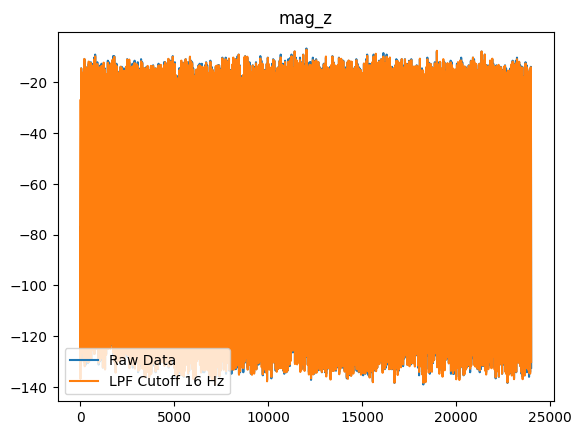

nick2-25l.log


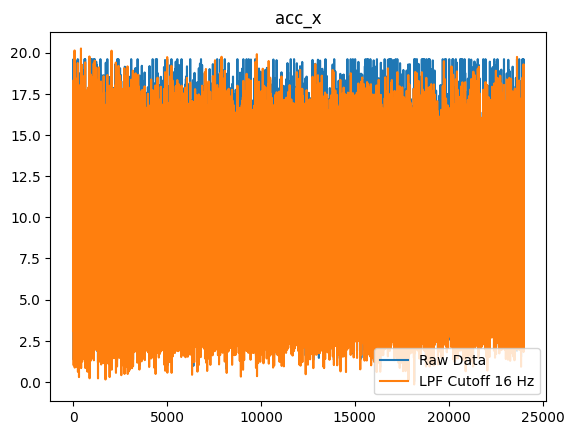

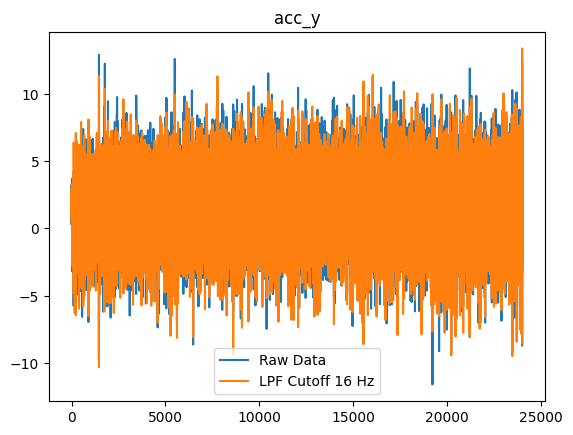

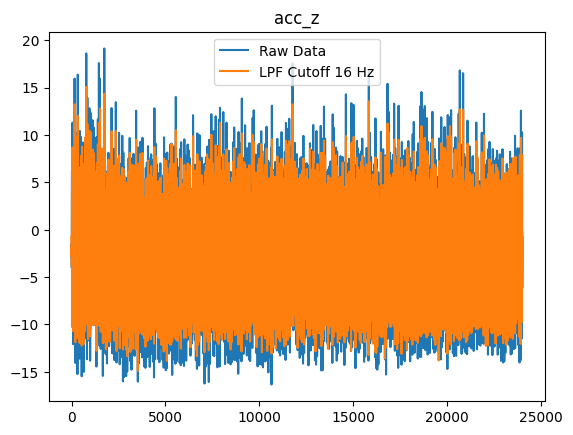

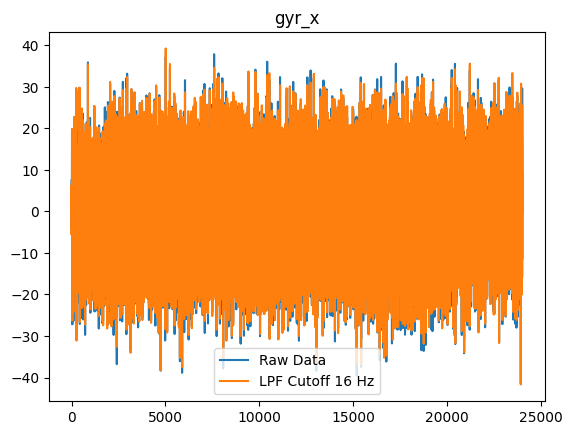

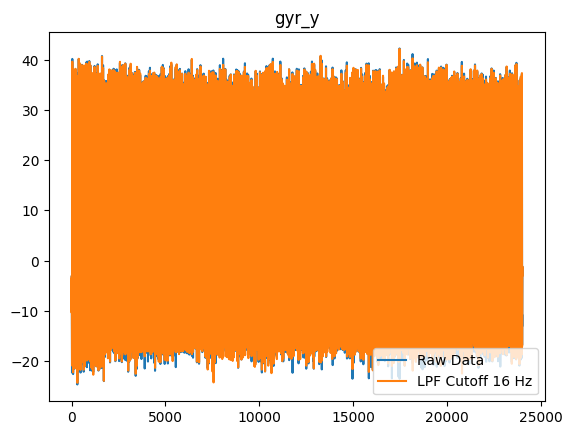

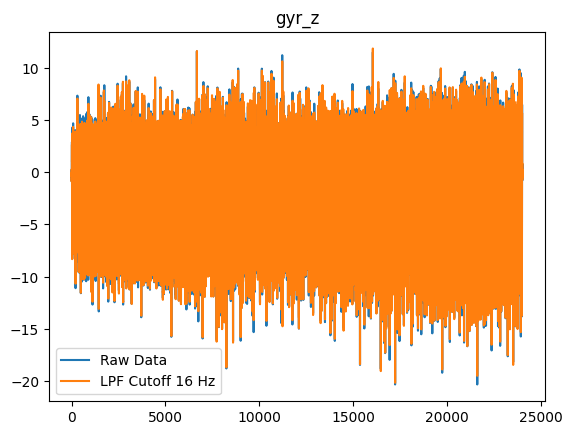

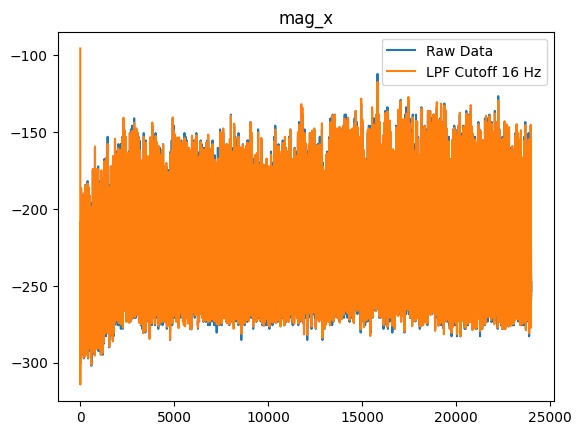

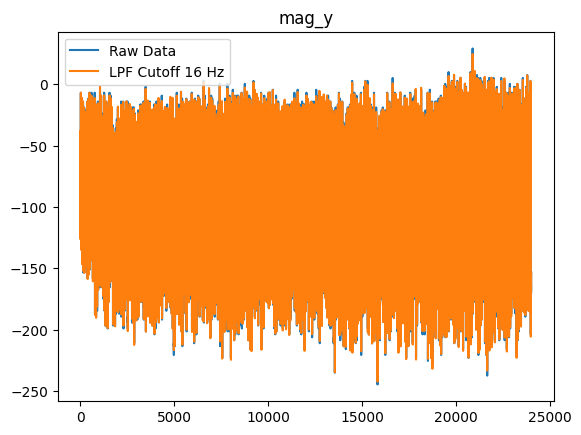

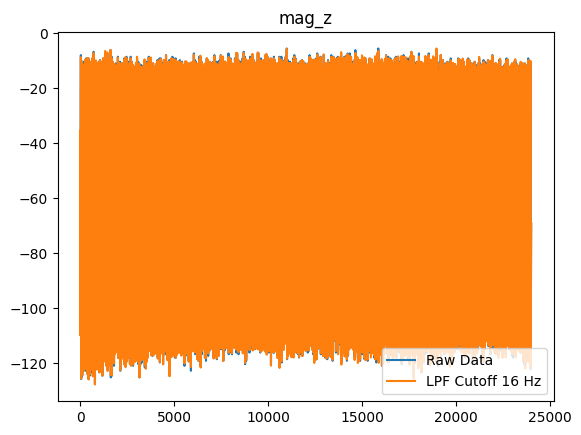

abby2-2r.log


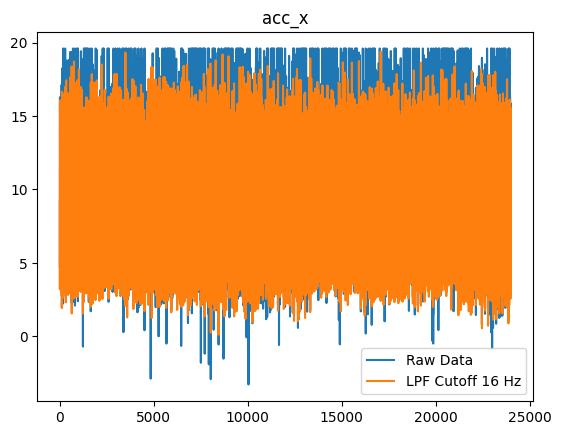

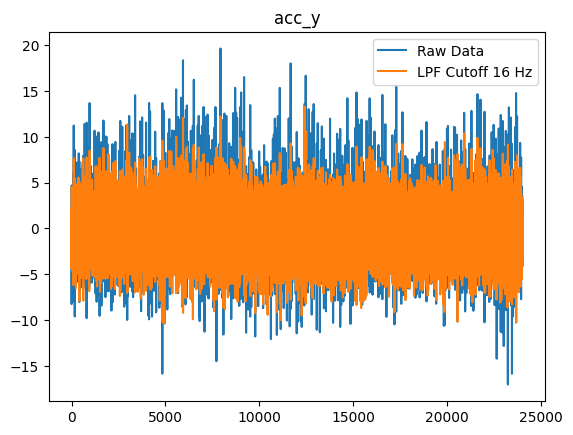

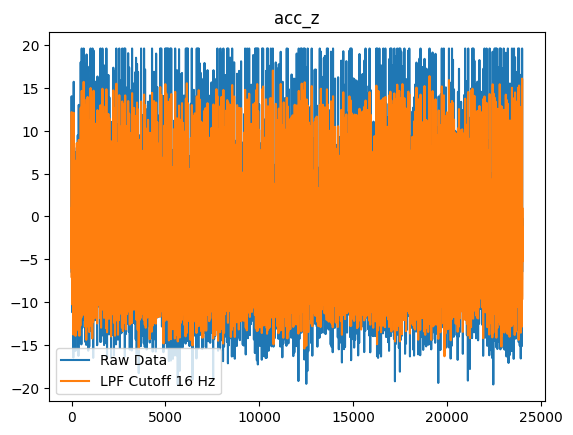

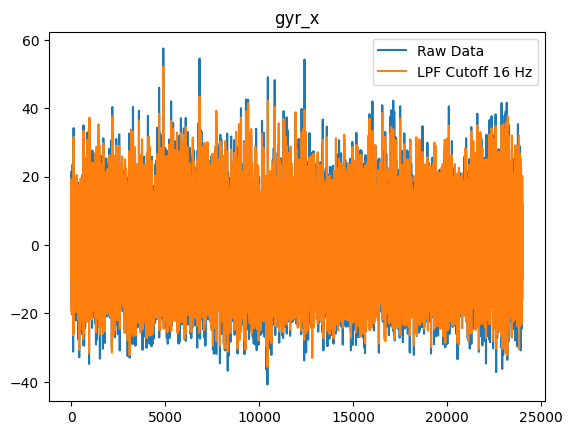

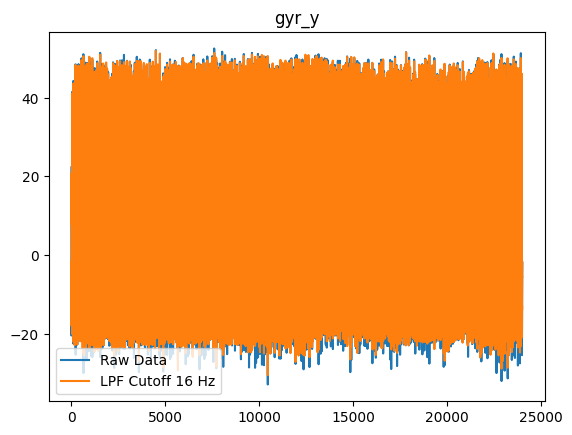

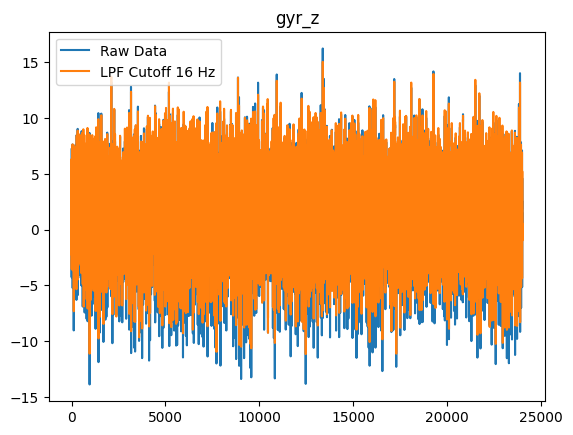

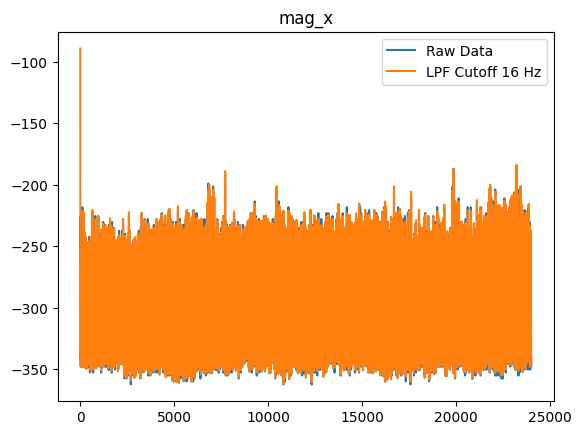

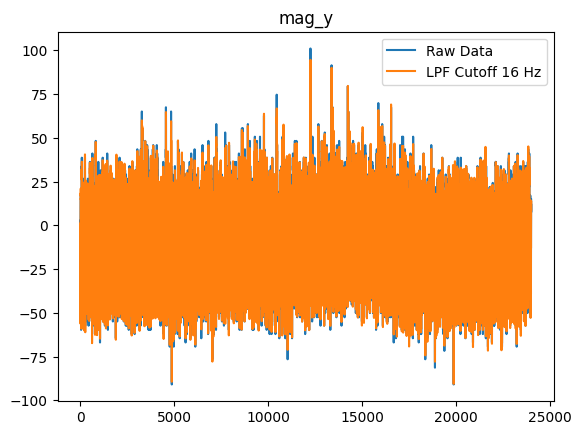

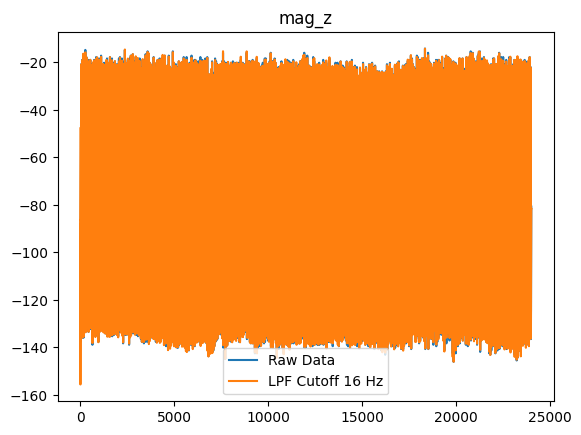

abby2-22l.log


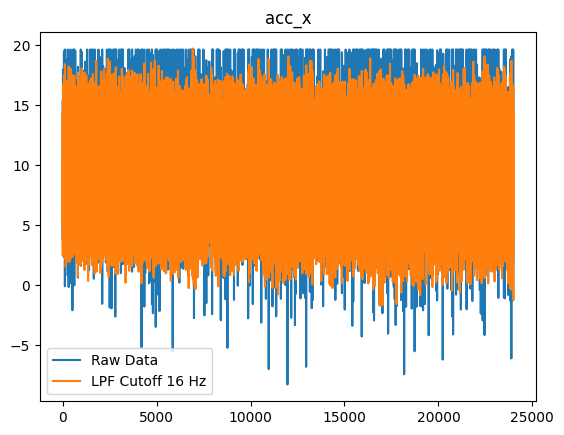

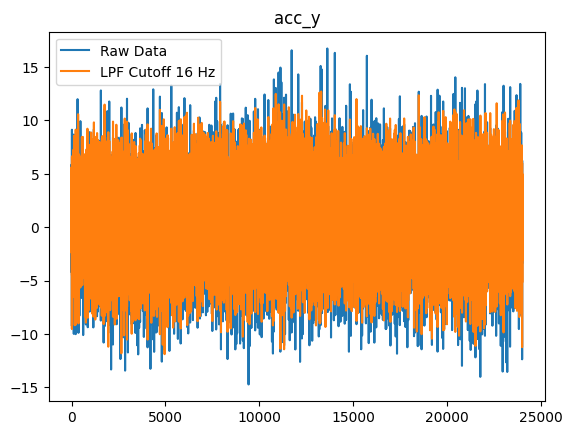

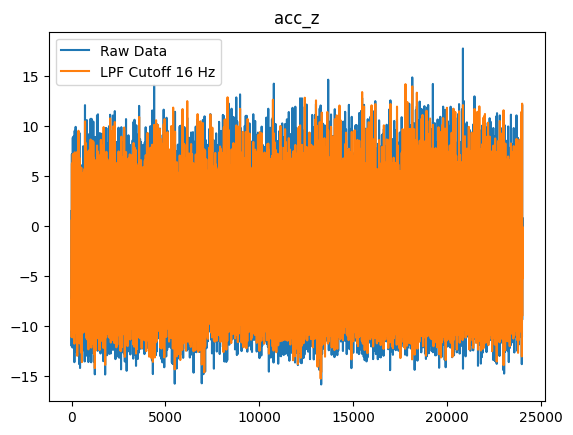

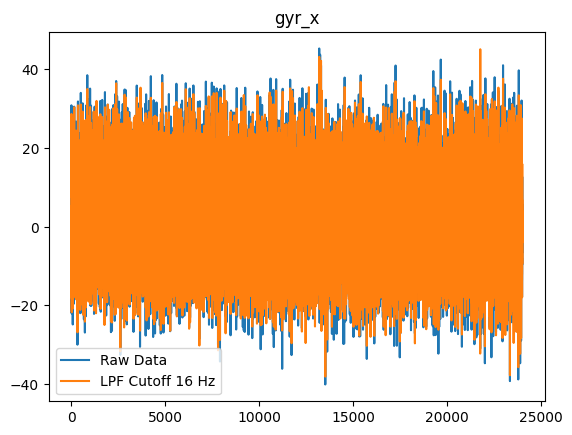

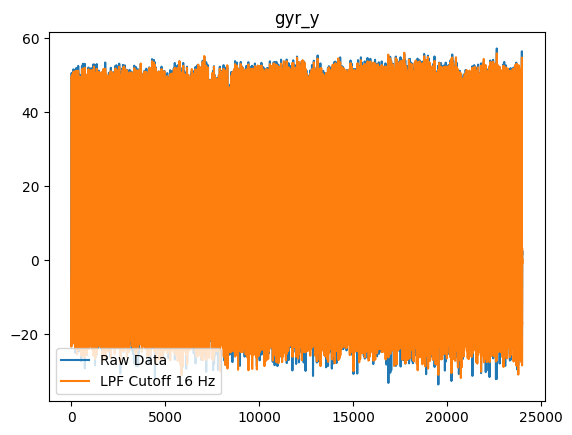

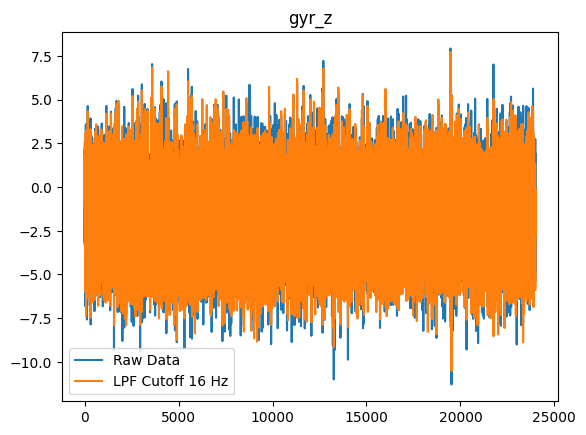

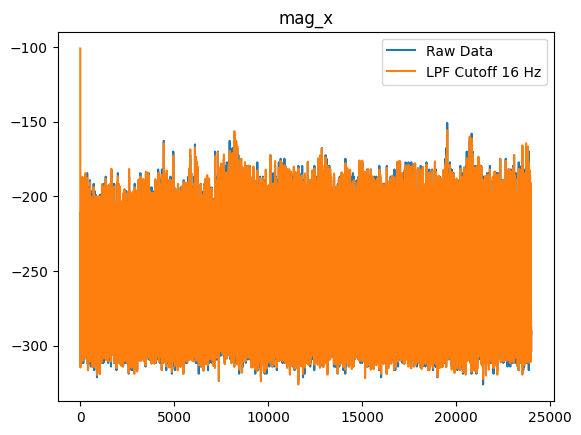

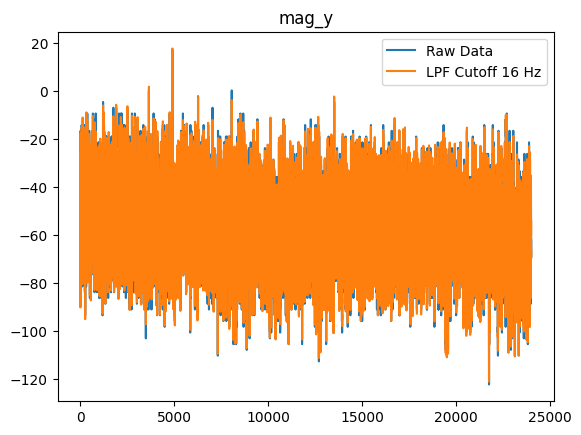

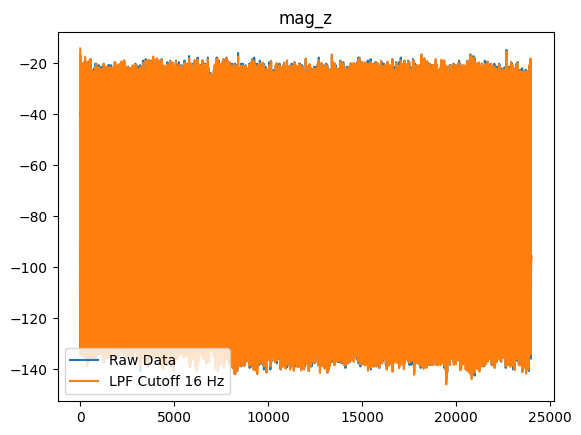

matt2-standr.log


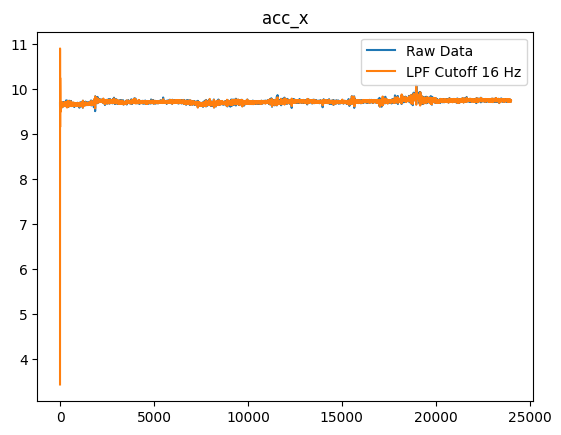

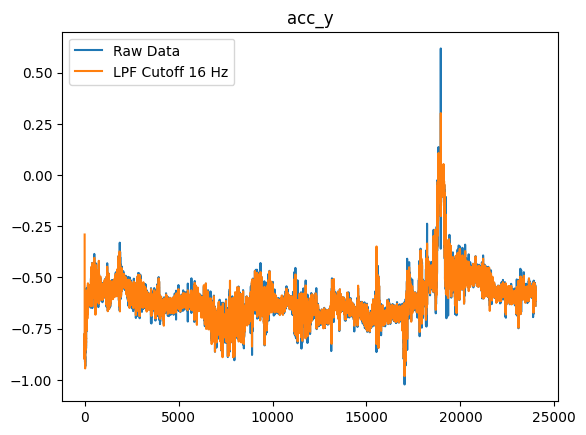

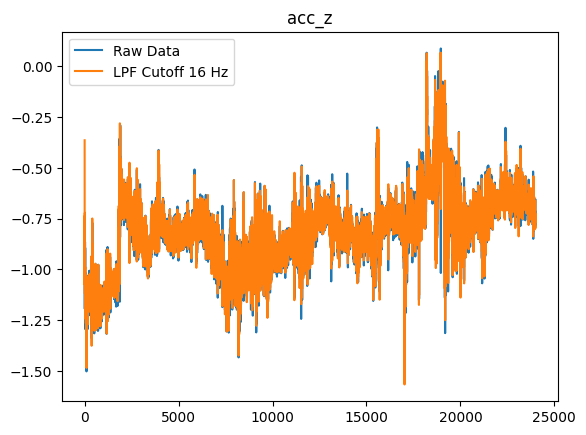

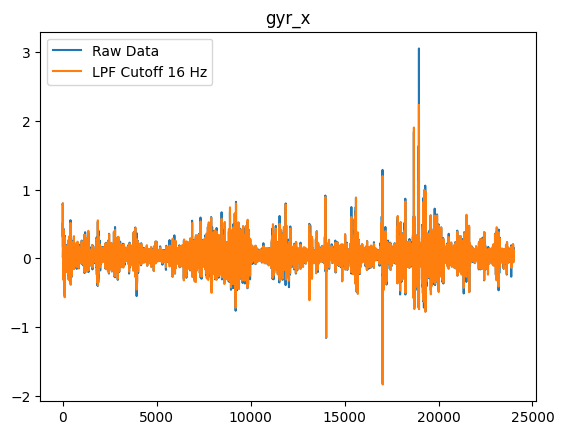

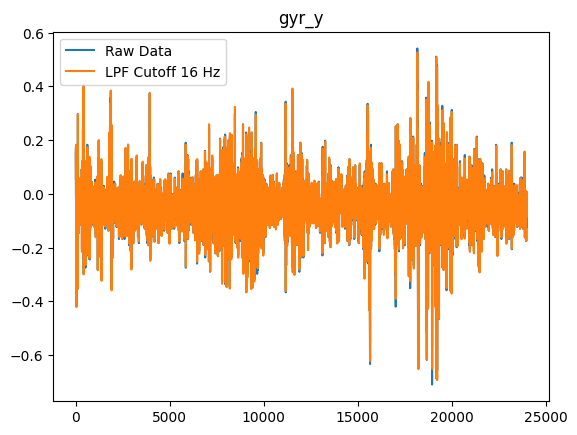

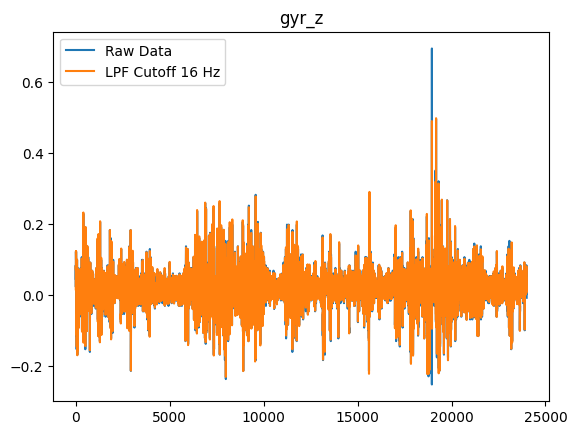

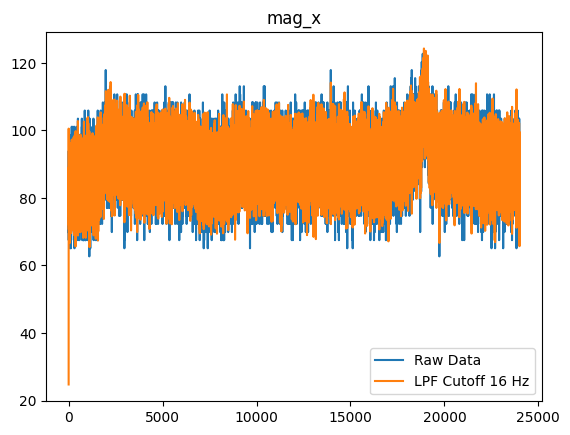

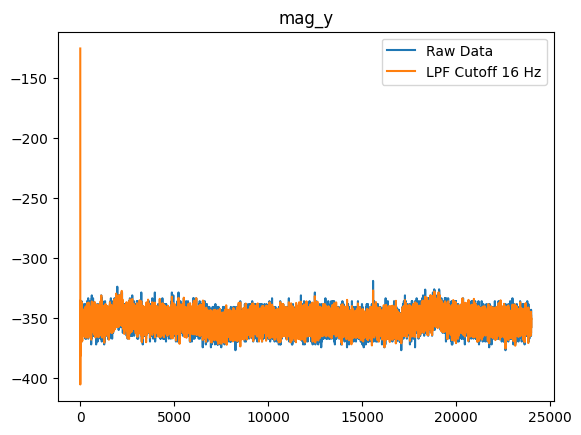

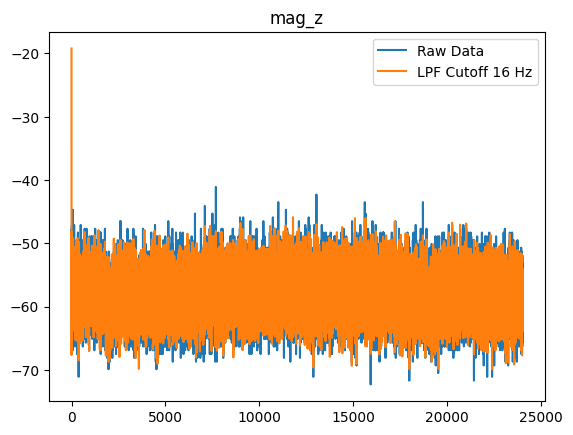

matt2-sitr.log


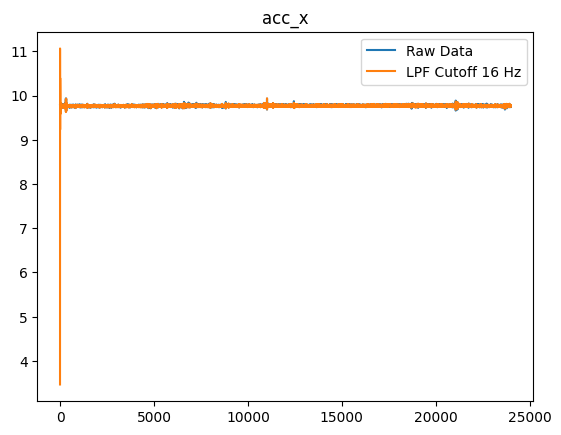

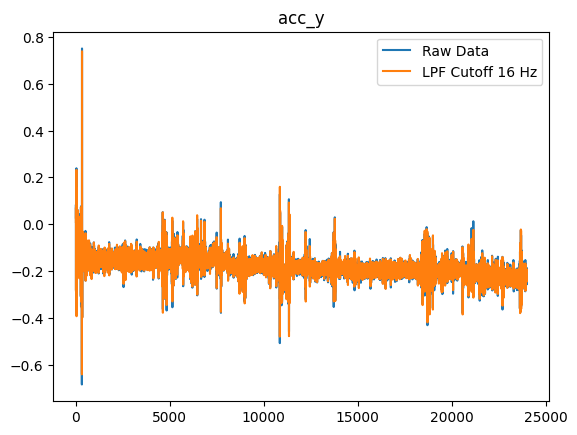

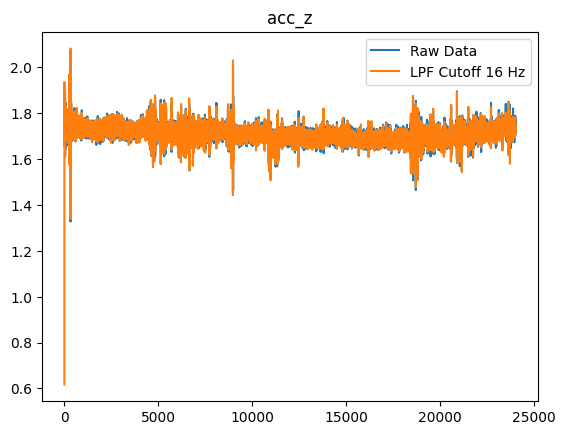

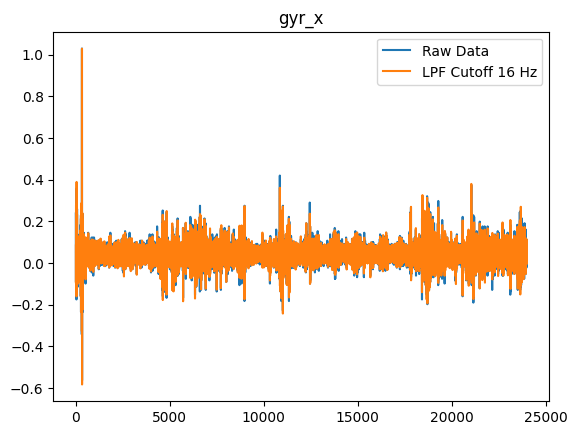

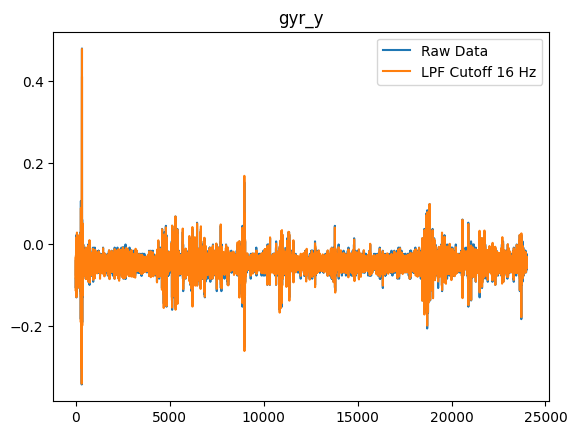

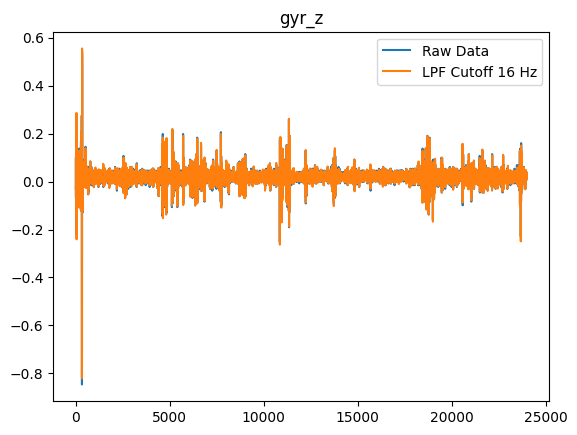

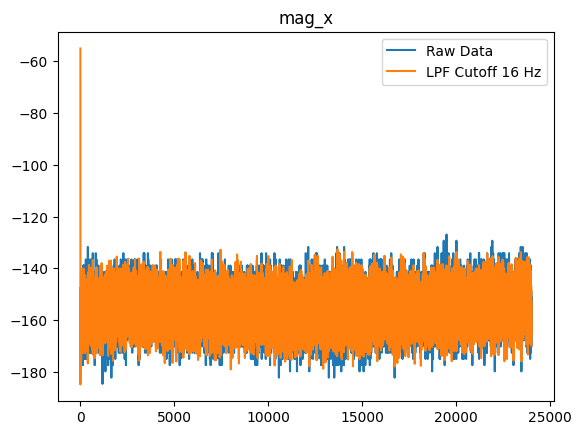

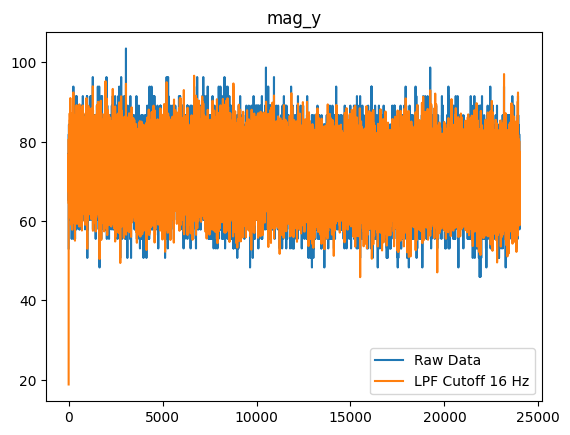

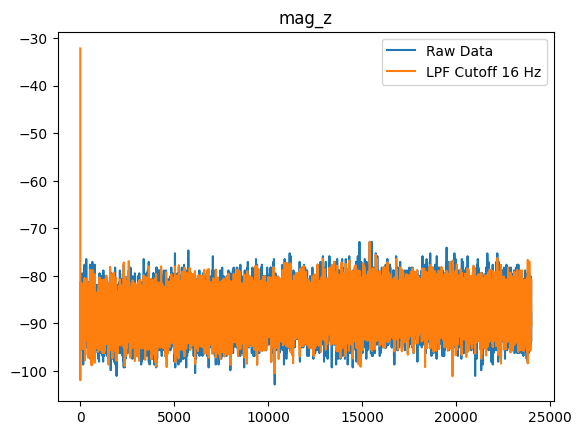

matt2-sitl.log


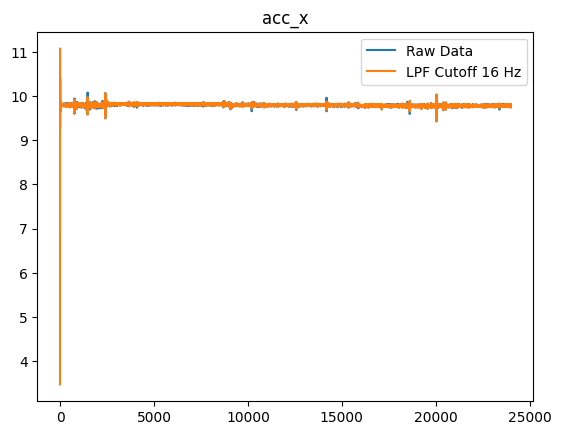

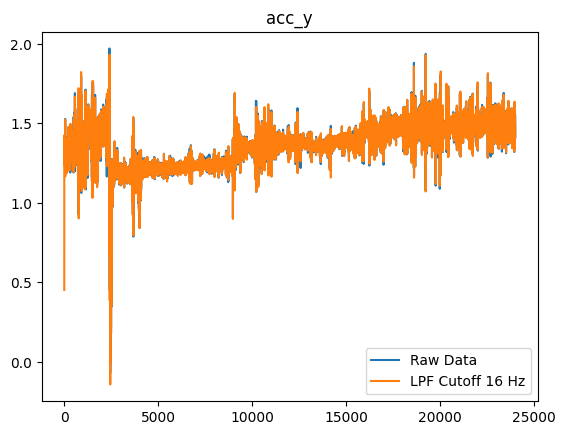

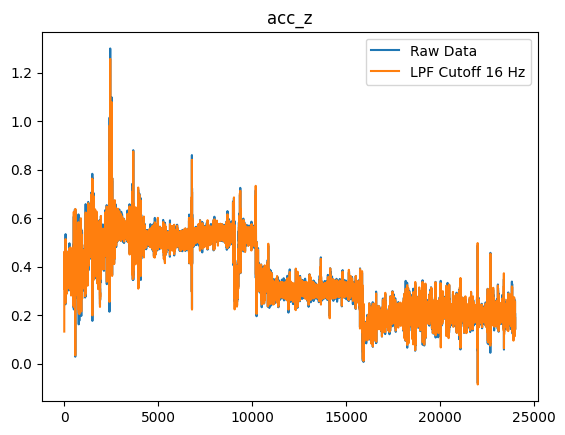

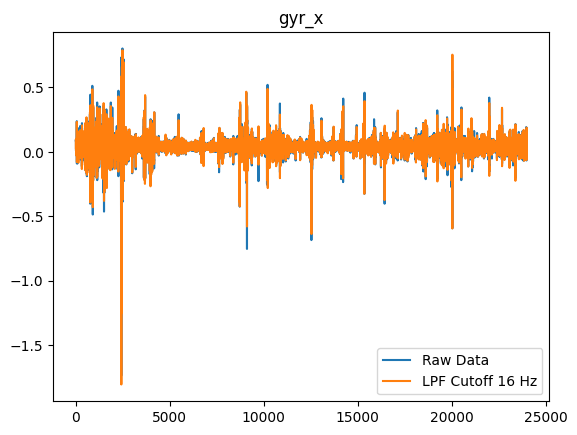

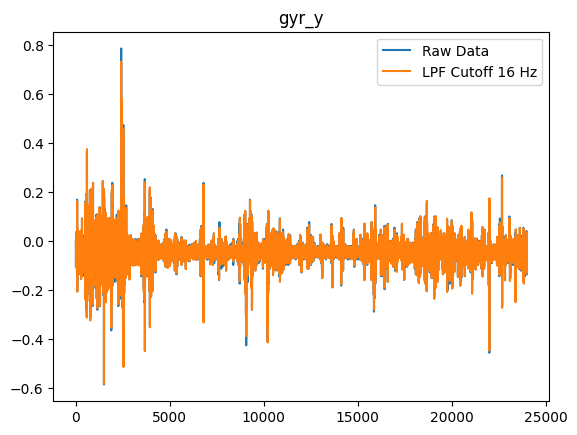

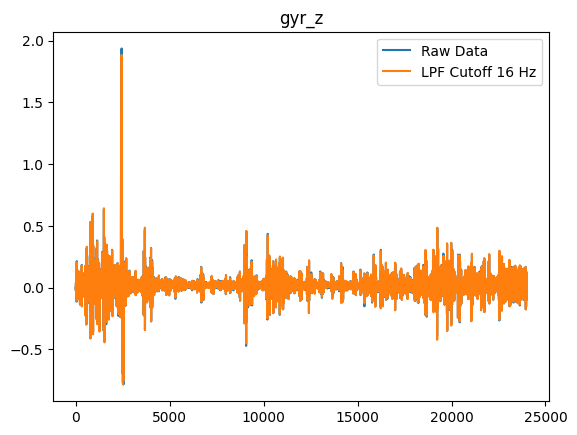

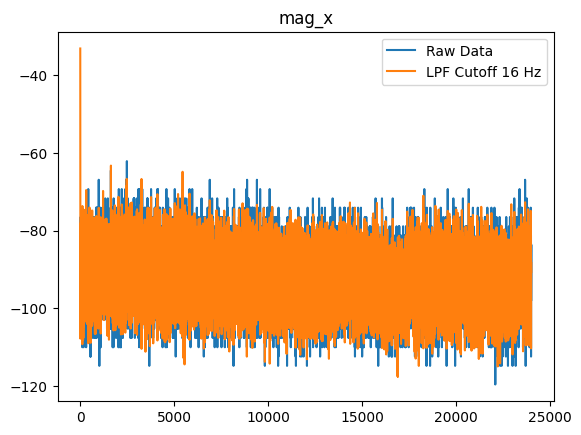

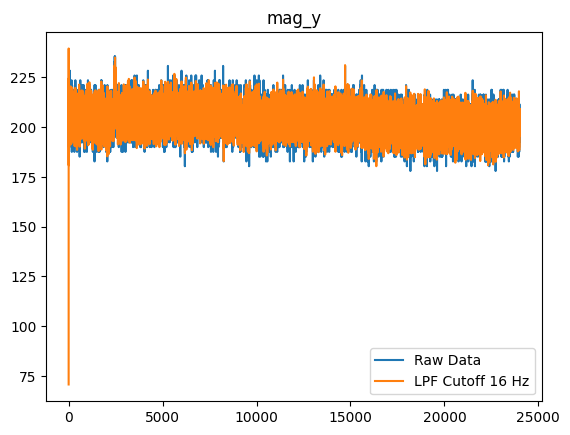

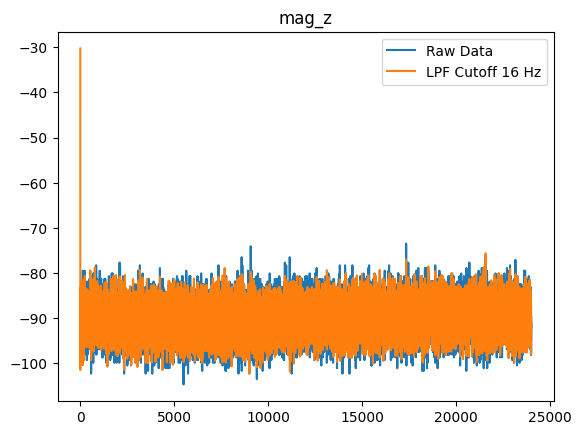

abby1-stair-48r.log


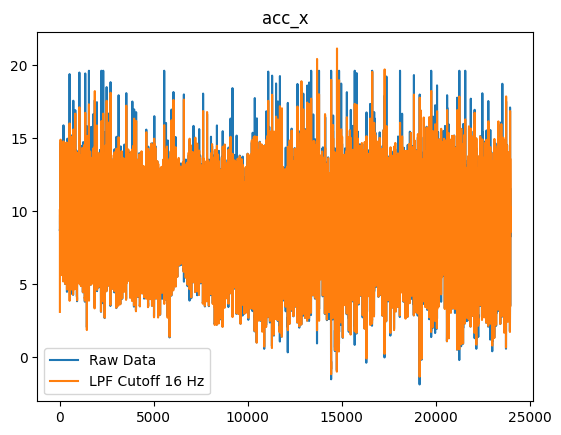

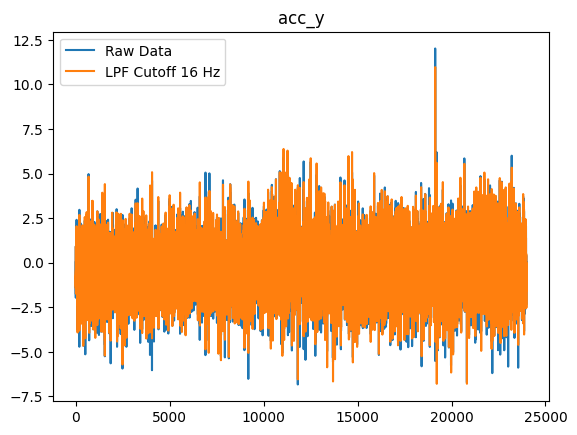

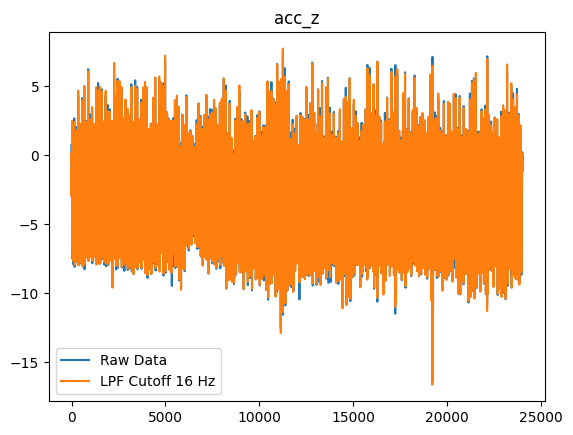

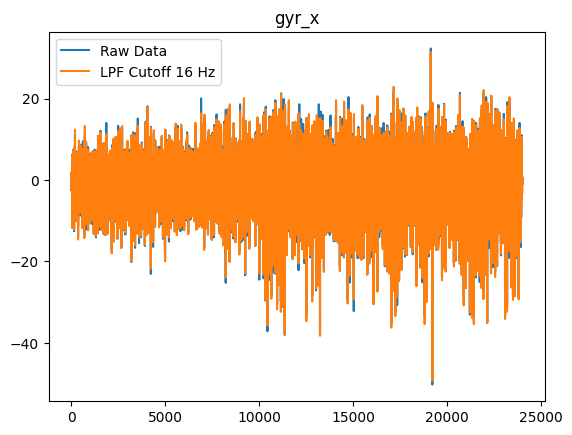

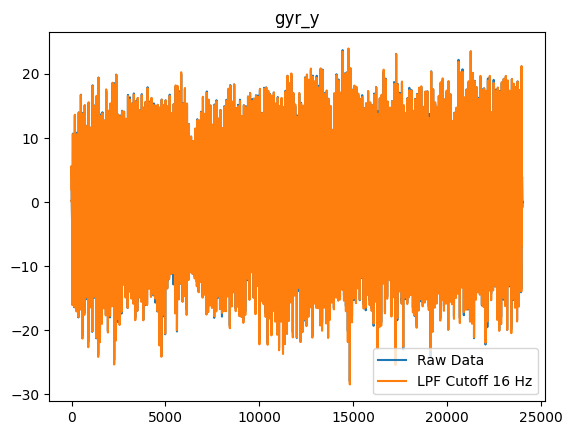

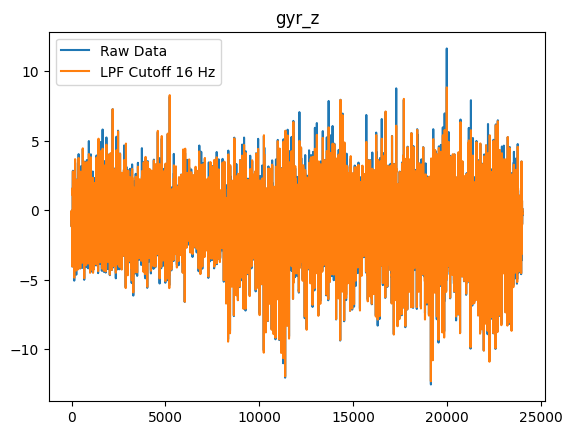

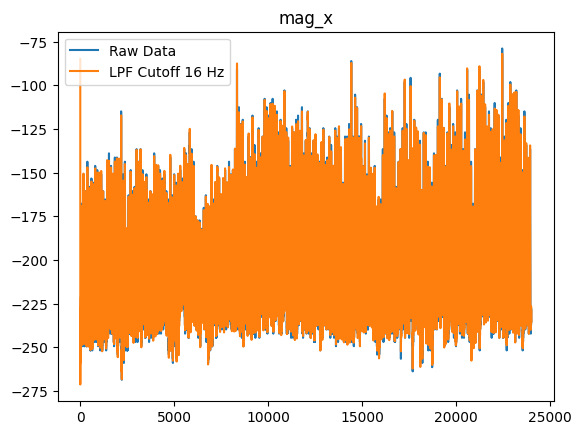

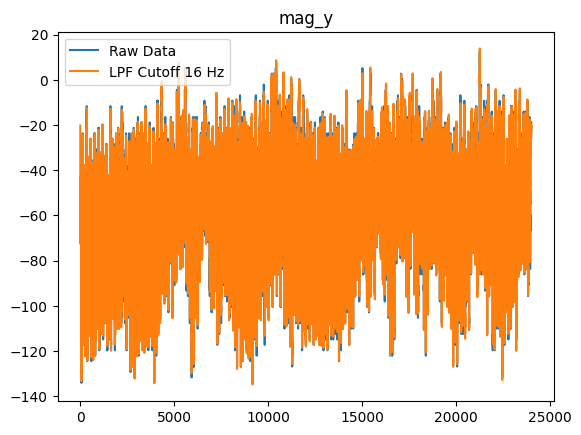

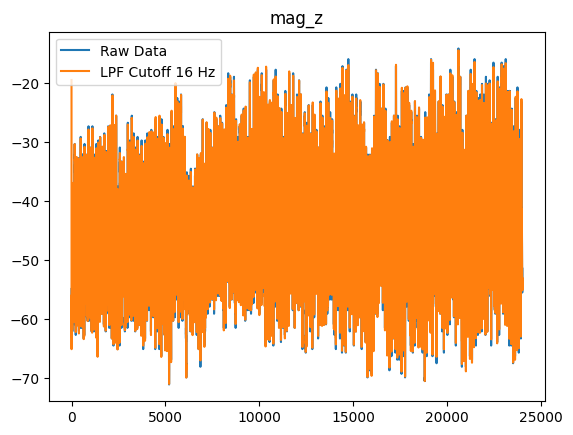

abby1-stair-72l.log


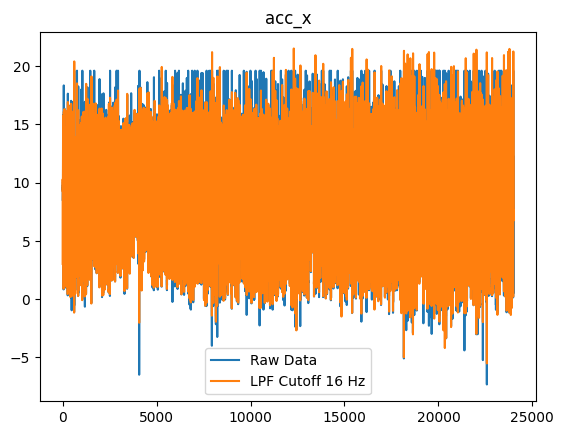

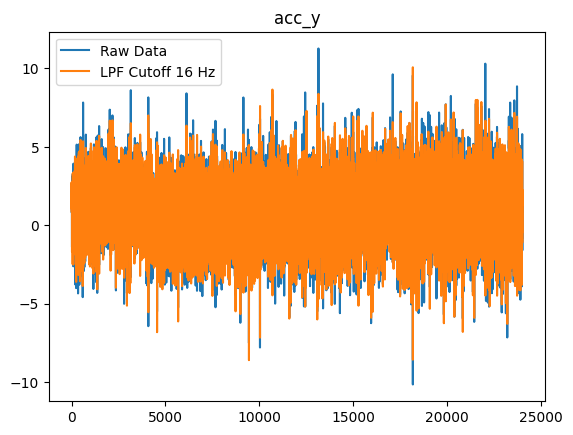

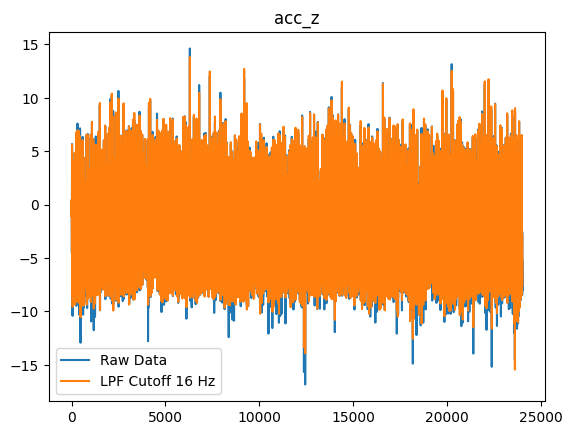

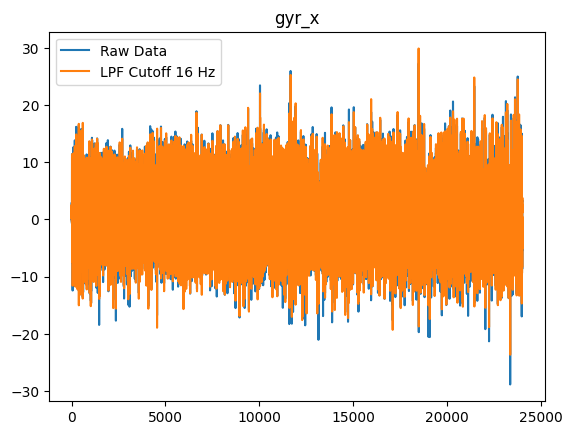

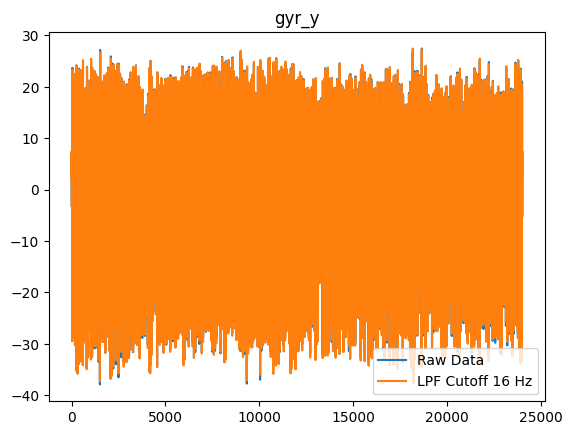

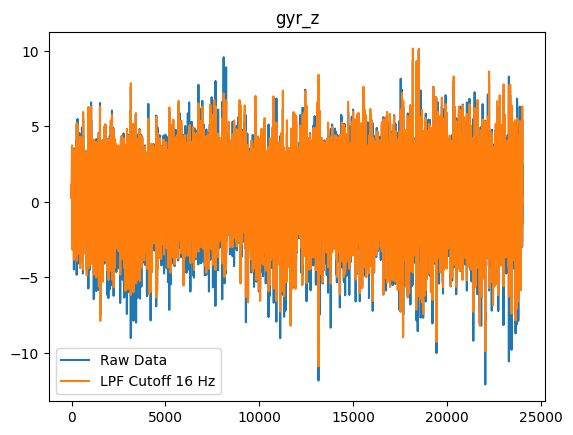

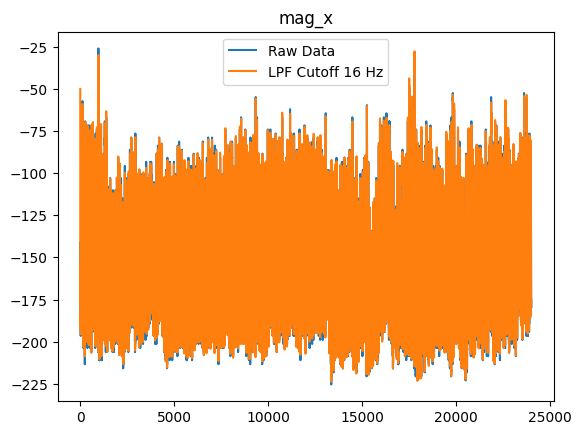

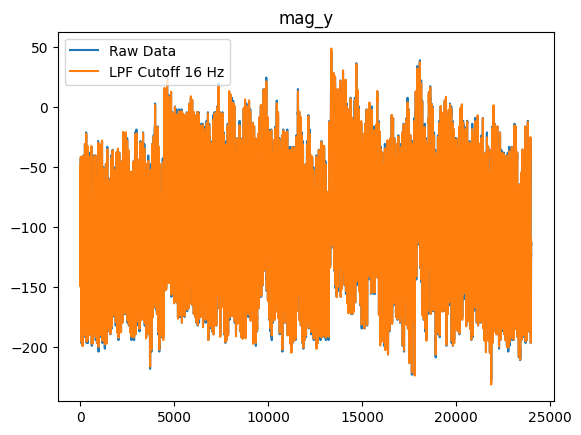

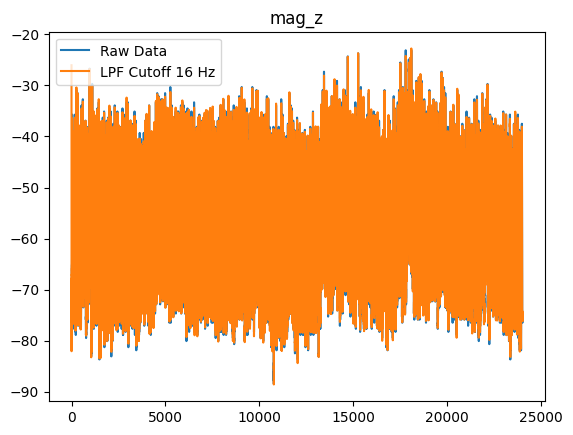

matt1-stair-60r.log


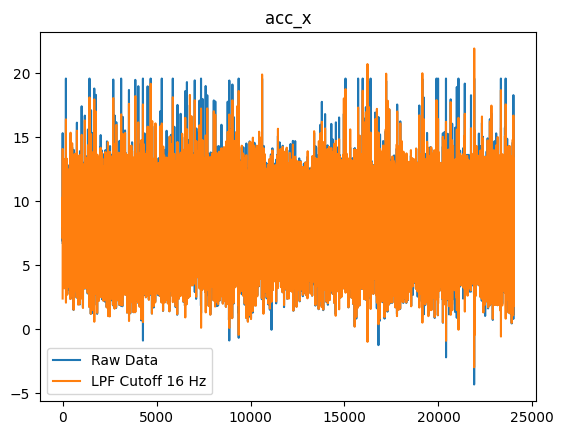

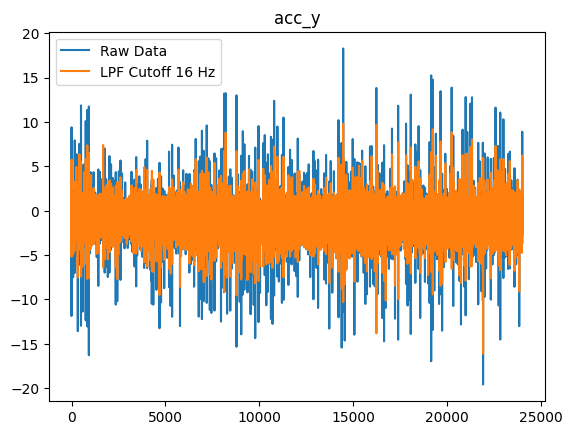

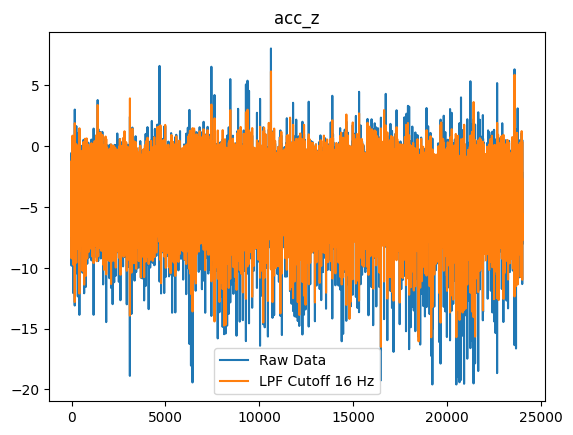

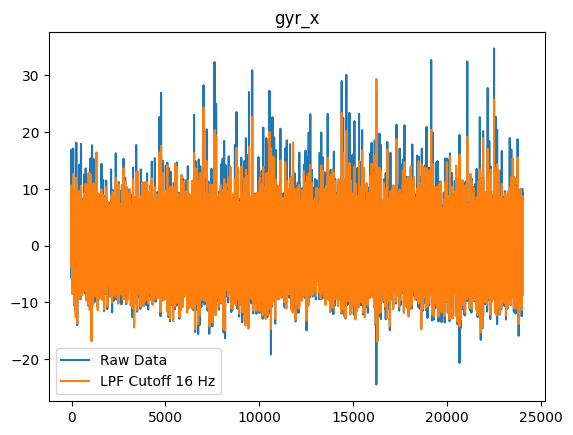

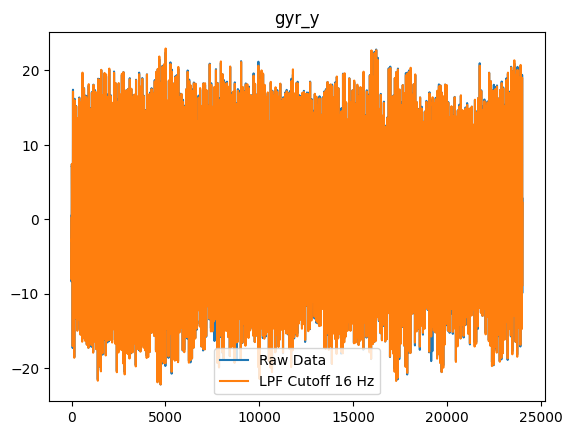

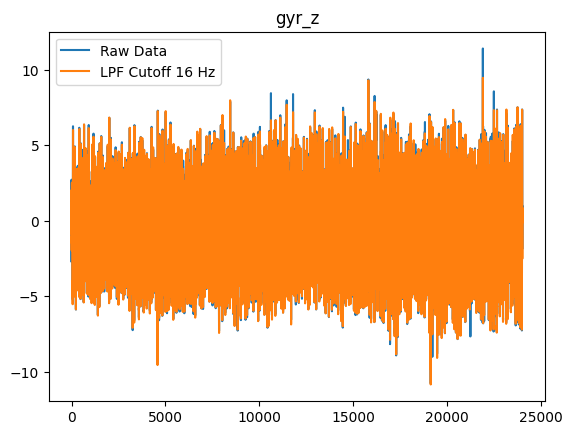

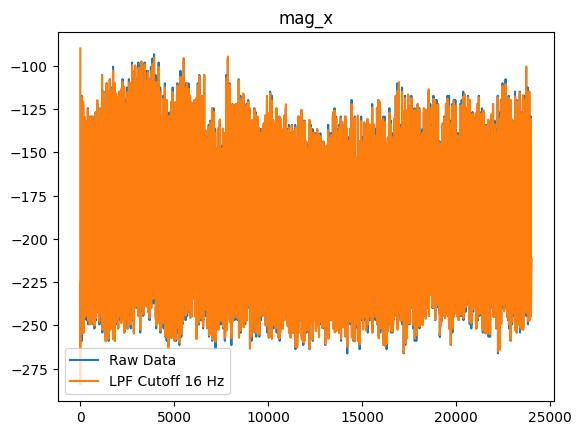

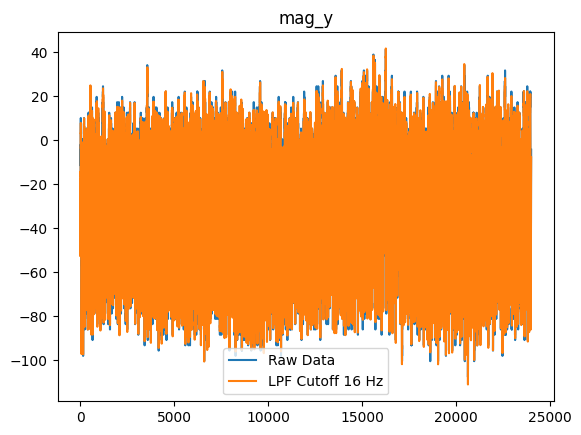

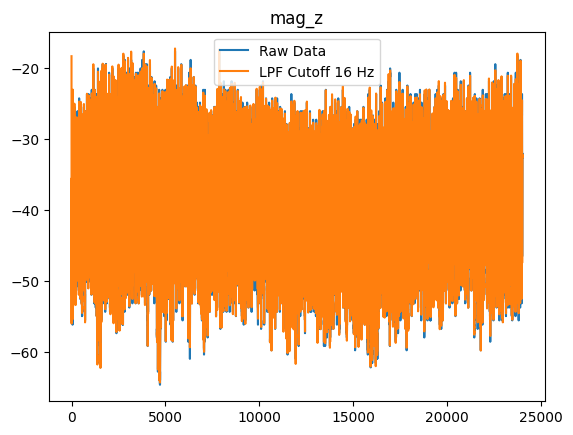

matt1-stair-66l.log


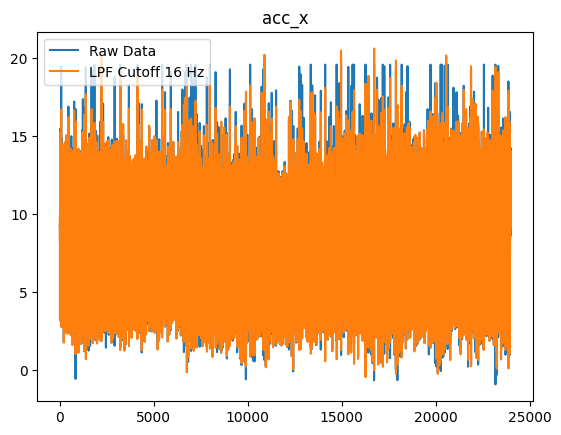

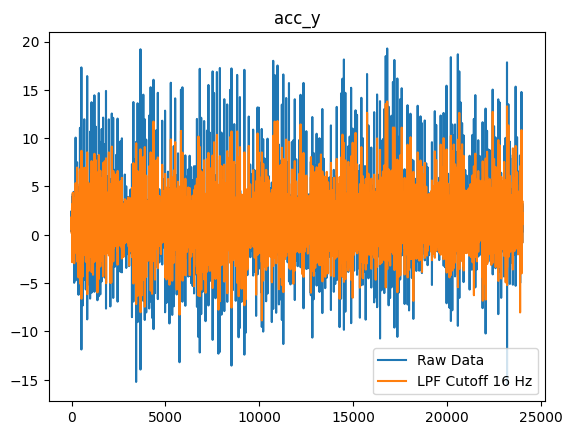

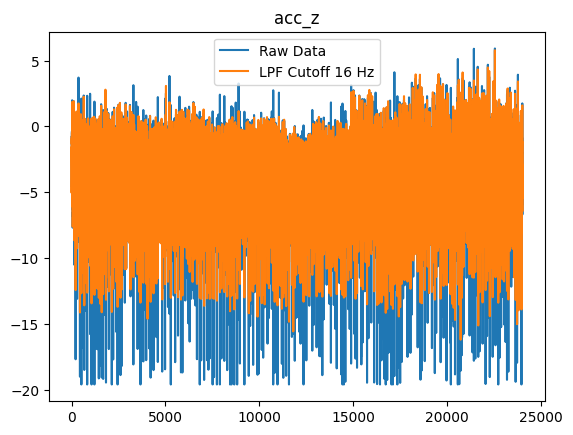

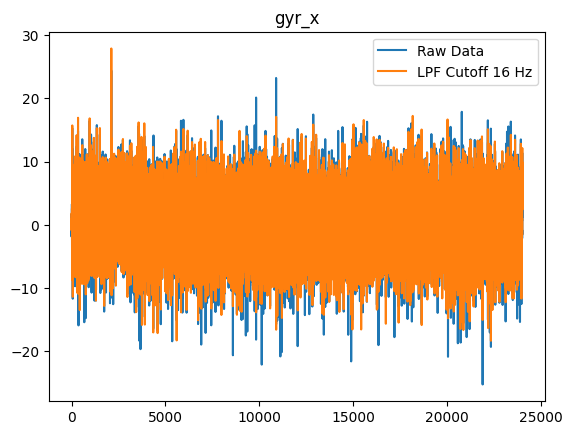

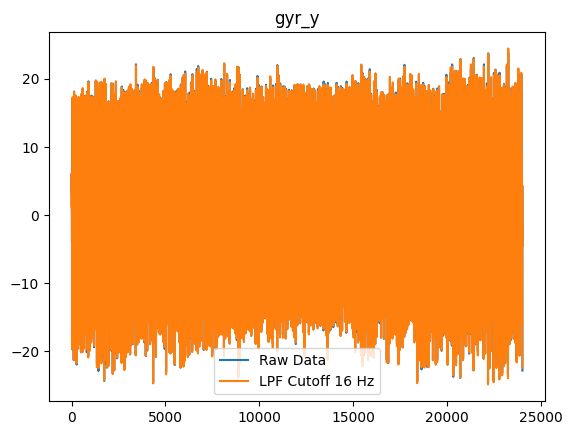

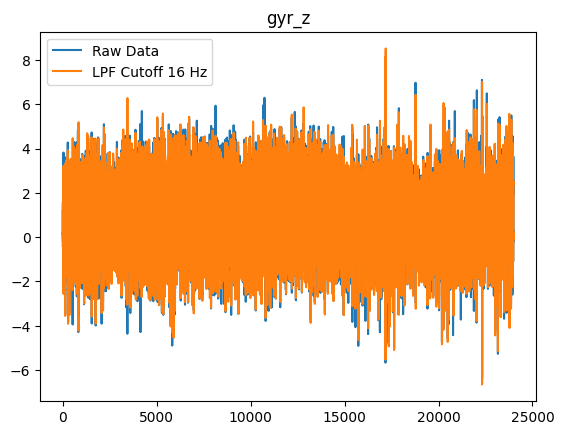

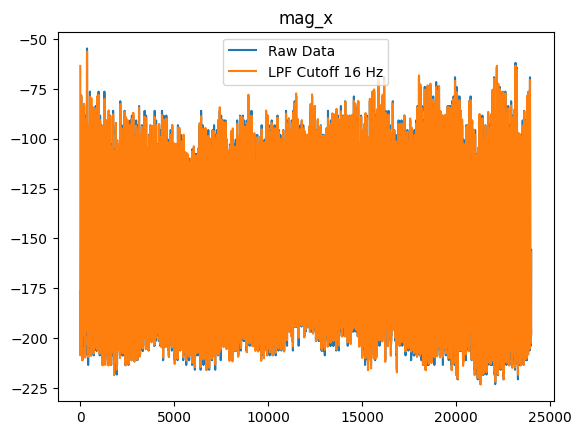

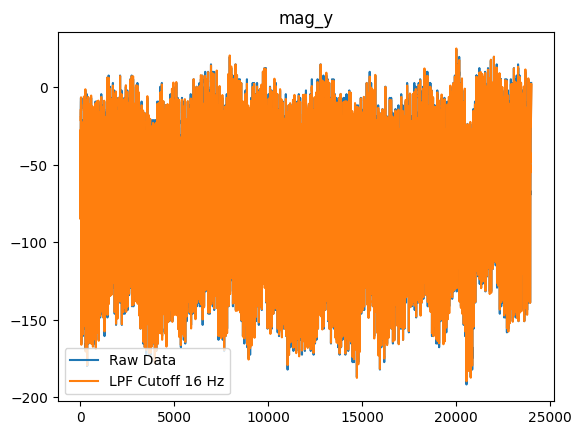

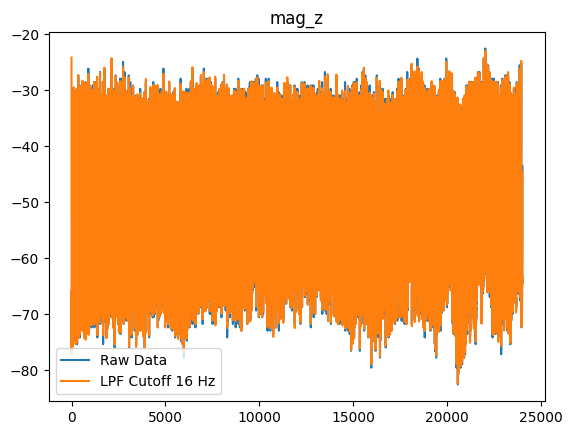

In [113]:
labels = ['X Acceleration','Y Acceleration', 'Z Acceleration', 'X Angular Velocity', 'Y Angular Velocity', 'Z Angular Velocity', 'X Magnetic Field', 'Y Magnetic Field', 'Z Magnetic Field']
import matplotlib.pyplot as plt
cols = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']
for file in files:
    print(file)
    for col in cols:
        data = np.array(master[file][col])
        #data = data[:,i]
        y = butter_lowpass_filter(data.flatten(), cutoff, fs)
        # Need to collect data at higher sampling rate so we can LPF and standardize signals
        # Current sampling rate = 1.4 Hz which means we can only use a cutoff frequency of 0.7 Hz
        # Need sampling rate = 40 Hz so we can use cutoff frequency of 20 Hz
        #data = (data-data.mean())/data.std()
        master[file][col] = y
        plt.figure()
        plt.title(col)
        plt.plot(data, label = 'Raw Data')
        plt.plot(y, label='LPF Cutoff 16 Hz')
        plt.legend()
        plt.show()

In [114]:
import torch
import torch.nn as nn

data_agg = np.empty((3827,80,10))
train_counter = 0
train_2s_windows = 0

for file in files:
    print('Adding ', file, ' to training set')
    df = master[file]
    data = np.array(df)
    if file == 'matt2-2r.log':
        data = data[:18160]
    data = data.reshape((-1,80,10))
    data_agg[train_counter:train_counter+data.shape[0]] = data
    train_counter += data.shape[0]
    length = data.shape[0]
    train_2s_windows += int(length)

print(train_2s_windows)

Adding  matt2-2r.log  to training set
Adding  matt2-21l.log  to training set
Adding  nick2-25r.log  to training set
Adding  nick2-25l.log  to training set
Adding  abby2-2r.log  to training set
Adding  abby2-22l.log  to training set
Adding  matt2-standr.log  to training set
Adding  matt2-sitr.log  to training set
Adding  matt2-sitl.log  to training set
Adding  abby1-stair-48r.log  to training set
Adding  abby1-stair-72l.log  to training set
Adding  matt1-stair-60r.log  to training set
Adding  matt1-stair-66l.log  to training set
3827


In [174]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob, fc_dim, bi):
        super(RNNModel, self).__init__()

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob, bidirectional=bi
        )
        # Fully connected layer
        self.fc = nn.Linear(fc_dim, output_dim)

    def forward(self, x):

        out, h0 = self.rnn(x)

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out.flatten(start_dim=-2))
        return torch.sigmoid(out)

In [175]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob, fc_dim, bi):
        super(LSTMModel, self).__init__()

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob, bidirectional=bi
        )

        # Fully connected layer
        self.fc = nn.Linear(fc_dim, output_dim)

    def forward(self, x):

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x)

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out.flatten(start_dim=-2))

        return torch.sigmoid(out)

In [176]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob, fc_dim, bi):
        super(GRUModel, self).__init__()

        # GRU layers
        self.gru = nn.GRU(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob, bidirectional=bi
        )

        # Fully connected layer
        self.fc = nn.Linear(fc_dim, output_dim)

    def forward(self, x):
        
        out, _ = self.gru(x)

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out.flatten(start_dim=-2))

        return torch.sigmoid(out)

In [116]:
np.random.seed(0)
np.random.shuffle(data_agg)
train, test = data_agg[:3061], data_agg[3061:]
print(train.shape, test.shape)

(3061, 80, 10) (766, 80, 10)


In [192]:
import torch.nn.functional as f
# Vanilla RNN 1
input_dim = 9
hidden_dim = 6 
layer_dim = 1 
output_dim = 4 
dropout_prob = 0
bi = False
fc_dim = 80*hidden_dim
rnn = RNNModel(input_dim, hidden_dim, layer_dim, output_dim, dropout_prob, fc_dim, bi)
optimizer = torch.optim.Adam(rnn.parameters(),lr=1e-3,weight_decay=0)
rnn.double()

criterion = nn.CrossEntropyLoss()
train_loss = []
test_loss = []
# Train
with torch.autograd.set_detect_anomaly(True):
    for epoch in range(20):
        rnn.train()
        print('Starting epoch: ', epoch)
        running_loss = 0
        for i in range(0, train.shape[0], 64):
            optimizer.zero_grad()
            data = train[i:i+64]
            y = data[:,:,-1]
            y = y.mean(axis=1)
            y = np.round_(y)
            y = torch.tensor(y, dtype=torch.int64)
            y = f.one_hot(y,4)
            input = torch.tensor(data[:,:,:-1])
            output = rnn(input)
            loss = criterion(output.double(), y.double())
            loss.backward()     
            optimizer.step()
            
        running_loss = test_model(rnn, 'train loss')
        train_accuracy = test_model(rnn, 'train accuracy')
        test_accuracy = test_model(rnn, 'test accuracy')
        train_loss.append(train_accuracy)
        test_loss.append(test_accuracy)
        print('Training loss: ', running_loss)
        print('Training Accuracy: ', train_accuracy)
        print('Test Accuracy: ', test_accuracy)
        

Starting epoch:  0


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(1.0130, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.5298921920940869
Test Accuracy:  (0.5522193211488251, 0.6266187050359713, 0.5522193211488251, 0.5051867219917012, 0.5522193211488251, 0.42826193304912985, 0.5522193211488251)
Starting epoch:  1
Training loss:  tensor(1.0015, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.6893172165958837
Test Accuracy:  (0.6945169712793734, 0.7971670190274842, 0.6945169712793734, 0.7631495190494153, 0.6945169712793734, 0.7291582086755567, 0.6945169712793734)
Starting epoch:  2
Training loss:  tensor(0.9746, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7147990852662529
Test Accuracy:  (0.7127937336814621, 0.8053447944679216, 0.7127937336814621, 0.7907570256506978, 0.7127937336814621, 0.7864280475666615, 0.7127937336814621)
Starting epoch:  3
Training loss:  tensor(0.9372, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7706631819666776
Test Accura

/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.9026, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7079385821626919
Test Accuracy:  (0.706266318537859, 0.5689055654403183, 0.706266318537859, 0.6043621510750661, 0.706266318537859, 0.5856975497398833, 0.706266318537859)
Starting epoch:  9


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.9001, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7121855602744201
Test Accuracy:  (0.7088772845953003, 0.5707356758407451, 0.7088772845953003, 0.6064368398717466, 0.7088772845953003, 0.5876451332277419, 0.7088772845953003)
Starting epoch:  10


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.8982, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7138190133943156
Test Accuracy:  (0.7101827676240209, 0.5716495091030407, 0.7101827676240209, 0.6074741842700868, 0.7101827676240209, 0.5886158236879657, 0.7101827676240209)
Starting epoch:  11


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.8966, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.715125775890232
Test Accuracy:  (0.7154046997389034, 0.5752979749093738, 0.7154046997389034, 0.6116235618634478, 0.7154046997389034, 0.5924783566901817, 0.7154046997389034)
Starting epoch:  12


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.8954, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7164325383861483
Test Accuracy:  (0.716710182767624, 0.5762086453692292, 0.716710182767624, 0.612660906261788, 0.716710182767624, 0.5934390272819485, 0.7167101827676239)
Starting epoch:  13


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.8944, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7170859196341065
Test Accuracy:  (0.7180156657963447, 0.5771188446969697, 0.7180156657963447, 0.6136982506601283, 0.7180156657963447, 0.5943977502527806, 0.7180156657963446)
Starting epoch:  14


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.8936, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7164325383861483
Test Accuracy:  (0.716710182767624, 0.5762086453692292, 0.716710182767624, 0.612660906261788, 0.716710182767624, 0.5934390272819485, 0.7167101827676239)
Starting epoch:  15


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.8929, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7167592290101275
Test Accuracy:  (0.716710182767624, 0.5762086453692292, 0.716710182767624, 0.612660906261788, 0.716710182767624, 0.5934390272819485, 0.7167101827676239)
Starting epoch:  16


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.8923, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7157791571381902
Test Accuracy:  (0.7140992167101827, 0.5743867799057608, 0.7140992167101827, 0.6105862174651076, 0.7140992167101827, 0.5915157198363523, 0.7140992167101828)
Starting epoch:  17


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.8917, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7161058477621692
Test Accuracy:  (0.7154046997389034, 0.5752979749093738, 0.7154046997389034, 0.6116235618634478, 0.7154046997389034, 0.5924783566901817, 0.7154046997389034)
Starting epoch:  18


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.8911, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.715452466514211
Test Accuracy:  (0.7140992167101827, 0.5743867799057608, 0.7140992167101827, 0.6105862174651076, 0.7140992167101827, 0.5915157198363523, 0.7140992167101828)
Starting epoch:  19
Training loss:  tensor(0.8905, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.715452466514211
Test Accuracy:  (0.7154046997389034, 0.5752979749093738, 0.7154046997389034, 0.6116235618634478, 0.7154046997389034, 0.5924783566901817, 0.7154046997389034)


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
import torch.nn.functional as f
# Vanilla RNN 1
input_dim = 9
hidden_dim = 6 
layer_dim = 1 
output_dim = 4 
dropout_prob = 0
bi = True
fc_dim = 80*hidden_dim*2
rnn = RNNModel(input_dim, hidden_dim, layer_dim, output_dim, dropout_prob, fc_dim, bi)
optimizer = torch.optim.Adam(rnn.parameters(),lr=1e-3,weight_decay=0)
rnn.double()

criterion = nn.CrossEntropyLoss()
train_loss = []
test_loss = []
# Train
with torch.autograd.set_detect_anomaly(True):
    for epoch in range(20):
        rnn.train()
        print('Starting epoch: ', epoch)
        running_loss = 0
        for i in range(0, train.shape[0], 64):
            optimizer.zero_grad()
            data = train[i:i+64]
            y = data[:,:,-1]
            y = y.mean(axis=1)
            y = np.round_(y)
            y = torch.tensor(y, dtype=torch.int64)
            y = f.one_hot(y,4)
            input = torch.tensor(data[:,:,:-1])
            output = rnn(input)
            loss = criterion(output.double(), y.double())
            loss.backward()     
            optimizer.step()
            
        running_loss = test_model(rnn, 'train loss')
        train_accuracy = test_model(rnn, 'train accuracy')
        test_accuracy = test_model(rnn, 'test accuracy')
        train_loss.append(train_accuracy)
        test_loss.append(test_accuracy)
        print('Training loss: ', running_loss)
        print('Training Accuracy: ', train_accuracy)
        print('Test Accuracy: ', test_accuracy)
        

Starting epoch:  0


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.9489, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.6073178699771317
Test Accuracy:  (0.6109660574412533, 0.6353846153846154, 0.6109660574412533, 0.6168224299065421, 0.6109660574412533, 0.5848843713846192, 0.6109660574412533)
Starting epoch:  1
Training loss:  tensor(0.9111, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.6017641293694871
Test Accuracy:  (0.6096605744125326, 0.7555999999999999, 0.6096605744125326, 0.6200376081411705, 0.6096605744125326, 0.6052823361234448, 0.6096605744125326)
Starting epoch:  2
Training loss:  tensor(0.8689, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.6782097353805946
Test Accuracy:  (0.6879895561357703, 0.781681500201443, 0.6879895561357703, 0.7703932478310072, 0.6879895561357703, 0.7597888171386926, 0.6879895561357703)
Starting epoch:  3
Training loss:  tensor(0.8452, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7981051943809213
Test Accuracy

Starting epoch:  0


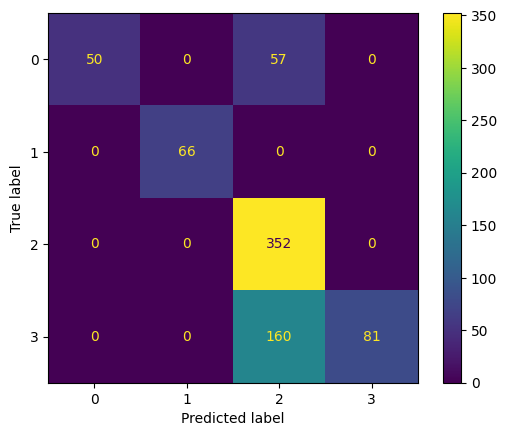

Training loss:  tensor(1.0078, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7085919634106501
Test Accuracy:  0.716710182767624
Macro & Micro Averaged Precision:  0.9046572934973638 0.716710182767624
Macro & Micro Averaged Recall:  0.7008473261721023 0.716710182767624
Macro & Micro Averaged F1 Score:  0.7261087003987136 0.7167101827676239
Starting epoch:  1


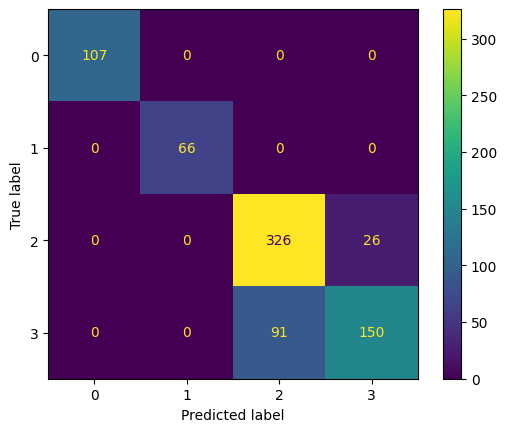

Training loss:  tensor(0.9147, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.8340411630186214
Test Accuracy:  0.8472584856396866
Macro & Micro Averaged Precision:  0.9085118269021146 0.8472584856396866
Macro & Micro Averaged Recall:  0.8871357506601283 0.8472584856396866
Macro & Micro Averaged F1 Score:  0.8918197041846366 0.8472584856396866
Starting epoch:  2


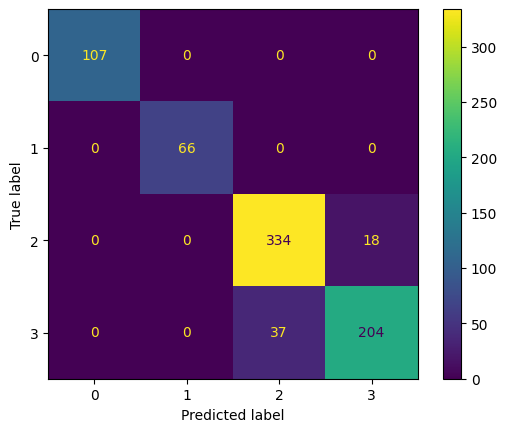

Training loss:  tensor(0.8662, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.9434825220516171
Test Accuracy:  0.9281984334203656
Macro & Micro Averaged Precision:  0.9547971151744736 0.9281984334203656
Macro & Micro Averaged Recall:  0.9488341663523199 0.9281984334203656
Macro & Micro Averaged F1 Score:  0.9512843951736973 0.9281984334203656
Starting epoch:  3


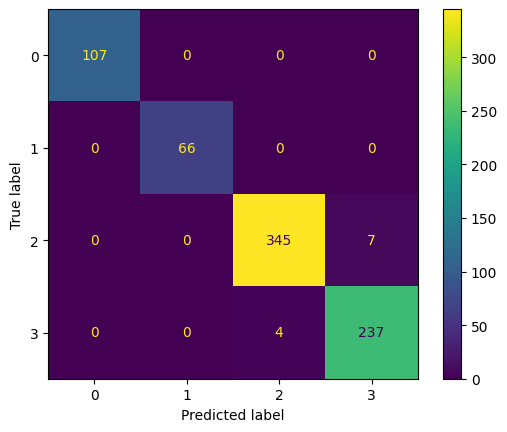

Training loss:  tensor(0.8343, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.9803985625612545
Test Accuracy:  0.9856396866840731
Macro & Micro Averaged Precision:  0.989962539339565 0.9856396866840731
Macro & Micro Averaged Recall:  0.9908790314975481 0.9856396866840731
Macro & Micro Averaged F1 Score:  0.9904069297174876 0.9856396866840731
Starting epoch:  4


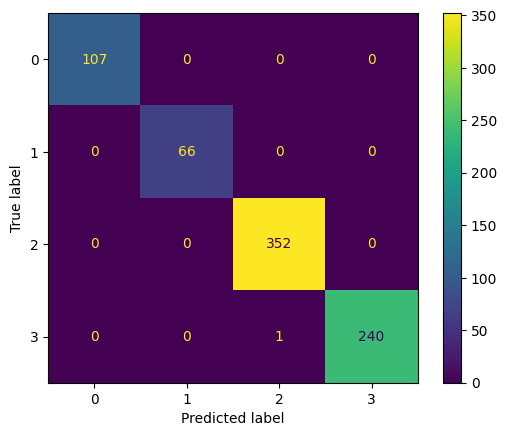

Training loss:  tensor(0.8128, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.9885658281607318
Test Accuracy:  0.9986945169712794
Macro & Micro Averaged Precision:  0.9992917847025495 0.9986945169712794
Macro & Micro Averaged Recall:  0.9989626556016598 0.9986945169712794
Macro & Micro Averaged F1 Score:  0.9991256395511715 0.9986945169712794
Starting epoch:  5


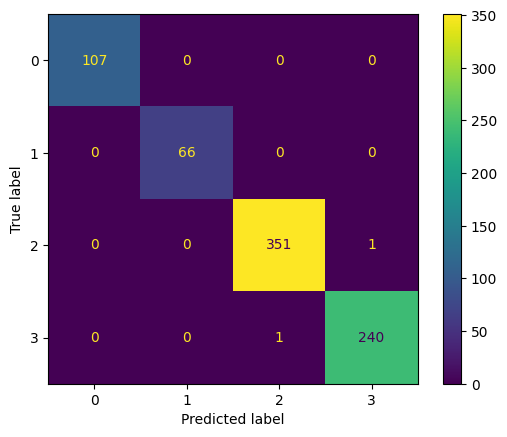

Training loss:  tensor(0.7979, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.9970597843841882
Test Accuracy:  0.9973890339425587
Macro & Micro Averaged Precision:  0.9982524283289325 0.9973890339425587
Macro & Micro Averaged Recall:  0.9982524283289325 0.9973890339425587
Macro & Micro Averaged F1 Score:  0.9982524283289325 0.9973890339425587
Starting epoch:  6


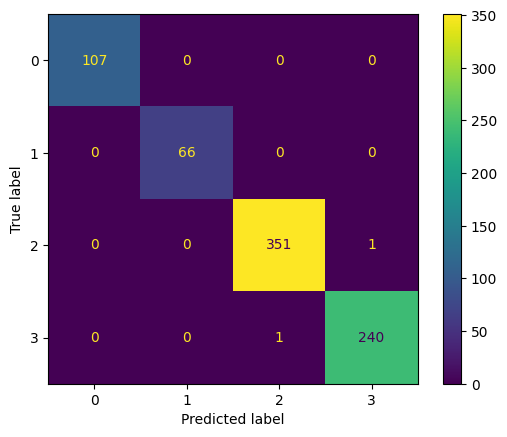

Training loss:  tensor(0.7869, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.9983665468801045
Test Accuracy:  0.9973890339425587
Macro & Micro Averaged Precision:  0.9982524283289325 0.9973890339425587
Macro & Micro Averaged Recall:  0.9982524283289325 0.9973890339425587
Macro & Micro Averaged F1 Score:  0.9982524283289325 0.9973890339425587
Starting epoch:  7


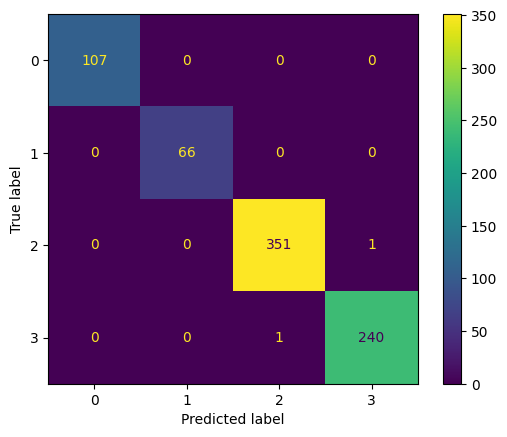

Training loss:  tensor(0.7777, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.9990199281280627
Test Accuracy:  0.9973890339425587
Macro & Micro Averaged Precision:  0.9982524283289325 0.9973890339425587
Macro & Micro Averaged Recall:  0.9982524283289325 0.9973890339425587
Macro & Micro Averaged F1 Score:  0.9982524283289325 0.9973890339425587
Starting epoch:  8


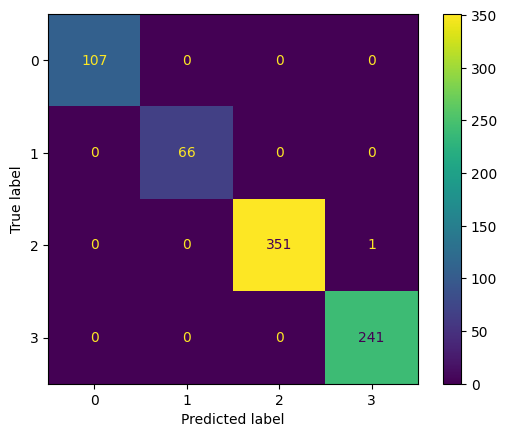

Training loss:  tensor(0.7696, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.9993466187520418
Test Accuracy:  0.9986945169712794
Macro & Micro Averaged Precision:  0.9989669421487604 0.9986945169712794
Macro & Micro Averaged Recall:  0.9992897727272727 0.9986945169712794
Macro & Micro Averaged F1 Score:  0.9991267828796433 0.9986945169712794
Starting epoch:  9


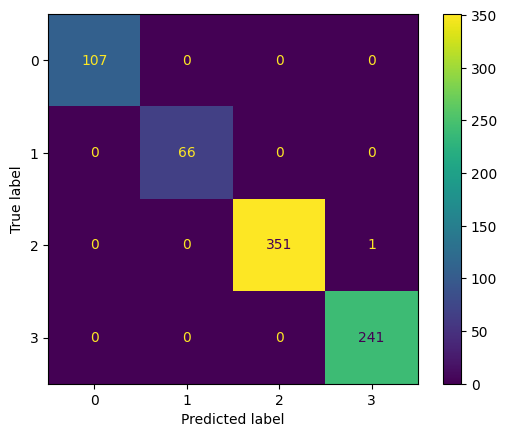

Training loss:  tensor(0.7648, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.999673309376021
Test Accuracy:  0.9986945169712794
Macro & Micro Averaged Precision:  0.9989669421487604 0.9986945169712794
Macro & Micro Averaged Recall:  0.9992897727272727 0.9986945169712794
Macro & Micro Averaged F1 Score:  0.9991267828796433 0.9986945169712794


In [173]:
import torch.nn.functional as f
# LSTM 1
input_dim = 9
hidden_dim = 4 
layer_dim = 1 
output_dim = 4 
dropout_prob = 0
fc_dim = 80*hidden_dim*2
rnn = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim, dropout_prob, fc_dim)
optimizer = torch.optim.Adam(rnn.parameters(),lr=1e-3,weight_decay=0)
rnn.double()

criterion = nn.CrossEntropyLoss()
train_loss = []
test_loss = []
# Train
with torch.autograd.set_detect_anomaly(True):
    for epoch in range(10):
        rnn.train()
        print('Starting epoch: ', epoch)
        running_loss = 0
        for i in range(0, train.shape[0], 64):
            optimizer.zero_grad()
            data = train[i:i+64]
            y = data[:,:,-1]
            y = y.mean(axis=1)
            y = np.round_(y)
            y = torch.tensor(y, dtype=torch.int64)
            y = f.one_hot(y,4)
            input = torch.tensor(data[:,:,:-1])
            output = rnn(input)
            loss = criterion(output.double(), y.double())
            loss.backward()     
            optimizer.step()
            
        running_loss = test_model(rnn, 'train loss')
        train_accuracy = test_model(rnn, 'train accuracy')
        test_accuracy, macro_averaged_precision, micro_averaged_precision, macro_averaged_recall, micro_averaged_recall, macro_averaged_f1, micro_averaged_f1 = test_model(rnn, 'test accuracy')
        train_loss.append(train_accuracy)
        test_loss.append(test_accuracy)
        print('Training loss: ', running_loss)
        print('Training Accuracy: ', train_accuracy)
        print('Test Accuracy: ', test_accuracy) 
        print('Macro & Micro Averaged Precision: ', macro_averaged_precision, micro_averaged_precision)
        print('Macro & Micro Averaged Recall: ', macro_averaged_recall, micro_averaged_recall)
        print('Macro & Micro Averaged F1 Score: ',macro_averaged_f1, micro_averaged_f1)
        

In [205]:
import torch.nn.functional as f
# LSTM 1
input_dim = 9
hidden_dim = 7 
layer_dim = 1 
output_dim = 4 
dropout_prob = 0
fc_dim = 80*hidden_dim*2
bi = True
rnn = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim, dropout_prob, fc_dim,bi)
optimizer = torch.optim.Adam(rnn.parameters(),lr=1e-3,weight_decay=0)
rnn.double()

criterion = nn.CrossEntropyLoss()
train_loss = []
test_loss = []
# Train
with torch.autograd.set_detect_anomaly(True):
    for epoch in range(10):
        rnn.train()
        print('Starting epoch: ', epoch)
        running_loss = 0
        for i in range(0, train.shape[0], 64):
            optimizer.zero_grad()
            data = train[i:i+64]
            y = data[:,:,-1]
            y = y.mean(axis=1)
            y = np.round_(y)
            y = torch.tensor(y, dtype=torch.int64)
            y = f.one_hot(y,4)
            input = torch.tensor(data[:,:,:-1])
            output = rnn(input)
            loss = criterion(output.double(), y.double())
            loss.backward()     
            optimizer.step()
            
        running_loss = test_model(rnn, 'train loss')
        train_accuracy = test_model(rnn, 'train accuracy')
        test_accuracy, macro_averaged_precision, micro_averaged_precision, macro_averaged_recall, micro_averaged_recall, macro_averaged_f1, micro_averaged_f1 = test_model(rnn, 'test accuracy')
        train_loss.append(train_accuracy)
        test_loss.append(test_accuracy)
        print('Training loss: ', running_loss)
        print('Training Accuracy: ', train_accuracy)
        print('Test Accuracy: ', test_accuracy) 
        print('Macro & Micro Averaged Precision: ', macro_averaged_precision, micro_averaged_precision)
        print('Macro & Micro Averaged Recall: ', macro_averaged_recall, micro_averaged_recall)
        print('Macro & Micro Averaged F1 Score: ',macro_averaged_f1, micro_averaged_f1)
        
        # sensitivity analysis
        up_acc, down_acc, gaus_acc = sensitivity_analysis(rnn)
        print('Up, Down, Gaus Accuracy: ', up_acc, down_acc, gaus_acc)
        

Starting epoch:  0
Training loss:  tensor(0.8555, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.9170205815093107
Test Accuracy:  0.8981723237597912
Macro & Micro Averaged Precision:  0.9381899709485917 0.8981723237597912
Macro & Micro Averaged Recall:  0.9256294794417201 0.8981723237597912
Macro & Micro Averaged F1 Score:  0.9298007576309463 0.8981723237597912
Up, Down, Gaus Accuracy:  0.9166938908853316 0.9196341065011434 0.9186540346292061
Starting epoch:  1
Training loss:  tensor(0.7775, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.98921920940869
Test Accuracy:  0.9882506527415144
Macro & Micro Averaged Precision:  0.991703461881723 0.9882506527415144
Macro & Micro Averaged Recall:  0.9926266031686156 0.9882506527415144
Macro & Micro Averaged F1 Score:  0.992151124314308 0.9882506527415144
Up, Down, Gaus Accuracy:  0.9875857562887945 0.9895459000326691 0.9879124469127736
Starting epoch:  2
Training loss:  tensor(0.7518, dtype=torch.float64,

In [204]:
import torch.nn.functional as f
# GRU 1
input_dim = 9
hidden_dim = 6 
layer_dim = 1 
output_dim = 4 
dropout_prob = 0
bi = False
fc_dim = 80*hidden_dim
rnn = GRUModel(input_dim, hidden_dim, layer_dim, output_dim, dropout_prob, fc_dim, bi)
optimizer = torch.optim.Adam(rnn.parameters(),lr=1e-3,weight_decay=0)
rnn.double()

criterion = nn.CrossEntropyLoss()
train_loss = []
test_loss = []
# Train
with torch.autograd.set_detect_anomaly(True):
    for epoch in range(10):
        rnn.train()
        print('Starting epoch: ', epoch)
        running_loss = 0
        for i in range(0, train.shape[0], 64):
            optimizer.zero_grad()
            data = train[i:i+64]
            y = data[:,:,-1]
            y = y.mean(axis=1)
            y = np.round_(y)
            y = torch.tensor(y, dtype=torch.int64)
            y = f.one_hot(y,4)
            input = torch.tensor(data[:,:,:-1])
            output = rnn(input)
            loss = criterion(output.double(), y.double())
            loss.backward()     
            optimizer.step()
            
        running_loss = test_model(rnn, 'train loss')
        train_accuracy = test_model(rnn, 'train accuracy')
        test_accuracy = test_model(rnn, 'test accuracy')
        train_loss.append(train_accuracy)
        test_loss.append(test_accuracy)
        print('Training loss: ', running_loss)
        print('Training Accuracy: ', train_accuracy)
        print('Test Accuracy: ', test_accuracy)
        
        # sensitivity analysis
        up_acc, down_acc, gaus_acc = sensitivity_analysis(rnn)
        print('Up, Down, Gaus Accuracy: ', up_acc, down_acc, gaus_acc)
        

Starting epoch:  0


/Users/matthewlee/Desktop/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss:  tensor(0.9748, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.6873570728520092
Test Accuracy:  (0.685378590078329, 0.6483979763912311, 0.685378590078329, 0.75, 0.685378590078329, 0.6862433862433862, 0.685378590078329)
Up, Down, Gaus Accuracy:  0.6873570728520092 0.6873570728520092 0.6873570728520092
Starting epoch:  1
Training loss:  tensor(0.8887, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.7121855602744201
Test Accuracy:  (0.7180156657963447, 0.9049295774647887, 0.7180156657963447, 0.7759336099585062, 0.7180156657963447, 0.7382968290290944, 0.7180156657963446)
Up, Down, Gaus Accuracy:  0.7115321790264619 0.711858869650441 0.711858869650441
Starting epoch:  2
Training loss:  tensor(0.8456, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.98203201568115
Test Accuracy:  (0.9869451697127938, 0.9922857482467609, 0.9869451697127938, 0.9902807902678235, 0.9869451697127938, 0.9912267723991005, 0.9869451697127938)
Up

In [203]:
import torch.nn.functional as f
# GRU 1
input_dim = 9
hidden_dim = 6 
layer_dim = 1 
output_dim = 4 
dropout_prob = 0
bi = True
fc_dim = 80*hidden_dim*2
rnn = GRUModel(input_dim, hidden_dim, layer_dim, output_dim, dropout_prob, fc_dim, bi)
optimizer = torch.optim.Adam(rnn.parameters(),lr=1e-3,weight_decay=0)
rnn.double()

criterion = nn.CrossEntropyLoss()
train_loss = []
test_loss = []
# Train
with torch.autograd.set_detect_anomaly(True):
    for epoch in range(10):
        rnn.train()
        print('Starting epoch: ', epoch)
        running_loss = 0
        for i in range(0, train.shape[0], 64):
            optimizer.zero_grad()
            data = train[i:i+64]
            y = data[:,:,-1]
            y = y.mean(axis=1)
            y = np.round_(y)
            y = torch.tensor(y, dtype=torch.int64)
            y = f.one_hot(y,4)
            input = torch.tensor(data[:,:,:-1])
            output = rnn(input)
            loss = criterion(output.double(), y.double())
            loss.backward()     
            optimizer.step()
            
        running_loss = test_model(rnn, 'train loss')
        train_accuracy = test_model(rnn, 'train accuracy')
        test_accuracy = test_model(rnn, 'test accuracy')
        train_loss.append(train_accuracy)
        test_loss.append(test_accuracy)
        print('Training loss: ', running_loss)
        print('Training Accuracy: ', train_accuracy)
        print('Test Accuracy: ', test_accuracy)
        
        # sensitivity analysis
        up_acc, down_acc, gaus_acc = sensitivity_analysis(rnn)
        print('Up, Down, Gaus Accuracy: ', up_acc, down_acc, gaus_acc)
        

Starting epoch:  0
Training loss:  tensor(0.9453, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.6148317543286508
Test Accuracy:  (0.6174934725848564, 0.8864341085271318, 0.6174934725848564, 0.6220091518982434, 0.6174934725848564, 0.595927859182124, 0.6174934725848564)
Up, Down, Gaus Accuracy:  0.615485135576609 0.6141783730806926 0.6148317543286508
Starting epoch:  1
Training loss:  tensor(0.8939, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.8353479255145377
Test Accuracy:  (0.8263707571801566, 0.9314432989690722, 0.8263707571801566, 0.8620331950207469, 0.8263707571801566, 0.8650025846162273, 0.8263707571801566)
Up, Down, Gaus Accuracy:  0.836001306762496 0.8350212348905587 0.836001306762496
Starting epoch:  2
Training loss:  tensor(0.8357, dtype=torch.float64, grad_fn=<DivBackward1>)
Training Accuracy:  0.9072198627899379
Test Accuracy:  (0.9177545691906005, 0.9575485946939848, 0.9177545691906005, 0.9362828885326292, 0.9177545691906005, 0.942

In [182]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

def test_model(model, mode):
    model.eval()
    if mode == 'test accuracy':
        out = model(torch.tensor(test[:,:,:-1]))
        out = torch.argmax(out,dim=1)
        y = test[:,:,-1]
        y = y.mean(axis=1)
        y = np.round_(y)
        y = torch.tensor(y, dtype=torch.int64)
        accuracy = metrics.accuracy_score(y, out)
       
        macro_averaged_precision = metrics.precision_score(y, out, average = 'macro')
        micro_averaged_precision = metrics.precision_score(y, out, average = 'micro')
       
        macro_averaged_recall = metrics.recall_score(y, out, average = 'macro')
        micro_averaged_recall = metrics.recall_score(y, out, average = 'micro')
        
        macro_averaged_f1 = metrics.f1_score(y, out, average = 'macro')
        micro_averaged_f1 = metrics.f1_score(y, out, average = 'micro')
        # Sitting, standing, walking, upstairs
        cm = confusion_matrix(y, out, labels=[0,1,2,3])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3])
        disp.plot()
        plt.show()
        return accuracy, macro_averaged_precision, micro_averaged_precision, macro_averaged_recall, micro_averaged_recall, macro_averaged_f1, micro_averaged_f1
    elif mode == 'train accuracy':
        out = model(torch.tensor(train[:,:,:-1]))
        out = torch.argmax(out,dim=1)
        y = train[:,:,-1]
        y = y.mean(axis=1)
        y = np.round_(y)
        y = torch.tensor(y, dtype=torch.int64)
        accuracy = metrics.accuracy_score(y, out)
        return accuracy
    elif mode == 'train loss':
        criterion = nn.CrossEntropyLoss()
        out = model(torch.tensor(train[:,:,:-1]))
        y = train[:,:,-1]
        y = y.mean(axis=1)
        y = np.round_(y)
        y = torch.tensor(y, dtype=torch.int64)
        y = f.one_hot(y,4)
        return criterion(out.double(), y.double())

Approch to compute precision of multi class classification problem:

There are two different ways to calculate this which might get confusing from time to time. We know that precision depends on true positives and false positives.

Macro averaged precision: calculate precision for all classes individually and then average them

Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision

In [200]:
def sensitivity_analysis(model):
    input = torch.tensor(train[:,:,:-1])
    y = train[:,:,-1]
    y = y.mean(axis=1)
    y = np.round_(y)
    y = torch.tensor(y, dtype=torch.int64)
    
    dc_gain_up = input + 0.5
    out = model(dc_gain_up)
    out = torch.argmax(out,dim=1)
    up_accuracy = metrics.accuracy_score(y, out)
    
    dc_gain_down = input - 0.5
    out = model(dc_gain_down)
    out = torch.argmax(out,dim=1)
    down_accuracy = metrics.accuracy_score(y, out)
    
    gaus_noise = input + (0.5**0.5)*torch.randn(3061, 80, 9)
    out = model(gaus_noise)
    out = torch.argmax(out,dim=1)
    gaus_accuracy = metrics.accuracy_score(y, out)
    
    return up_accuracy, down_accuracy, gaus_accuracy